In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [ ]:
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
health = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/국민건강영양조사데이터경진대회/nationalhealth_2010to2021.csv')

In [ ]:
health['age'] = health['age'].astype('int')
health

ID       ID_fam    year  region  town_t  sex  age  incm  \
0      b'A308780901'  b'A3087809'  2010.0     1.0     1.0  1.0   74   3.0   
1      b'A309099802'  b'A3090998'  2010.0     1.0     1.0  2.0   71   2.0   
2      b'A309460901'  b'A3094609'  2010.0     1.0     1.0  2.0   61   3.0   
3      b'A309460902'  b'A3094609'  2010.0     1.0     1.0  1.0   32   2.0   
4      b'A310439801'  b'A3104398'  2010.0     1.0     1.0  2.0   63   4.0   
...              ...          ...     ...     ...     ...  ...  ...   ...   
35624  b'R904322404'  b'R9043224'  2021.0     8.0     2.0  1.0   53   3.0   
35625  b'R904332601'  b'R9043326'  2021.0     8.0     2.0  1.0   50   2.0   
35626  b'R904346201'  b'R9043462'  2021.0     8.0     2.0  2.0   54   4.0   
35627  b'R904353001'  b'R9043530'  2021.0     8.0     2.0  1.0   45   3.0   
35628  b'R904353002'  b'R9043530'  2021.0     8.0     2.0  2.0   43   3.0   

       ho_incm  incm5  ...  고콜레스테롤혈증  고중성지방혈증  B형간염   빈혈  뇌졸중  협심증또는심근경색증  \
0          2.0    4.0  ...       0.0      1.0   0.0  0.0 -1.0        -1.0   
1          1.0    2.0  ...       0.0      0.0   0.0  0.0 -1.0        -1.0   
2          2.0    4.0  ...       0.0      0.0   0.0  0.0 -1.0        -1.0   
3          2.0    2.0  ...       0.0      1.0   0.0  0.0 -1.0        -1.0   
4          4.0    5.0  ...       0.0      0.0   0.0  0.0 -1.0        -1.0   
...        ...    ...  ...       ...      ...   ...  ...  ...         ...   
35624      3.0    3.0  ...       0.0      0.0   0.0  0.0  0.0         0.0   
35625      2.0    2.0  ...       0.0      1.0   0.0  0.0  0.0         0.0   
35626      4.0    4.0  ...       0.0      0.0   0.0  0.0  0.0         0.0   
35627      3.0    3.0  ...       0.0      1.0   0.0  0.0  0.0         0.0   
35628      3.0    3.0  ...       0.0      0.0   0.0  0.0  0.0         0.0   

        천식  아토피피부염  골관절염  우울증  
0      0.0    -1.0  -1.0 -1.0  
1     -1.0    -1.0  -1.0 -1.0  
2      1.0    -1.0   1.0 -1.0  
3     -1.0    -1.0  -1.0  1.0  
4     -1.0    -1.0   1.0 -1.0  
...    ...     ...   ...  ...  
35624  0.0     0.0   0.0  0.0  
35625  0.0     0.0   0.0  0.0  
35626  0.0     0.0   0.0  0.0  
35627  0.0     0.0   0.0  0.0  
35628  0.0     0.0   0.0  0.0  

[35629 rows x 122 columns]

In [ ]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35629 entries, 0 to 35628
Columns: 122 entries, ID to 우울증
dtypes: float64(119), int64(1), object(2)
memory usage: 33.2+ MB


In [ ]:
print(health.columns.tolist())

['ID', 'ID_fam', 'year', 'region', 'town_t', 'sex', 'age', 'incm', 'ho_incm', 'incm5', 'ho_incm5', 'edu', 'occp', 'cfam', 'genertn', 'allownc', 'marri_1', 'marri_2', 'fam_rela', 'tins', 'D_1_1', 'educ', 'EC1_1', 'EC_wht_23', 'EC_wht_5', 'EC_pedu_1', 'EC_pedu_2', 'BD1_11', 'BD2_1', 'BD2_31', 'dr_month', 'BP6_10', 'BP7', 'mh_stress', 'BS3_1', 'BE3_31', 'BE5_1', 'LW_mt', 'LW_mt_a1', 'LW_br', 'HE_fst', 'HE_HPdr', 'HE_DMdr', 'HE_mens', 'HE_prg', 'HE_HPfh1', 'HE_HPfh2', 'HE_HPfh3', 'HE_HLfh1', 'HE_HLfh2', 'HE_HLfh3', 'HE_IHDfh1', 'HE_IHDfh2', 'HE_IHDfh3', 'HE_STRfh1', 'HE_STRfh2', 'HE_STRfh3', 'HE_DMfh1', 'HE_DMfh2', 'HE_DMfh3', 'HE_rPLS', 'HE_sbp', 'HE_dbp', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2', 'HE_TG', 'HE_ast', 'HE_alt', 'HE_hepaB', 'HE_HB', 'HE_HCT', 'HE_BUN', 'HE_crea', 'HE_WBC', 'HE_RBC', 'HE_Bplt', 'HE_Uph', 'HE_Unitr', 'HE_Usg', 'HE_Upro', 'HE_Uglu', 'HE_Uket', 'HE_Ubil', 'HE_Ubld', 'HE_Uro', 'HE_Ucrea', 'N_INTK', 'N_EN', 'N_WATER', 'N_P

In [ ]:
health_info = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/국민건강영양조사데이터경진대회/modified_meta_data20.xlsx',engine='openpyxl')

In [ ]:
pd.set_option('display.max_rows', None) ## 모든 열을 출력한다.
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.


health_info



Unnamed: 0    variable    variable description  \
0             0          ID                  개인 아이디   
1             1      ID_fam                  가구 아이디   
2             2        year                    조사연도   
3             3      region                  17개 시도   
4             4      town_t                 동/읍면 구분   
5             5         sex                      성별   
6             6         age                     만나이   
7             7        incm             소득 4분위수(개인)   
8             8     ho_incm             소득 4분위수(가구)   
9             9       incm5             소득 5분위수(개인)   
10           10    ho_incm5             소득 5분위수(가구)   
11           11         edu             교육수준 재분류 코드   
12           12        occp  직업재분류 및 실업/비경제활동 상태 코드   
13           13        cfam                    가구원수   
14           14     genertn               가구 세대구성코드   
15           15     allownc               기초생활수급 여부   
16           16     marri_1                    결혼여부   
17           17     marri_2                    결혼상태   
18           18    fam_rela                가구주와의 관계   
19           19        tins                  건강보험종류   
20           20       D_1_1                주관적 건강인지   
21           21        educ                교육수준: 학력   
22           22       EC1_1                 경제활동 상태   
23           23   EC_wht_23              주당 평균 근로시간   
24           24    EC_wht_5                  변형근로시간   
25           25   EC_pedu_1    (성인) 유년기환경: 아버지 교육수준   
26           26   EC_pedu_2    (성인) 유년기환경: 어머니 교육수준   
27           27      BD1_11       (만12세이상) 1년간 음주빈도   
28           28       BD2_1   (만12세이상) 한 번에 마시는 음주량   
29           29      BD2_31          (만12세이상) 폭음 빈도   
30           30    dr_month                   월간음주율   
31           31      BP6_10            1년간 자살 생각 여부   
32           32         BP7             1년간 정신문제 상담   
33           33   mh_stress                스트레스 인지율   
34           34       BS3_1  (성인) 현재 일반담배(궐련) 흡연 여부   
35           35      BE3_31              1주일간 걷기 일수   
36           36       BE5_1            1주일간 근력운동 일수   
37           37       LW_mt           (만15세이상) 출산경험   
38           38    LW_mt_a1         (만15세이상) 첫 출산연령   
39           39       LW_br              모유수유 경험 여부   
40           40      HE_fst                    공복시간   
41           41     HE_HPdr        검진당일 고혈압 약 복용 여부   
42           42     HE_DMdr        검진당일 당뇨병 약 복용 여부   
43           43     HE_mens                    생리여부   
44           44      HE_prg                    임신여부   
45           45    HE_HPfh1          고혈압 의사진단 여부(부)   
46           46    HE_HPfh2          고혈압 의사진단 여부(모)   
47           47    HE_HPfh3       고혈압 의사진단 여부(형제자매)   
48           48    HE_HLfh1         고지혈증 의사진단 여부(부)   
49           49    HE_HLfh2         고지혈증 의사진단 여부(모)   
50           50    HE_HLfh3      고지혈증 의사진단 여부(형제자매)   
51           51   HE_IHDfh1      허혈성심장질환 의사진단 여부(부)   
52           52   HE_IHDfh2      허혈성심장질환 의사진단 여부(모)   
53           53   HE_IHDfh3   허혈성심장질환 의사진단 여부(형제자매)   
54           54   HE_STRfh1          뇌졸중 의사진단 여부(부)   
55           55   HE_STRfh2          뇌졸중 의사진단 여부(모)   
56           56   HE_STRfh3       뇌졸중 의사진단 여부(형제자매)   
57           57    HE_DMfh1          당뇨병 의사진단 여부(부)   
58           58    HE_DMfh2          당뇨병 의사진단 여부(모)   
59           59    HE_DMfh3       당뇨병 의사진단 여부(형제자매)   
60           60     HE_rPLS               맥박 규칙성 여부   
61           61      HE_sbp      최종 수축기 혈압(2,3차 평균)   
62           62      HE_dbp      최종 이완기 혈압(2,3차 평균)   
63           63       HE_ht                      신장   
64           64       HE_wt                      체중   
65           65       HE_wc                    허리둘레   
66           66      HE_BMI                   체질량지수   
67           67      HE_glu                    공복혈당   
68           68    HE_HbA1c                   당화혈색소   
69           69     HE_chol                  총콜레스테롤   
70           70  HE_HDL_st2          HDL-콜레스테롤(보정값)   
71           71       HE_TG                  

In [ ]:
pd.options.display.max_rows = 60
pd.options.display.max_columns = 20


In [ ]:
health_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            109 non-null    int64  
 1   variable              109 non-null    object 
 2   variable description  109 non-null    object 
 3   option description    65 non-null     object 
 4   etc                   109 non-null    object 
 5   data type             109 non-null    object 
 6   not applicable        27 non-null     float64
 7   unknown               40 non-null     object 
 8   variable bins         44 non-null     object 
 9   selected              109 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 8.6+ KB


In [ ]:
health_info['etc']

0                        []
1                        []
2                        []
3                        []
4                        []
               ...         
104      ['1일 레티놀 섭취량(μg)']
105      ['1일 티아민 섭취량(mg)']
106    ['1일 리보플라빈 섭취량(mg)']
107     ['1일 나이아신 섭취량(mg)']
108     ['1일 비타민C 섭취량(mg)']
Name: etc, Length: 109, dtype: object

# 여기까지데이터보기 끝

#csv 전처리

##독거노인 일반사람 not독거노인 csv만들기

전체독거노인

In [ ]:
# health_info.query("variable == 'cfam'")

In [ ]:
# health_info.query("variable == 'fam_rela'")

In [ ]:
disease = ['비만',
 '고혈압',
 '당뇨병',
 '고콜레스테롤혈증',
 '고중성지방혈증',
 'B형간염',
 '빈혈',
 '뇌졸중',
 '협심증또는심근경색증',
 '천식',
 '아토피피부염',
 '골관절염',
 '우울증']

In [ ]:
def dsiease_count(x):
  cnt=0
  for i in disease:
    if x[i] == 1:
      cnt+=1

  return cnt

health['총질병수'] = health.apply(dsiease_count, axis=1) ##총질병수전처리

alone_old_grand = health.query("cfam==1 and fam_rela==1 and age>=65") #65세이상 독거노인
not_alone_old_grand = health.query("cfam!=1 or fam_rela!=1 and age>=65")# 65세이상 독거노인이아닌사람 
young_person = health.query("age<65")

In [ ]:
not_alone_old_grand

ID       ID_fam    year  region  town_t  sex  age  incm  \
0      b'A308780901'  b'A3087809'  2010.0     1.0     1.0  1.0   74   3.0   
1      b'A309099802'  b'A3090998'  2010.0     1.0     1.0  2.0   71   2.0   
2      b'A309460901'  b'A3094609'  2010.0     1.0     1.0  2.0   61   3.0   
3      b'A309460902'  b'A3094609'  2010.0     1.0     1.0  1.0   32   2.0   
5      b'A310980901'  b'A3109809'  2010.0     1.0     1.0  1.0   80   1.0   
...              ...          ...     ...     ...     ...  ...  ...   ...   
35624  b'R904322404'  b'R9043224'  2021.0     8.0     2.0  1.0   53   3.0   
35625  b'R904332601'  b'R9043326'  2021.0     8.0     2.0  1.0   50   2.0   
35626  b'R904346201'  b'R9043462'  2021.0     8.0     2.0  2.0   54   4.0   
35627  b'R904353001'  b'R9043530'  2021.0     8.0     2.0  1.0   45   3.0   
35628  b'R904353002'  b'R9043530'  2021.0     8.0     2.0  2.0   43   3.0   

       ho_incm  incm5  ...  고중성지방혈증  B형간염   빈혈  뇌졸중  협심증또는심근경색증   천식  아토피피부염  \
0          2.0    4.0  ...      1.0   0.0  0.0 -1.0        -1.0  0.0    -1.0   
1          1.0    2.0  ...      0.0   0.0  0.0 -1.0        -1.0 -1.0    -1.0   
2          2.0    4.0  ...      0.0   0.0  0.0 -1.0        -1.0  1.0    -1.0   
3          2.0    2.0  ...      1.0   0.0  0.0 -1.0        -1.0 -1.0    -1.0   
5          1.0    2.0  ...      0.0   0.0  0.0 -1.0        -1.0 -1.0    -1.0   
...        ...    ...  ...      ...   ...  ...  ...         ...  ...     ...   
35624      3.0    3.0  ...      0.0   0.0  0.0  0.0         0.0  0.0     0.0   
35625      2.0    2.0  ...      1.0   0.0  0.0  0.0         0.0  0.0     0.0   
35626      4.0    4.0  ...      0.0   0.0  0.0  0.0         0.0  0.0     0.0   
35627      3.0    3.0  ...      1.0   0.0  0.0  0.0         0.0  0.0     0.0   
35628      3.0    3.0  ...      0.0   0.0  0.0  0.0         0.0  0.0     0.0   

       골관절염  우울증  총질병수  
0      -1.0 -1.0     3  
1      -1.0 -1.0     2  
2       1.0 -1.0     5  
3      -1.0  1.0     4  
5       1.0 -1.0     2  
...     ...  ...   ...  
35624   0.0  0.0     2  
35625   0.0  0.0     1  
35626   0.0  0.0     0  
35627   0.0  0.0     3  
35628   0.0  0.0     0  

[31340 rows x 123 columns]

In [ ]:
# alone_old_grand.to_csv('전체독거노인.csv')

In [ ]:
seoul_alone_old_grand = alone_old_grand.query("region==1")
busan_alone_old_grand = alone_old_grand.query("region==2")
daegu_alone_old_grand = alone_old_grand.query("region==3")
incheon_alone_old_grand = alone_old_grand.query("region==4")
gwangju_alone_old_grand = alone_old_grand.query("region==5")
daejeon_alone_old_grand = alone_old_grand.query("region==6")
ulsan_alone_old_grand = alone_old_grand.query("region==7")
sejong_alone_old_grand = alone_old_grand.query("region==8")
gyeonggi_alone_old_grand = alone_old_grand.query("region==9")
gangwon_alone_old_grand = alone_old_grand.query("region==10")
chungbuk_alone_old_grand = alone_old_grand.query("region==11")
chungnam_alone_old_grand = alone_old_grand.query("region==12")
jeonbuk_alone_old_grand = alone_old_grand.query("region==13")
jeonnam_alone_old_grand = alone_old_grand.query("region==14")
gyeongbuk_alone_old_grand = alone_old_grand.query("region==15")
gyeongnam_alone_old_grand = alone_old_grand.query("region==16")
jeju_alone_old_grand = alone_old_grand.query("region==17")

#지역별 독거노인들

In [ ]:
# seoul_alone_old_grand.

# result1 = pd.concat([seoul_alone_old_grand,busan_alone_old_grand,daegu_alone_old_grand,incheon_alone_old_grand,gwangju_alone_old_grand,daejeon_alone_old_grand,
#                      ulsan_alone_old_grand,sejong_alone_old_grand,gyeonggi_alone_old_grand,gangwon_alone_old_grand,chungbuk_alone_old_grand,
#                      chungnam_alone_old_grand,jeonbuk_alone_old_grand,jeonnam_alone_old_grand,gyeongbuk_alone_old_grand,gyeongnam_alone_old_grand
#                      ,jeju_alone_old_grand],axis=0)

In [ ]:
# result1.to_csv('지역별 독거노인들.csv')

In [ ]:
seoul_not_alone_old_grand = not_alone_old_grand.query("region==1")
busan_not_alone_old_grand = not_alone_old_grand.query("region==2")
daegu_not_alone_old_grand = not_alone_old_grand.query("region==3")
incheon_not_alone_old_grand = not_alone_old_grand.query("region==4")
gwangju_not_alone_old_grand = not_alone_old_grand.query("region==5")
daejeon_not_alone_old_grand = not_alone_old_grand.query("region==6")
ulsan_not_alone_old_grand = not_alone_old_grand.query("region==7")
sejong_not_alone_old_grand = not_alone_old_grand.query("region==8")
gyeonggi_not_alone_old_grand = not_alone_old_grand.query("region==9")
gangwon_not_alone_old_grand = not_alone_old_grand.query("region==10")
chungbuk_not_alone_old_grand = not_alone_old_grand.query("region==11")
chungnam_not_alone_old_grand = not_alone_old_grand.query("region==12")
jeonbuk_not_alone_old_grand = not_alone_old_grand.query("region==13")
jeonnam_not_alone_old_grand = not_alone_old_grand.query("region==14")
gyeongbuk_not_alone_old_grand = not_alone_old_grand.query("region==15")
gyeongnam_not_alone_old_grand = not_alone_old_grand.query("region==16")
jeju_not_alone_old_grand = not_alone_old_grand.query("region==17")

#지역별 독거아닌 노인들

In [ ]:
# result2 = pd.concat([seoul_not_alone_old_grand,busan_not_alone_old_grand,daegu_not_alone_old_grand,incheon_not_alone_old_grand,gwangju_not_alone_old_grand,
#                      daejeon_not_alone_old_grand,
#                      ulsan_not_alone_old_grand,sejong_not_alone_old_grand,gyeonggi_not_alone_old_grand,gangwon_not_alone_old_grand,chungbuk_not_alone_old_grand,
#                      chungnam_not_alone_old_grand,jeonbuk_not_alone_old_grand,jeonnam_not_alone_old_grand,gyeongbuk_not_alone_old_grand,gyeongnam_not_alone_old_grand
#                      ,jeju_not_alone_old_grand],axis=0)

In [ ]:
# result2.to_csv('지역별 독거노인이 아닌사람들.csv')

## 지역 전처리

In [ ]:
health_seoul = health.query("region == 1")
health_busan = health.query("region == 2")
health_daegu = health.query("region == 3")
health_incheon = health.query("region == 4")
health_gwangju = health.query("region == 5")
health_daejeon = health.query("region == 6")
health_ulsan = health.query("region == 7")
health_sejong = health.query("region == 8")
health_gyeonggi = health.query("region == 9")
health_gangwon = health.query("region == 10")
health_chungbuk = health.query("region == 11")
health_chungnam = health.query("region == 12")
health_jeonbuk = health.query("region == 13")
health_jeonnam = health.query("region == 14")
health_gyeongbuk = health.query("region == 15")
health_gyeongnam = health.query("region == 16")
health_jeju = health.query("region == 17")

In [ ]:
health_seoul

ID       ID_fam    year  region  town_t  sex  age  incm  \
0      b'A308780901'  b'A3087809'  2010.0     1.0     1.0  1.0   74   3.0   
1      b'A309099802'  b'A3090998'  2010.0     1.0     1.0  2.0   71   2.0   
2      b'A309460901'  b'A3094609'  2010.0     1.0     1.0  2.0   61   3.0   
3      b'A309460902'  b'A3094609'  2010.0     1.0     1.0  1.0   32   2.0   
4      b'A310439801'  b'A3104398'  2010.0     1.0     1.0  2.0   63   4.0   
...              ...          ...     ...     ...     ...  ...  ...   ...   
32930  b'A936397202'  b'A9363972'  2021.0     1.0     1.0  2.0   67   4.0   
32931  b'A936398901'  b'A9363989'  2021.0     1.0     1.0  1.0   62   2.0   
32932  b'A936400601'  b'A9364006'  2021.0     1.0     1.0  1.0   71   2.0   
32933  b'A936400602'  b'A9364006'  2021.0     1.0     1.0  2.0   70   3.0   
32934  b'A936405702'  b'A9364057'  2021.0     1.0     1.0  2.0   49   3.0   

       ho_incm  incm5  ...  고중성지방혈증  B형간염   빈혈  뇌졸중  협심증또는심근경색증   천식  아토피피부염  \
0          2.0    4.0  ...      1.0   0.0  0.0 -1.0        -1.0  0.0    -1.0   
1          1.0    2.0  ...      0.0   0.0  0.0 -1.0        -1.0 -1.0    -1.0   
2          2.0    4.0  ...      0.0   0.0  0.0 -1.0        -1.0  1.0    -1.0   
3          2.0    2.0  ...      1.0   0.0  0.0 -1.0        -1.0 -1.0    -1.0   
4          4.0    5.0  ...      0.0   0.0  0.0 -1.0        -1.0 -1.0    -1.0   
...        ...    ...  ...      ...   ...  ...  ...         ...  ...     ...   
32930      4.0    5.0  ...      0.0   0.0  0.0  0.0         0.0  0.0     0.0   
32931      2.0    2.0  ...      0.0   0.0  0.0  0.0         0.0  0.0     0.0   
32932      2.0    2.0  ...      1.0   0.0  0.0  0.0         0.0  0.0     0.0   
32933      2.0    3.0  ...      0.0   0.0  0.0  0.0         0.0  1.0     0.0   
32934      4.0    4.0  ...      0.0   0.0  1.0  0.0         0.0  0.0     0.0   

       골관절염  우울증  총질병수  
0      -1.0 -1.0     3  
1      -1.0 -1.0     2  
2       1.0 -1.0     5  
3      -1.0  1.0     4  
4       1.0 -1.0     3  
...     ...  ...   ...  
32930   0.0  0.0     0  
32931   0.0  0.0     0  
32932   0.0  1.0     4  
32933   1.0  0.0     2  
32934   0.0  1.0     4  

[6714 rows x 123 columns]

## csv와 관련된 엑셀파일 전처리

In [ ]:
# 개인아이디 가구아이디 조사연도 17개시도 동/읍면구분 성별 나이 소득분위 교육수준 

# incm과 관련된문항 소득분위

# HE와 관련된문항  #건강검진부분
#N과관련된 문항 #1일 영양소섭취와 관련된문항
#EC와 경제수준과 관련된문항
#BD부분 음주와 흡연
#BP부분 정신적 우울감관련
#BE부분 운동여부관련
#LW는 출산여부관련
# BS3_1 #흡연관련
# mh_stress #스트레스인지율

In [ ]:
health.columns.tolist()

['ID',
 'ID_fam',
 'year',
 'region',
 'town_t',
 'sex',
 'age',
 'incm',
 'ho_incm',
 'incm5',
 'ho_incm5',
 'edu',
 'occp',
 'cfam',
 'genertn',
 'allownc',
 'marri_1',
 'marri_2',
 'fam_rela',
 'tins',
 'D_1_1',
 'educ',
 'EC1_1',
 'EC_wht_23',
 'EC_wht_5',
 'EC_pedu_1',
 'EC_pedu_2',
 'BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'BP6_10',
 'BP7',
 'mh_stress',
 'BS3_1',
 'BE3_31',
 'BE5_1',
 'LW_mt',
 'LW_mt_a1',
 'LW_br',
 'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
 'HE_Unitr',
 'HE_Usg',
 'HE_Upro',
 'HE_Uglu',
 '

In [ ]:
nutritionF = ['N_INTK','N_EN','N_WATER','N_PROT','N_FAT','N_CHO','N_CA','N_PHOS','N_FE','N_NA','N_K','N_CAROT','N_RETIN','N_B1','N_B2','N_NIAC','N_VITC']
nutritionF_name = [
  '식품섭취량',
 '에너지',
 '수분',
 '단백질',
 '지방',
 '탄수화물',
 '칼슘',
 '인',
 '철',
 '나트륨',
 '칼륨',
 '베타카로틴',
 '레티놀',
 '티아민',
 '리보플라빈',
 '나이아신',
 '비타민C']

disease = ['비만','고혈압','당뇨병','고콜레스테롤혈증','고중성지방혈증','B형간염','빈혈','뇌졸중','협심증또는심근경색증','천식','아토피피부염','골관절염','우울증']

# BE부분 운동관련
exercise=[
    'BE3_31',
    'BE5_1'   
] 
#건강검진
health_check = [
'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
 'HE_Unitr',
 'HE_Usg',
 'HE_Upro',
 'HE_Uglu',
 'HE_Uket',
 'HE_Ubil',
 'HE_Ubld',
 'HE_Uro',
 'HE_Ucrea'
]
 
low_nurition = ['N_PROT','N_FAT','N_FE','N_RETIN','N_B1','N_B2','N_NIAC','N_VITC']
low_nurition_name = ['단백질','지방','철','레티놀', '티아민','리보플라빈','나이아신','비타민C']
low_low_nurition = ['N_FE','N_B1','N_B2']
low_low_nurition_name = ['철','티아민','리보플라빈']


# 독거노인분석시작

##독거노인들의 영양소분석

In [ ]:
region_alone_old_grand = [seoul_alone_old_grand,busan_alone_old_grand,daegu_alone_old_grand,incheon_alone_old_grand,gwangju_alone_old_grand,daejeon_alone_old_grand,ulsan_alone_old_grand,sejong_alone_old_grand,
                          gyeonggi_alone_old_grand,gangwon_alone_old_grand,chungbuk_alone_old_grand,chungnam_alone_old_grand,jeonbuk_alone_old_grand,jeonnam_alone_old_grand,gyeongbuk_alone_old_grand,
                          gyeongnam_alone_old_grand,jeju_alone_old_grand]

region_not_alone_old_grand = [seoul_not_alone_old_grand,busan_not_alone_old_grand,daegu_not_alone_old_grand,incheon_not_alone_old_grand,gwangju_not_alone_old_grand,daejeon_not_alone_old_grand,ulsan_not_alone_old_grand,
                              sejong_not_alone_old_grand,
                          gyeonggi_not_alone_old_grand,gangwon_not_alone_old_grand,chungbuk_not_alone_old_grand,chungnam_not_alone_old_grand,jeonbuk_not_alone_old_grand
                          ,jeonnam_not_alone_old_grand,gyeongbuk_not_alone_old_grand,
                          gyeongnam_not_alone_old_grand,jeju_not_alone_old_grand]

region_alone_old_grand_name = ['서울','부산','대구','인천','광주','대전','울산','세종','경기','강원','충북','충남','전북','전남','경북','경남','제주']

In [ ]:
def old_grand_relation_disease_nutrition(idx):

  health_alone_old = region_alone_old_grand[idx]
  health_not_alone_old = region_not_alone_old_grand[idx]

  grid = gridspec.GridSpec(1,2)#그래프를 그릴 도화지 개수
  plt.figure(figsize=(20,5))
  plt.subplots_adjust(wspace= 0.4, hspace=0.3) #그래프 간의 거리 조절

  ax0 = plt.subplot(grid[0])
  ax1 = plt.subplot(grid[1])

  ax0.plot(health_alone_old[nutritionF].mean())
  # print("~~~~~~~~~~~~~")
  ax0.set_ylim([0, 4000]) 
  ax0.set_title(f"{region_alone_old_grand_name[idx]} 독거노인들의 영양소분석")
  ax0.axhline(250,0,len(nutritionF), color='purple', linestyle = '--')
  ax0.axhline(500,0,len(nutritionF), color='orange', linestyle = '--')
  ax0.axhline(1000,0,len(nutritionF), color='red', linestyle = '--')
  ax0.axhline(2000,0,len(nutritionF), color='blue', linestyle = '--')
  ax0.axhline(2500,0,len(nutritionF), color='yellow', linestyle = '--')
  ax0.axhline(3000,0,len(nutritionF), color='green', linestyle = '--')
  ax0.axhline(3500,0,len(nutritionF), color='black', linestyle = '--')
  _=ax0.set_xticklabels(nutritionF_name, rotation=90)

  ax0_ins = ax0.inset_axes([0.1, 0.6, 0.4, 0.3])
  ax0_ins.plot(health_alone_old[low_nurition].mean())
  _=ax0_ins.set_xticklabels(low_nurition_name, rotation=90)
  ax0_ins.set_ylim([0, 150])
  ax0_ins.axhline(25,0,len(low_nurition), color='green', linestyle = '--')
  ax0_ins.axhline(50,0,len(low_nurition), color='red', linestyle = '--')
  ax0_ins.axhline(75,0,len(low_nurition), color='orange', linestyle = '--')
  ax0_ins.axhline(100,0,len(low_nurition), color='blue', linestyle = '--')
  ax0_ins.set_title(f" 영양소 부분확대")


  ax1.plot(health_not_alone_old[nutritionF].mean())
  ax1.set_ylim([0, 4000]) 
  ax1.set_title(f"{region_alone_old_grand_name[idx]} 의 독거노인이 아닌사람들의 영양소분석")
  ax1.axhline(250,0,len(nutritionF), color='purple', linestyle = '--')
  ax1.axhline(500,0,len(nutritionF), color='orange', linestyle = '--')
  ax1.axhline(1000,0,len(nutritionF), color='red', linestyle = '--')
  ax1.axhline(2000,0,len(nutritionF), color='blue', linestyle = '--')
  ax1.axhline(2500,0,len(nutritionF), color='yellow', linestyle = '--')
  ax1.axhline(3000,0,len(nutritionF), color='green', linestyle = '--')
  ax1.axhline(3500,0,len(nutritionF), color='black', linestyle = '--')
  _=ax1.set_xticklabels(nutritionF_name, rotation=90)

  ax1_ins = ax1.inset_axes([0.1, 0.6, 0.4, 0.3])
  ax1_ins.plot(health_not_alone_old[low_nurition].mean())
  _=ax1_ins.set_xticklabels(low_nurition_name, rotation=90)
  ax1_ins.set_ylim([0, 150])
  ax1_ins.axhline(25,0,len(low_nurition), color='green', linestyle = '--')
  ax1_ins.axhline(50,0,len(low_nurition), color='red', linestyle = '--')
  ax1_ins.axhline(75,0,len(low_nurition), color='orange', linestyle = '--')
  ax1_ins.axhline(100,0,len(low_nurition), color='blue', linestyle = '--')
  ax1_ins.set_title(f"영양소 부분확대")


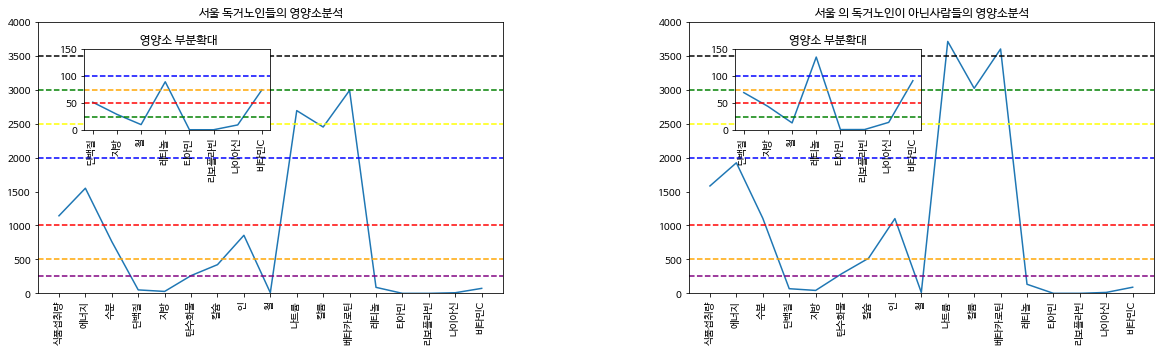

In [ ]:
# for i in range(17):
#   old_grand_relation_disease_nutrition(i)

old_grand_relation_disease_nutrition(0)

  #독거노인들이 전체적으로 영양소가 떨어짐   -->그 이유를 찾아보자
  # 왜떨어지냐 -> 돈이없어서? 스트레스 받아서? 술만마셔서?

## ++더비교

In [ ]:
def old_grand_relation_disease_nutrition_merge(idx):

  health_alone_old = region_alone_old_grand[idx]
  health_not_alone_old = region_not_alone_old_grand[idx]
  young_person_region = young_person.query("region == @idx+1")
  # print(young_person_region['region'])

  grid = gridspec.GridSpec(1,1)#그래프를 그릴 도화지 개수
  plt.figure(figsize=(15,10))
  plt.subplots_adjust(wspace= 0.4, hspace=0.3) #그래프 간의 거리 조절

  ax0 = plt.subplot(grid[0])

  ax0.plot(health_alone_old[nutritionF].mean(), label='독거노인')
  ax0.plot(health_not_alone_old[nutritionF].mean(), label='독거노인이 아닌 노인')
  ax0.plot(young_person_region[nutritionF].mean(), label='일반사람들')
  ax0.plot(alone_old_grand[nutritionF].mean(), label='전체 독거노인들의평균')
  ax0.legend()
  # print("~~~~~~~~~~~~~")
  ax0.set_ylim([0, 4500]) 
  ax0.set_title(f"{region_alone_old_grand_name[idx]} 독거노인들의 영양소분석")
  ax0.axhline(250,0,len(nutritionF), color='purple', linestyle = '--')
  ax0.axhline(500,0,len(nutritionF), color='orange', linestyle = '--')
  ax0.axhline(1000,0,len(nutritionF), color='red', linestyle = '--')
  ax0.axhline(2000,0,len(nutritionF), color='blue', linestyle = '--')
  ax0.axhline(2500,0,len(nutritionF), color='yellow', linestyle = '--')
  ax0.axhline(3000,0,len(nutritionF), color='green', linestyle = '--')
  ax0.axhline(3500,0,len(nutritionF), color='black', linestyle = '--')
  _=ax0.set_xticklabels(nutritionF_name, rotation=90)

  ax0_ins = ax0.inset_axes([0.05, 0.6, 0.3, 0.3])
  ax0_ins.plot(health_alone_old[low_nurition].mean(), label='독거노인')
  ax0_ins.plot(health_not_alone_old[low_nurition].mean(), label='독거노인이 아닌노인')
  ax0_ins.plot(young_person_region[low_nurition].mean(), label='일반사람들')
  ax0_ins.plot(alone_old_grand[low_nurition].mean(), label='전체 독거노인들의평균')
  ax0_ins.legend(fontsize = 7)
  _=ax0_ins.set_xticklabels(low_nurition_name, rotation=90)
  ax0_ins.set_ylim([0, 200])
  ax0_ins.axhline(25,0,len(low_nurition), color='green', linestyle = '--')
  ax0_ins.axhline(50,0,len(low_nurition), color='red', linestyle = '--')
  ax0_ins.axhline(75,0,len(low_nurition), color='orange', linestyle = '--')
  ax0_ins.axhline(100,0,len(low_nurition), color='blue', linestyle = '--')
  ax0_ins.set_title(f"영양소 부분확대")

  ax0_ins_ins = ax0.inset_axes([0.75, 0.5, 0.2, 0.3])
  ax0_ins_ins.plot(health_alone_old[low_low_nurition].mean(), label='독거노인')
  ax0_ins_ins.plot(health_not_alone_old[low_low_nurition].mean(), label='독거노인이 아닌노인')
  ax0_ins_ins.plot(young_person_region[low_low_nurition].mean(), label='일반사람들')
  ax0_ins_ins.plot(alone_old_grand[low_low_nurition].mean(), label='전체 독거노인들의평균')
  ax0_ins_ins.legend(fontsize = 7)
  _=ax0_ins_ins.set_xticklabels(low_low_nurition_name, rotation=90)
  ax0_ins_ins.set_ylim([0, 25])
  # ax0_ins_ins.axhline(25,0,len(low_nurition), color='green', linestyle = '--')
  # ax0_ins_ins.axhline(50,0,len(low_nurition), color='red', linestyle = '--')
  # ax0_ins_ins.axhline(75,0,len(low_nurition), color='orange', linestyle = '--')
  # ax0_ins_ins.axhline(100,0,len(low_nurition), color='blue', linestyle = '--')
  ax0_ins_ins.set_title(f"영양소 부분확대")

In [ ]:
for i in range(17):
  old_grand_relation_disease_nutrition_merge(i)

# old_grand_relation_disease_nutrition_merge(0)
#영양소를 스케일링한후 시각화해보기

Output hidden; open in https://colab.research.google.com to view.

## scaler를 이용해 시각화를해보기

In [ ]:
def old_grand_relation_disease_nutrition_scaler(idx):

  health_alone_old = region_alone_old_grand[idx]
  health_not_alone_old = region_not_alone_old_grand[idx]
  young_person_region = young_person.query("region == @idx+1")



  health_alone_old_n = health_alone_old[nutritionF]
  f_index = len(health_alone_old_n)
  
  health_not_alone_old_n = health_not_alone_old[nutritionF]
  s_index = len(health_not_alone_old_n)
  
  young_person_region_n = young_person_region[nutritionF]
  th_index = len(young_person_region_n)
  
  all_grand_n = alone_old_grand[nutritionF]
  fih_index = len(all_grand_n)

  print("f_index ~~~~~~~~~~~~~~~~~~``: ", f_index)
  print("s_index ~~~~~~~~~~~~~~~~~~``: ", s_index)
  print("th_index ~~~~~~~~~~~~~~~~~~~~`: ", th_index)
  print("fih_index ~~~~~~~~~~~~~~~~~~~~~: ", fih_index)

  hn_merge = pd.concat([health_alone_old_n,health_not_alone_old_n,young_person_region_n,all_grand_n], axis=0)
  hn_merge = hn_merge.reset_index(drop=True)
  
  print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~`")
  print(hn_merge)

  hn_merge_scaler = MinMaxScaler()
  hn_merge_scaler.fit(hn_merge)
  hn_merge_scaler_s = hn_merge_scaler.transform(hn_merge)
 

  hn_merge_scaler_s_result = pd.DataFrame(hn_merge_scaler_s, columns=nutritionF,index=list(hn_merge.index.values))
  hn_merge_scaler_s_result.info()
  print(hn_merge_scaler_s_result)



  grid = gridspec.GridSpec(1,1)#그래프를 그릴 도화지 개수
  plt.figure(figsize=(15,10))
  plt.subplots_adjust(wspace= 0.4, hspace=0.3) #그래프 간의 거리 조절

  ax0 = plt.subplot(grid[0])

  # hn_merge_scaler_s_result.loc[fh]
  # hn_merge_scaler_s_result.loc[sh]
  # hn_merge_scaler_s_result.loc[th]


  ax0.plot( hn_merge_scaler_s_result.loc[0:f_index].mean(), label='독거노인')
  ax0.plot(hn_merge_scaler_s_result.loc[f_index:s_index].mean(), label='독거노인이 아닌 노인')
  ax0.plot(hn_merge_scaler_s_result.loc[s_index:th_index].mean(), label='일반사람들')
  ax0.plot(hn_merge_scaler_s_result.loc[th_index:fih_index].mean(), label='전체 독거노인들의평균')
  ax0.legend()
  # print("~~~~~~~~~~~~~")
  ax0.set_ylim([0, 0.35]) 
  ax0.set_title(f"{region_alone_old_grand_name[idx]} 독거노인들의 영양소분석")
  _=ax0.set_xticklabels(nutritionF_name, rotation=90)

f_index ~~~~~~~~~~~~~~~~~~``:  323
s_index ~~~~~~~~~~~~~~~~~~``:  6008
th_index ~~~~~~~~~~~~~~~~~~~~`:  4840
fih_index ~~~~~~~~~~~~~~~~~~~~~:  2483
~~~~~~~~~~~~~~~~~~~~~~~~~~~~`
            N_INTK         N_EN      N_WATER      N_PROT      N_FAT  \
0      1013.336446  2068.336334   517.505682   89.145491  31.952925   
1       614.330625  1687.182111   264.619651   67.306641  65.571042   
2       549.183369  1126.128670   275.393692   41.395976  18.126078   
3      1433.810611  1860.562649  1040.427263  104.012192  75.072052   
4       908.810324  1532.417813   538.581430   65.267027  17.770802   
...            ...          ...          ...         ...        ...   
13649  2044.419367  2152.261269  1573.868772  124.357104  81.297995   
13650   737.050000  1284.058000   264.956300   30.095315  14.539720   
13651  1168.540602  1351.517117   830.813135   34.602086  15.435513   
13652   307.926667   631.941333   158.487680   36.627645   8.945681   
13653  1639.400000  1906.709500  1162.172

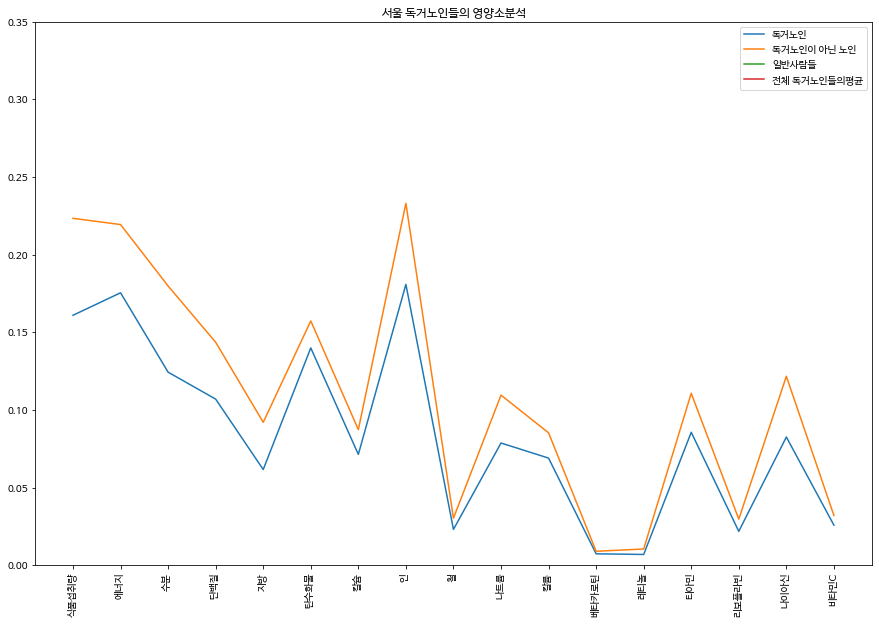

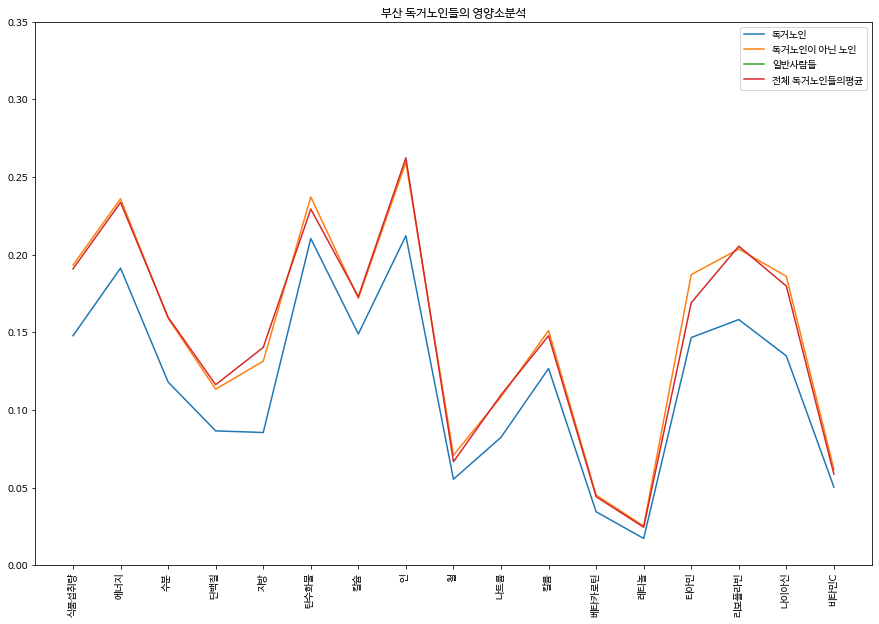

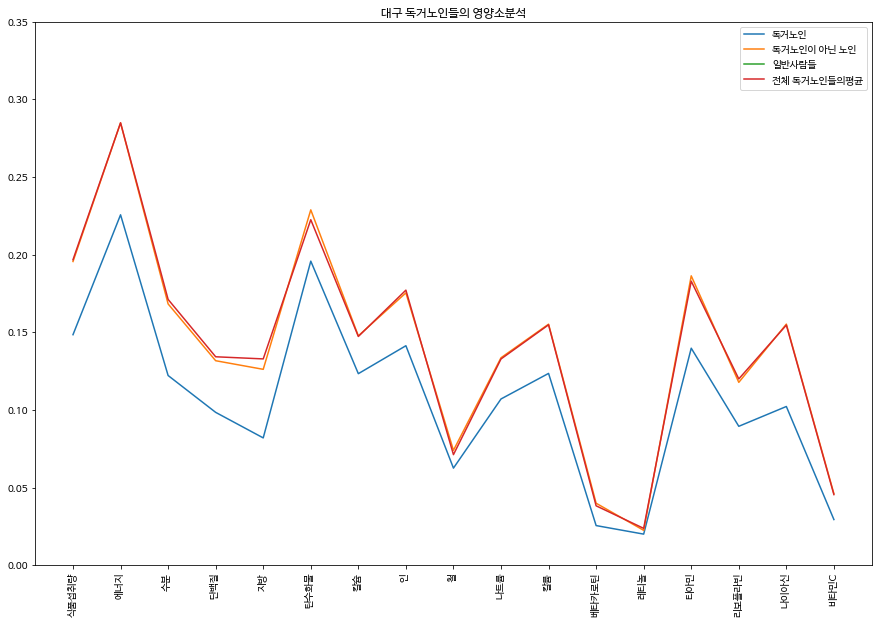

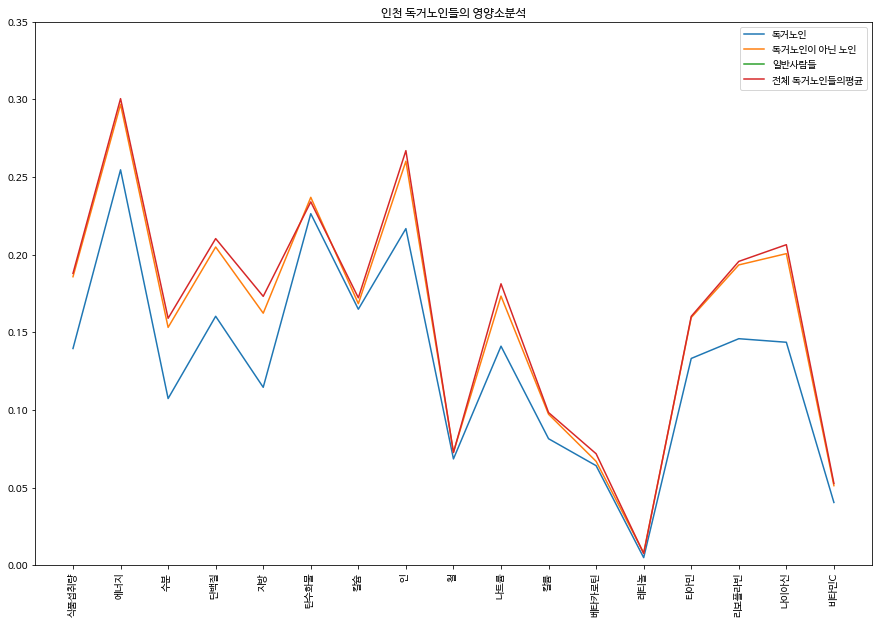

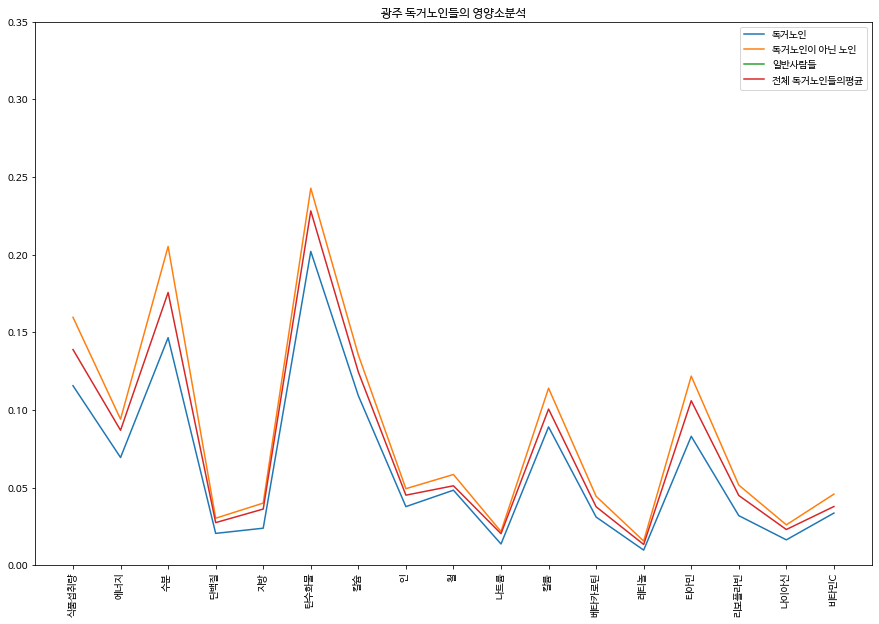

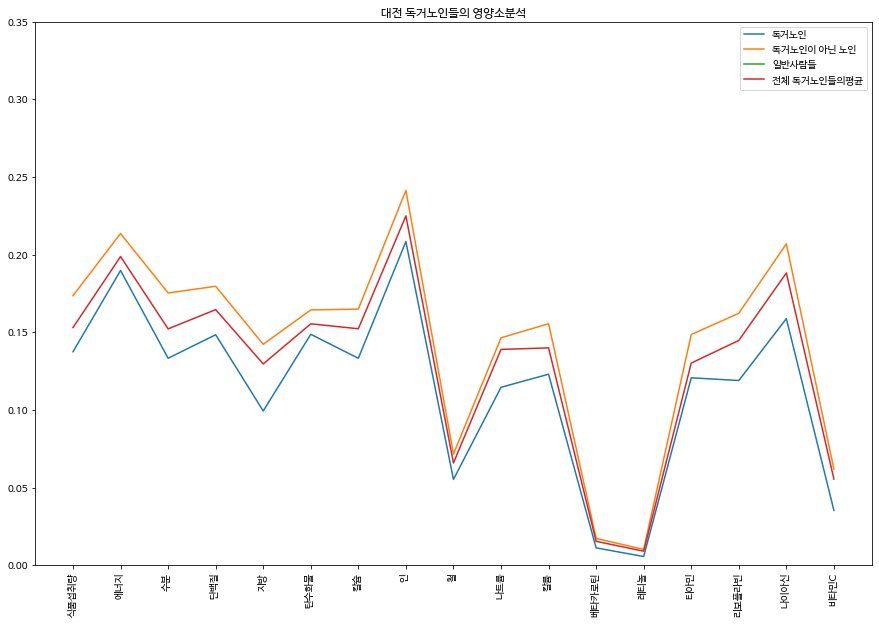

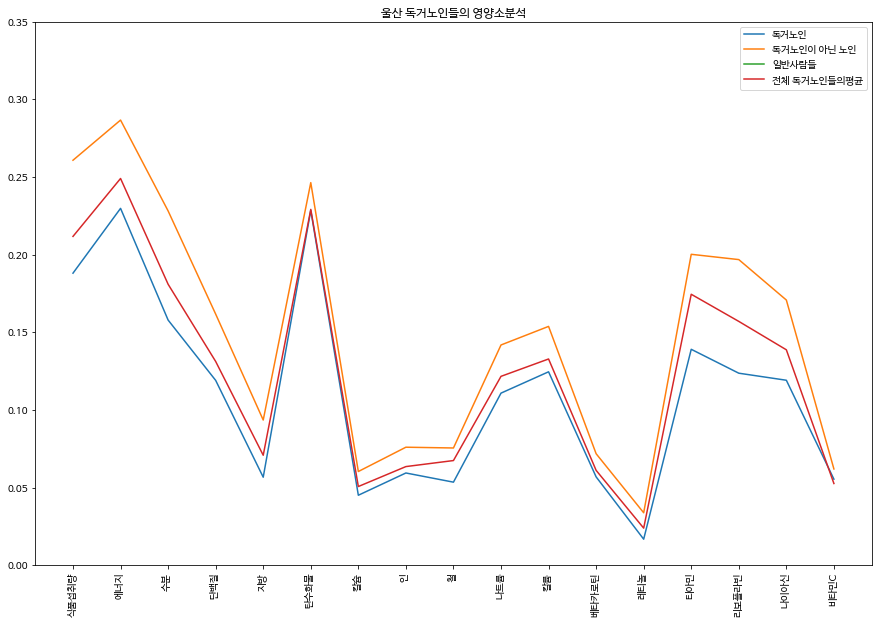

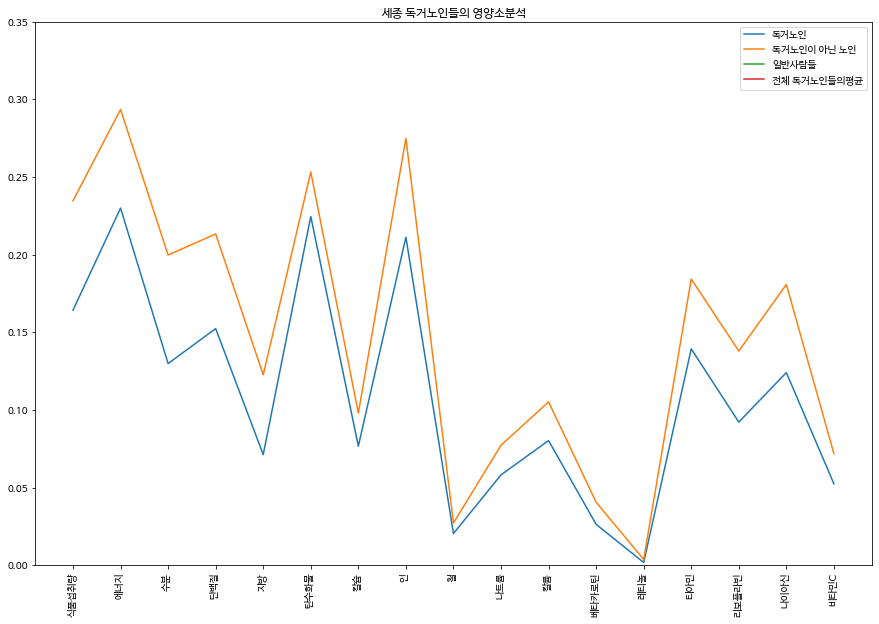

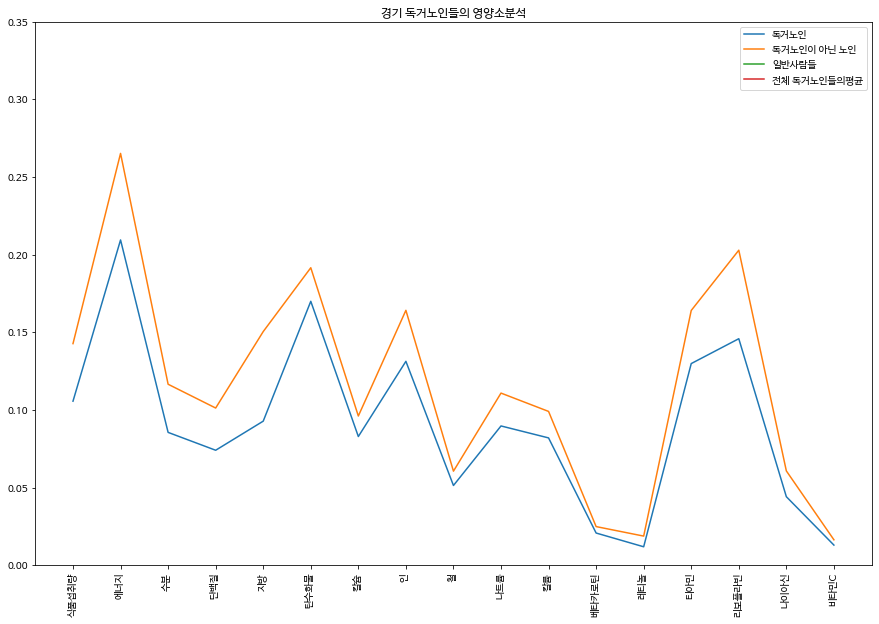

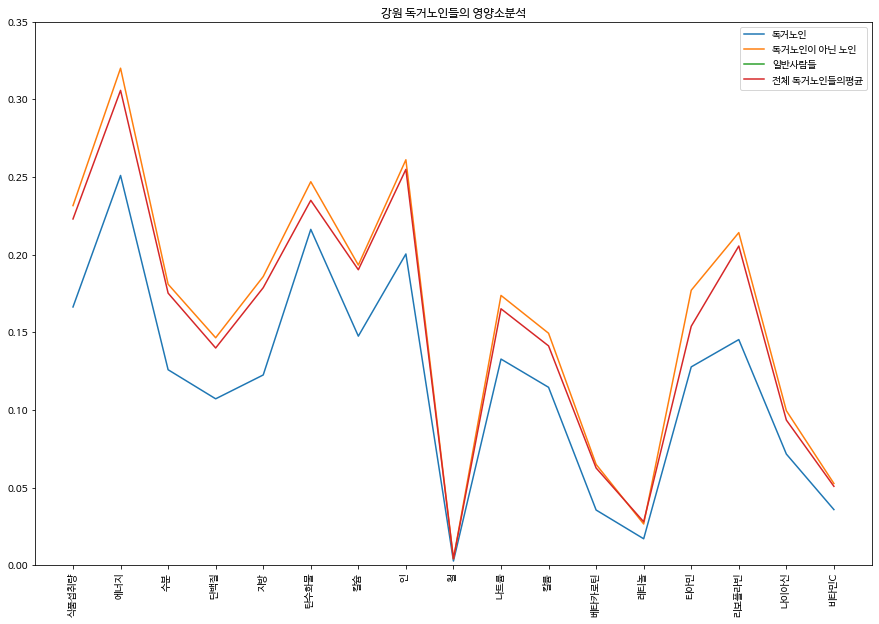

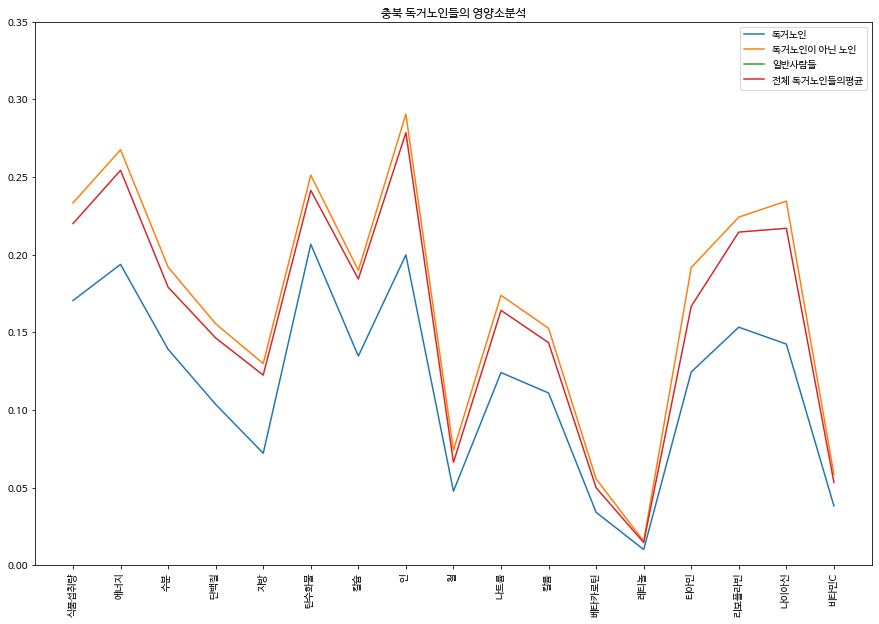

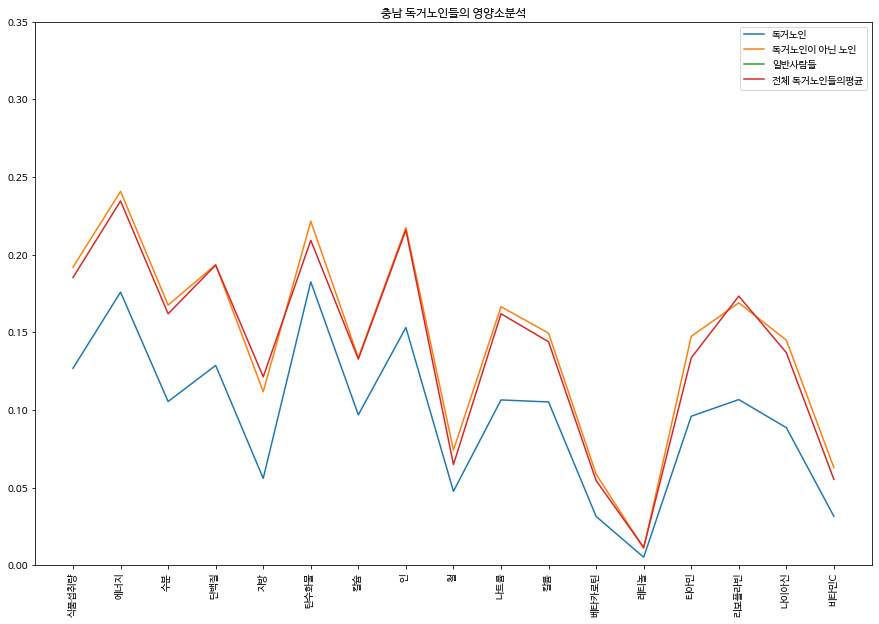

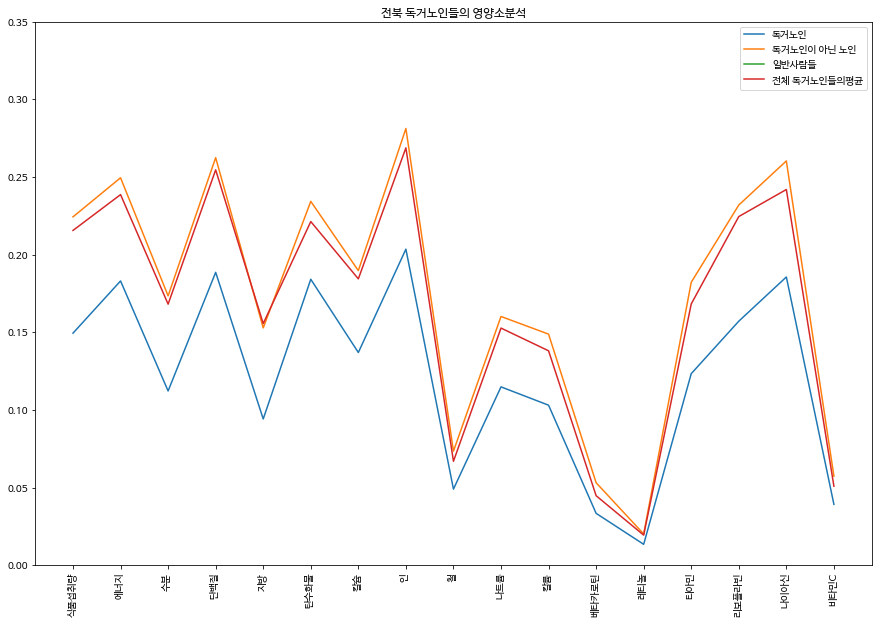

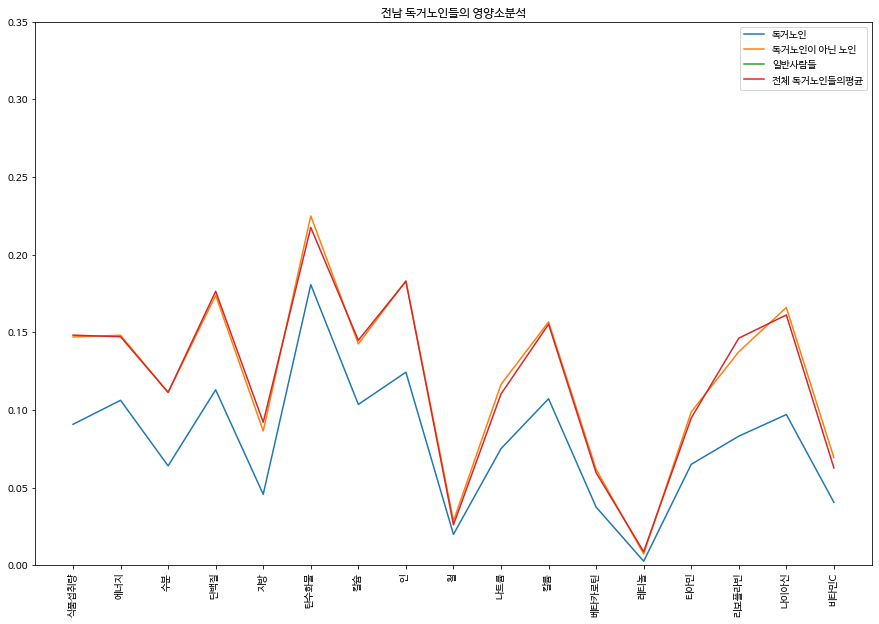

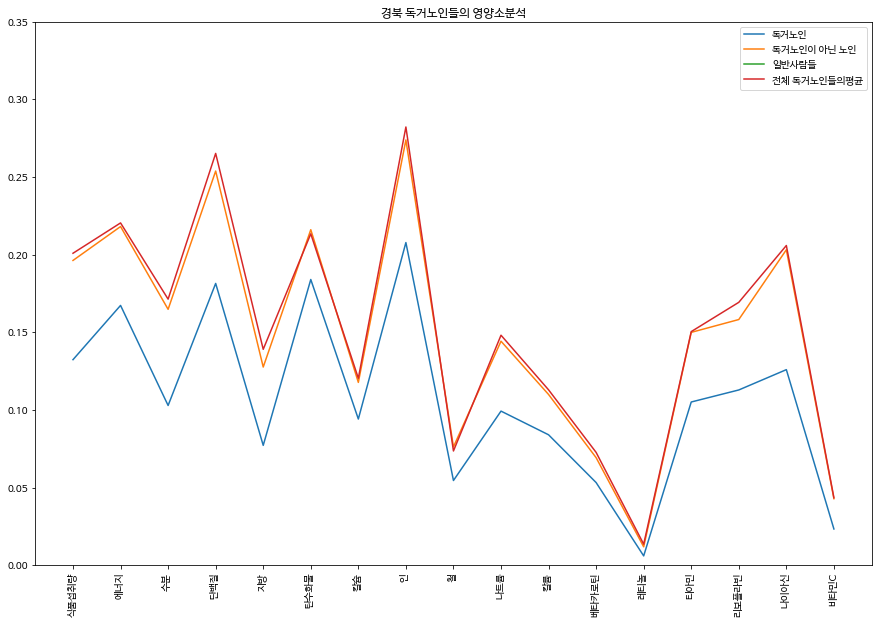

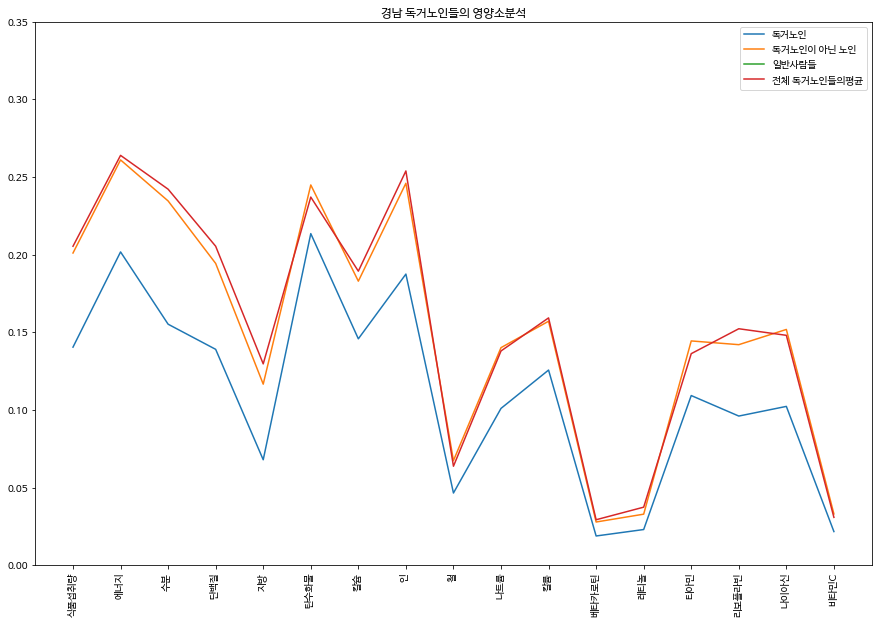

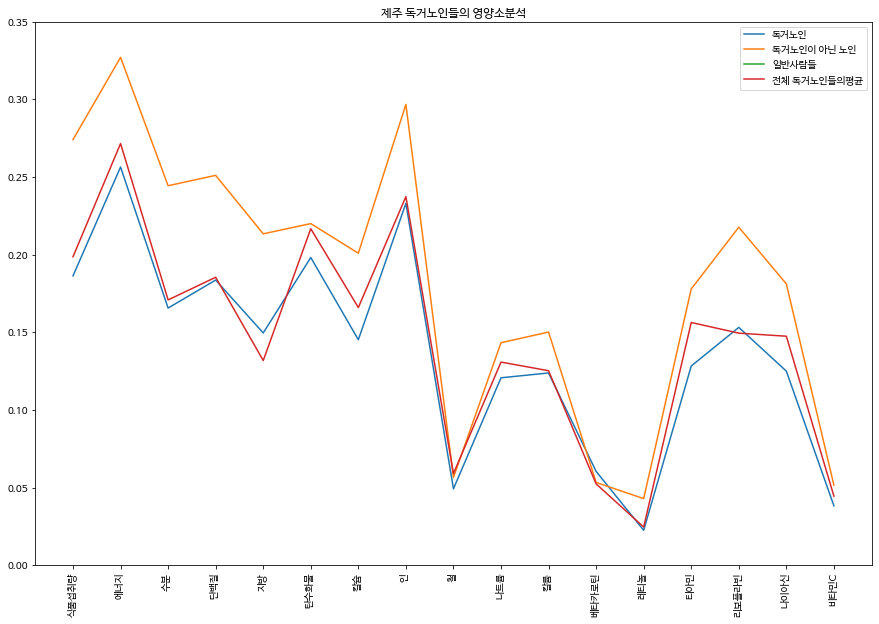

In [ ]:
for i in range(17):
  old_grand_relation_disease_nutrition_scaler(i)

##독거노인들의 제정상황

In [ ]:
def old_grand_relation_income(idx):
  
  grid = gridspec.GridSpec(1,2)#그래프를 그릴 도화지 개수
  plt.figure(figsize=(20,5))
  plt.subplots_adjust(wspace= 0.4, hspace=0.3) #그래프 간의 거리 조절

  ax0 = plt.subplot(grid[0])
  ax1 = plt.subplot(grid[1])
  
  region_old_g = region_alone_old_grand[idx]
  region_old_g_c=region_old_g['incm5'].value_counts()/len(region_old_g['incm5'])
  region_old_g_c = region_old_g_c.sort_index(ascending = True)

  region_not_old_g = region_not_alone_old_grand[idx]
  region_not_old_g_c=region_not_old_g['incm5'].value_counts()/len(region_not_old_g['incm5'])
  region_not_old_g_c = region_not_old_g_c.sort_index(ascending = True)


  x=[1,2,3,4,5]

  ax0.bar(x,region_old_g_c,color='black',alpha=0.3)
  ax0.set_ylim([0, 0.5]) 
  ax0.set_title(f"{region_alone_old_grand_name[idx]} 독거노인들의 소득분위 분석")
  ax0.axhline(0.15,0,len(x), color='purple', linestyle = '--')
  _=ax0.set_xticks(x)
  _=ax0.set_xticklabels(['하','중하','중','중하','중상'])


  ax1.bar(x,region_not_old_g_c,color='black',alpha=0.3)
  ax1.set_ylim([0, 0.5]) 
  ax1.set_title(f"{region_alone_old_grand_name[idx]} 독거노인이 아닌 사람들의 소득분위 분석")
  ax1.axhline(0.15,0,len(x), color='purple', linestyle = '--')
  _=ax1.set_xticks(x)
  _=ax1.set_xticklabels(['하','중하','중','중하','중상'])
  

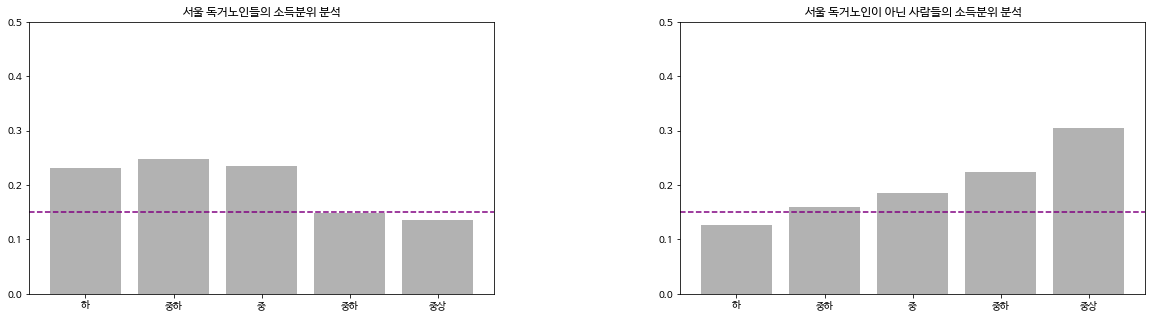

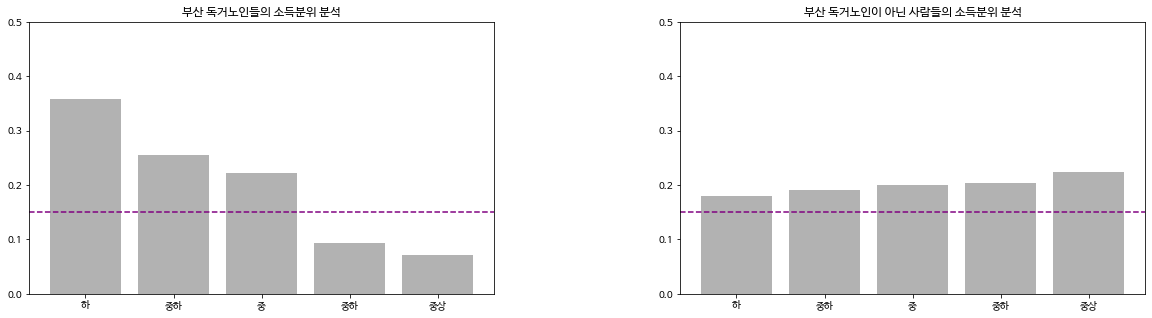

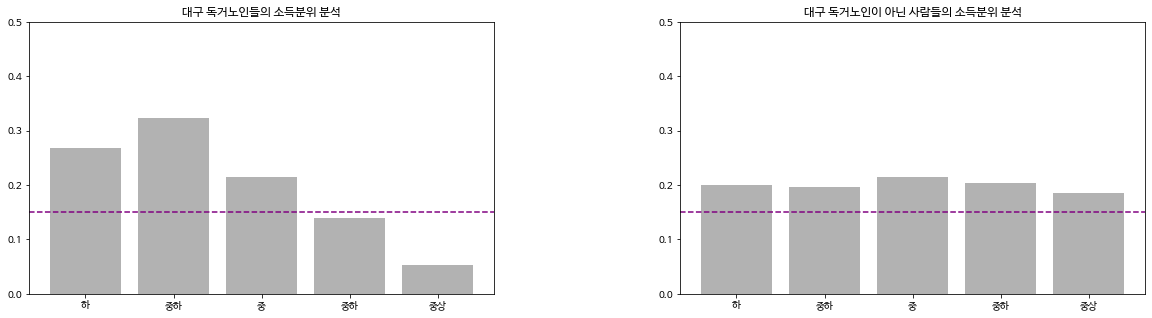

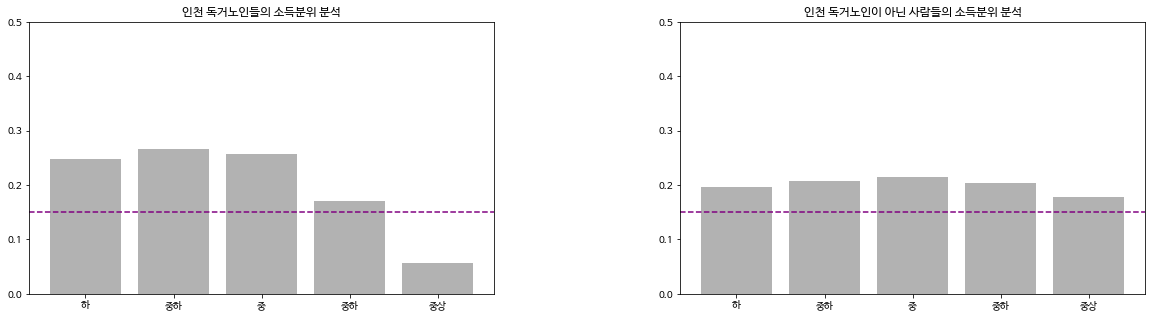

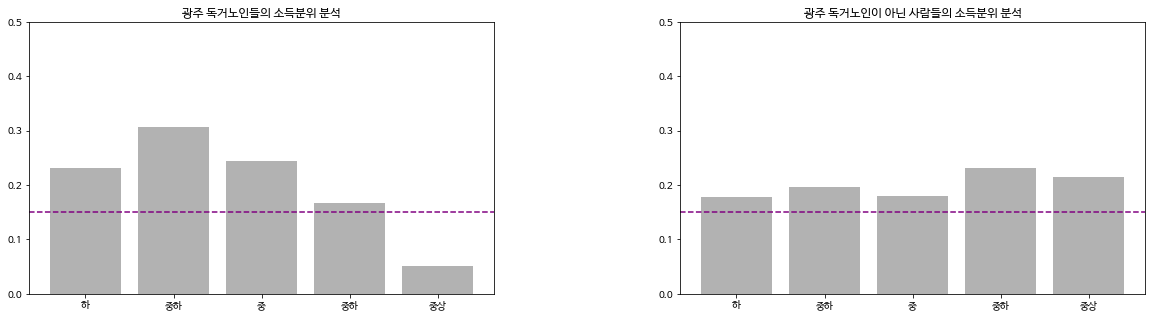

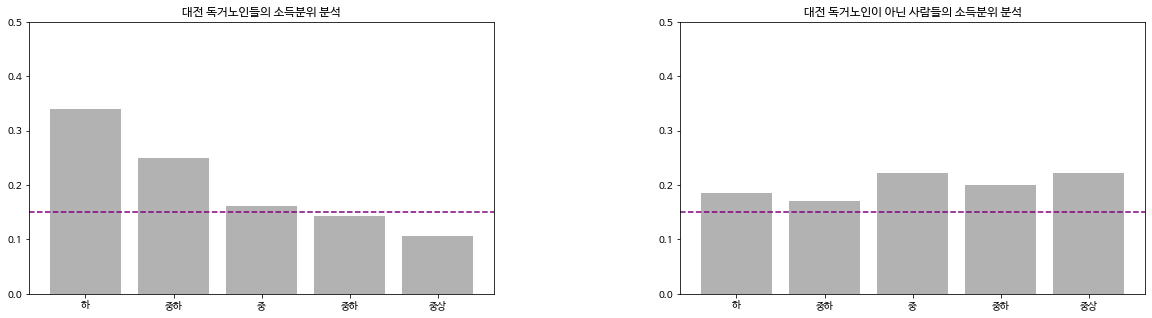

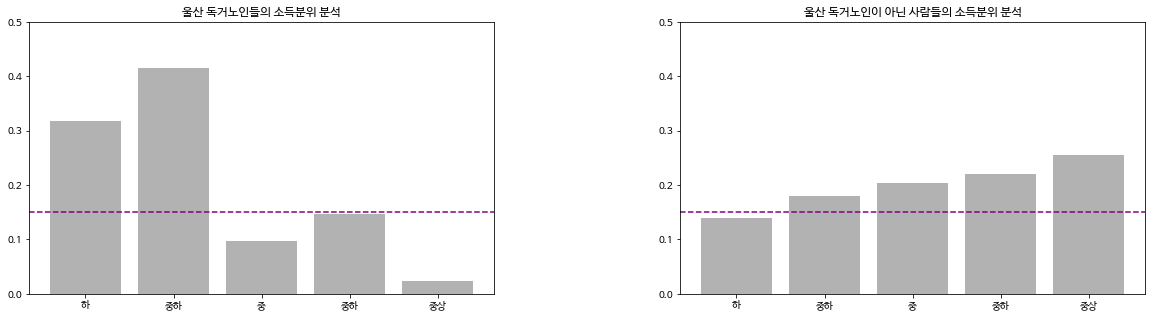

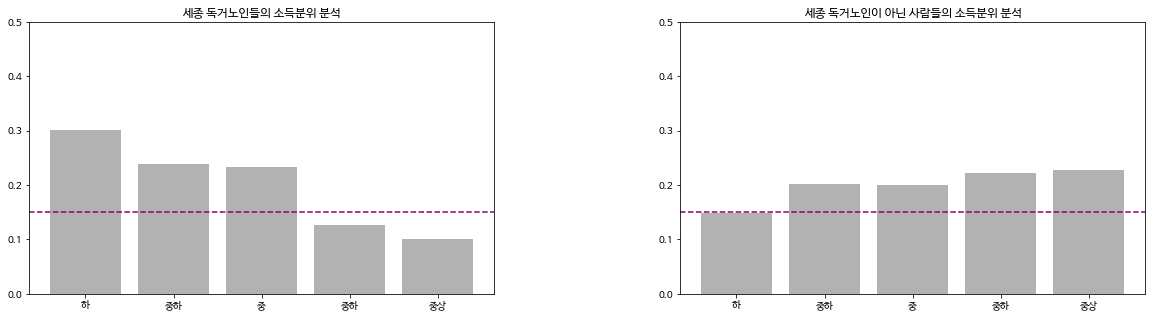

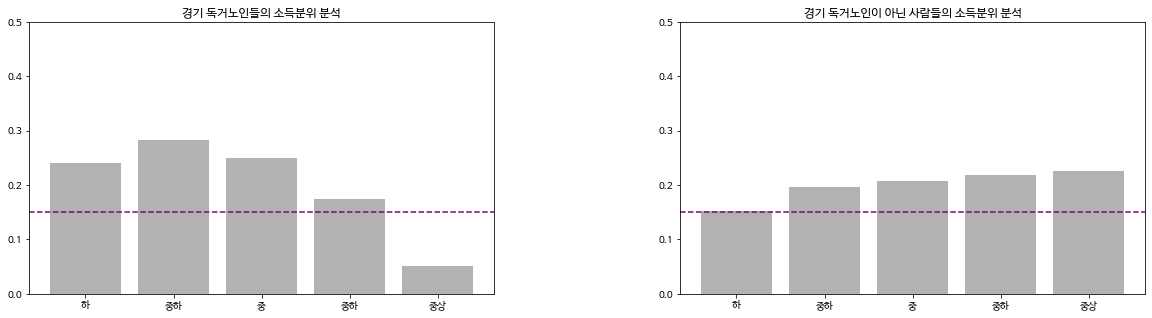

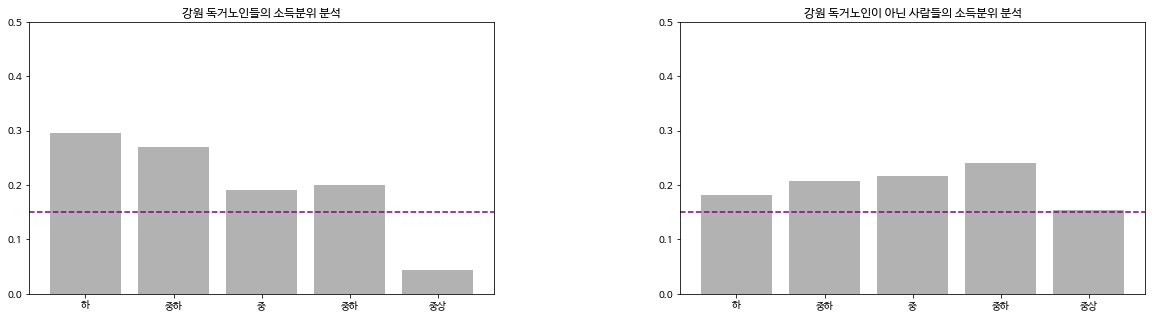

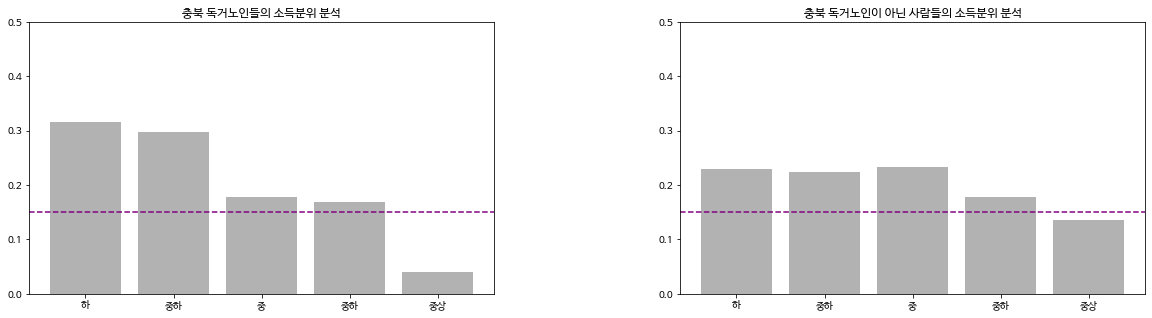

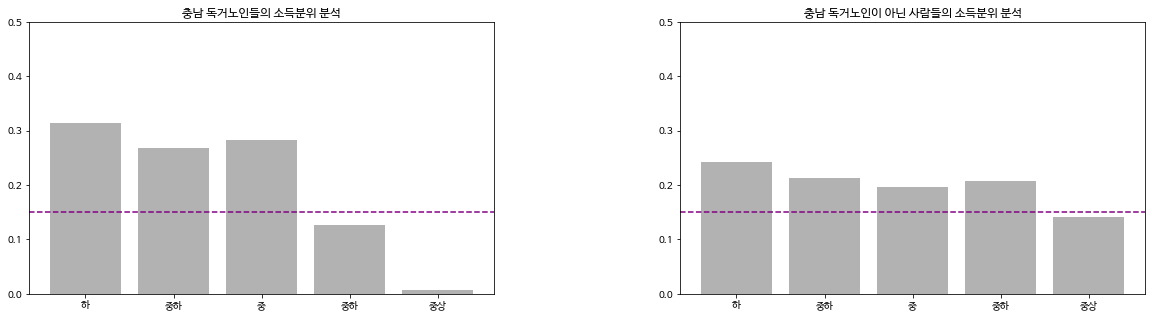

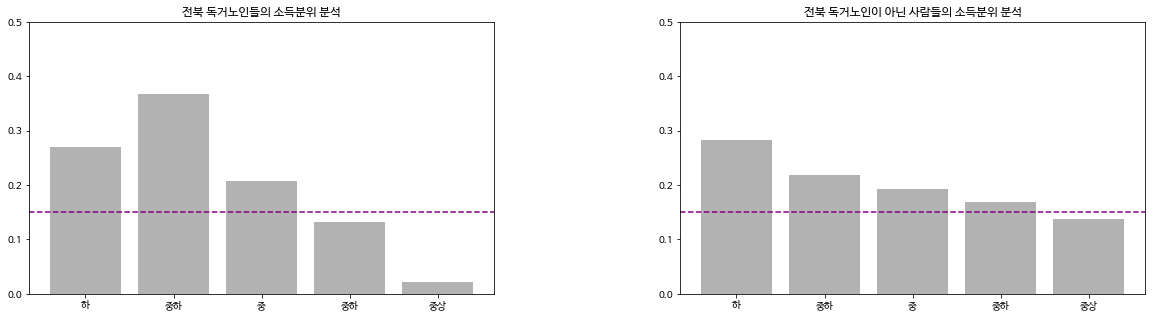

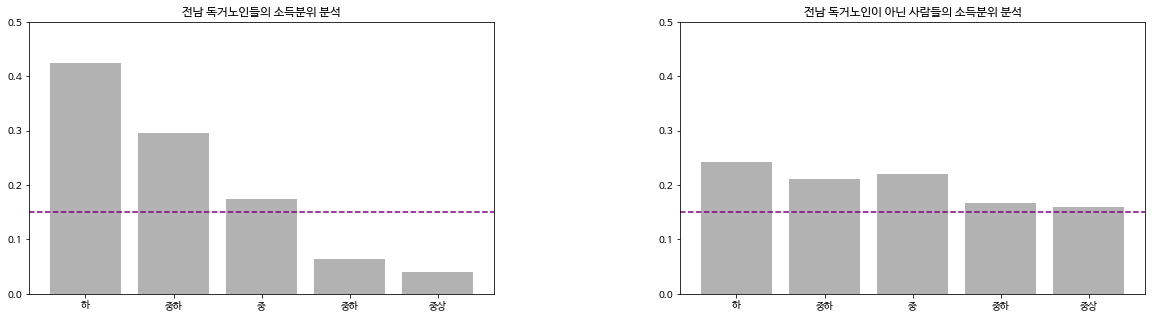

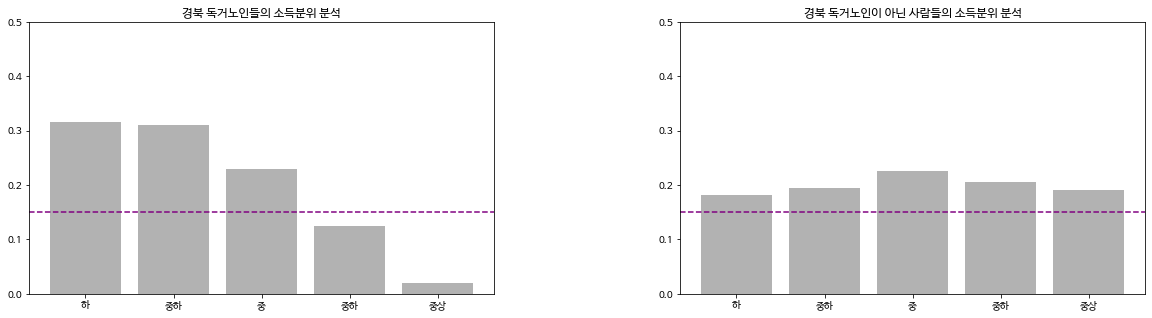

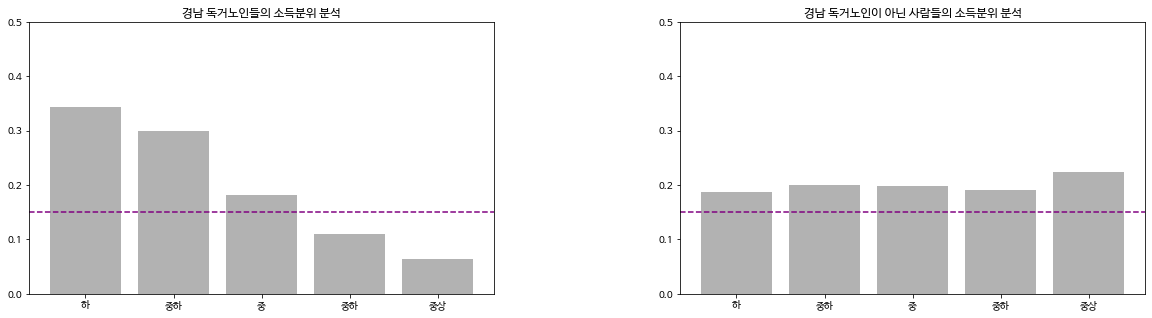

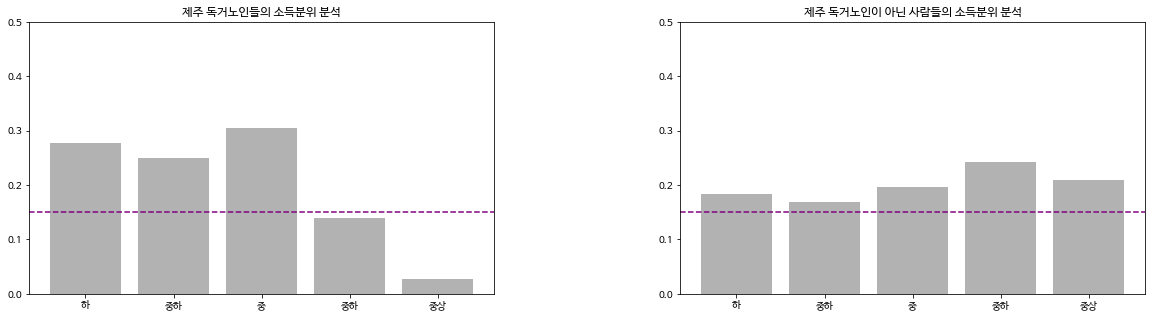

In [ ]:
for i in range(17):
  old_grand_relation_income(i)

  # 독거노인들의 금전문제가 심각하다

In [ ]:
health_info[health_info['variable']== 'incm5']

Unnamed: 0 variable variable description  \
9           9    incm5          소득 5분위수(개인)   

                          option description etc data type  not applicable  \
9  1 : 하 | 2 : 중하 | 3 : 중 | 4 : 중상 | 5 : 상 |  []  category             NaN   

  unknown variable bins  selected  
9     NaN           NaN         1

## 독거노인들의 스트레스

In [ ]:
def old_grand_relation_stress(idx):
  
  grid = gridspec.GridSpec(1,2)#그래프를 그릴 도화지 개수
  plt.figure(figsize=(15,8))
  plt.subplots_adjust(wspace= 0.3, hspace=0.3) #그래프 간의 거리 조절

  ax0 = plt.subplot(grid[0])
  ax1 = plt.subplot(grid[1])
  
  region_old_g = region_alone_old_grand[idx]
  region_old_g_s=region_old_g['mh_stress'].value_counts()/len(region_old_g['mh_stress'])
  region_old_g_s = region_old_g_s.sort_index(ascending = True)

  region_not_old_g = region_not_alone_old_grand[idx]
  region_not_old_g_s=region_not_old_g['mh_stress'].value_counts()/len(region_not_old_g['mh_stress'])
  region_not_old_g_s = region_not_old_g_s.sort_index(ascending = True)


  x=[0,1]
  
  ax0.bar(x,region_old_g_s,color='black',alpha=0.3)
  ax0.set_ylim([0, 1])
  ax0.set_title(f"{region_alone_old_grand_name[idx]} 독거노인들의 스트레스 분석")
  _=ax0.set_xticks(x)
  _=ax0.set_xticklabels(['스트레스적게느낌','스트레스많이느낌'])
  ax0.axhline(0.7,0,len(x), color='purple', linestyle = '--')
  ax0.axhline(0.2,0,len(x), color='red', linestyle = '--')

  ax1.bar(x,region_not_old_g_s,color='black',alpha=0.3)
  ax1.set_ylim([0, 1]) 
  ax1.set_title(f"{region_alone_old_grand_name[idx]} 독거노인이 아닌 사람들의 스트레스 분석")
  _=ax1.set_xticks(x)
  _=ax1.set_xticklabels(['스트레스적게느낌','스트레스많이느낌'])
  ax1.axhline(0.7,0,len(x), color='purple', linestyle = '--')
  ax1.axhline(0.2,0,len(x), color='red', linestyle = '--')

  

  

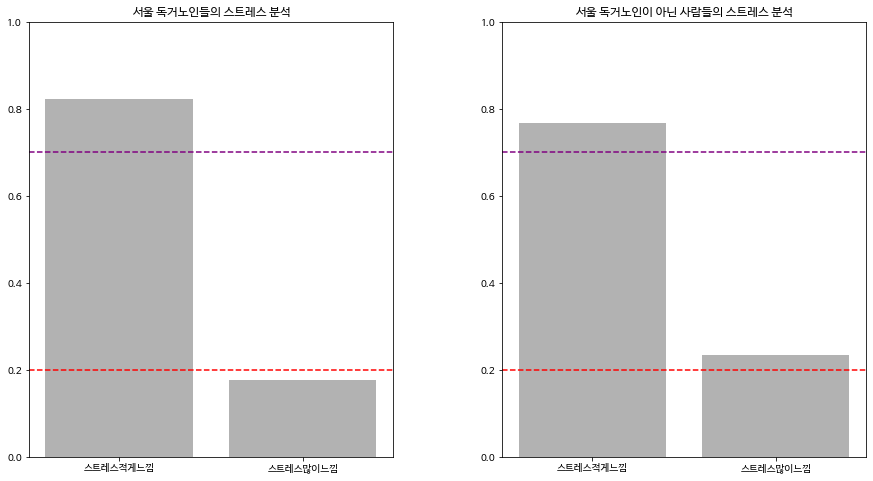

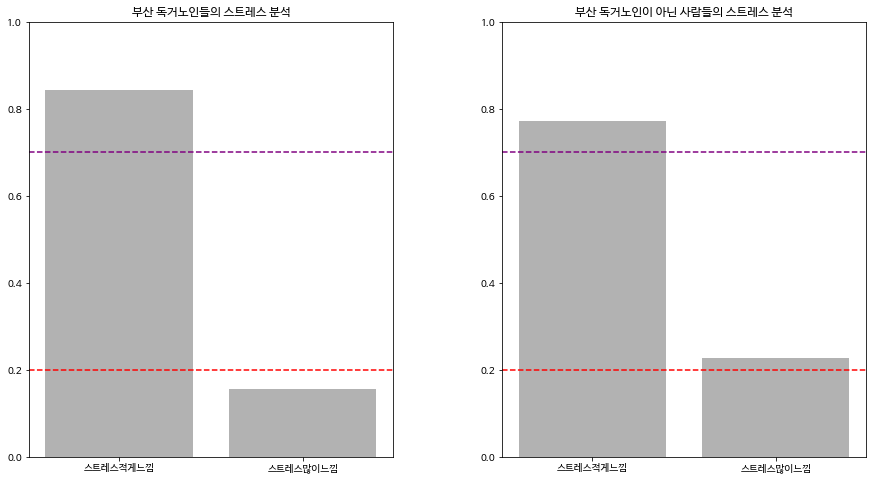

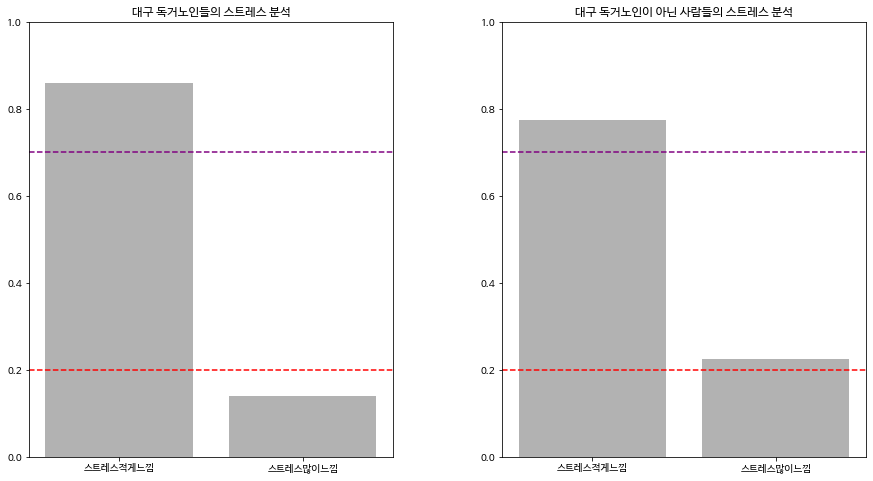

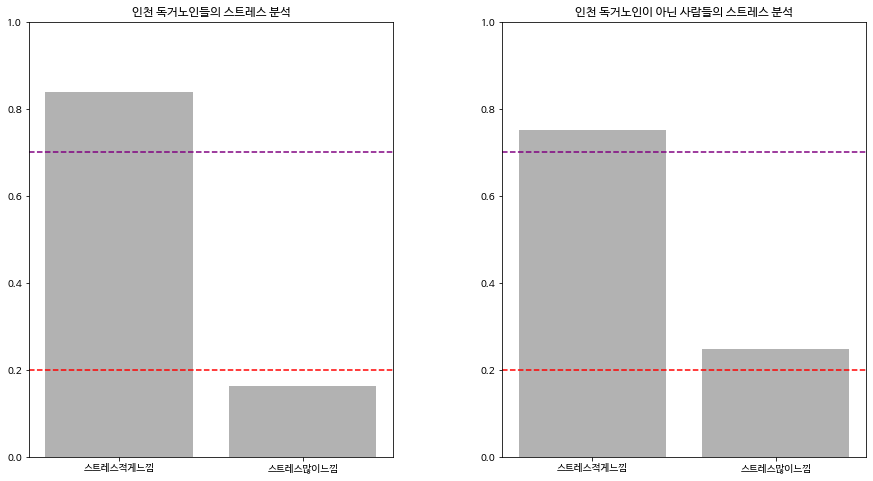

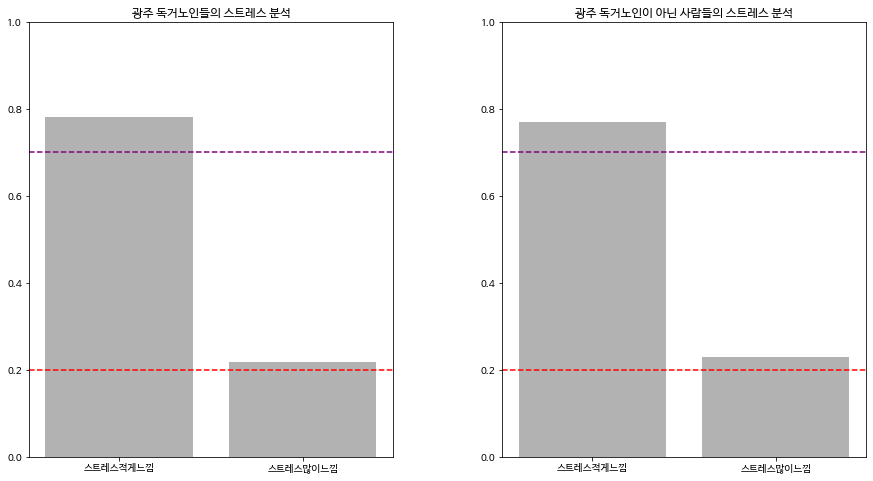

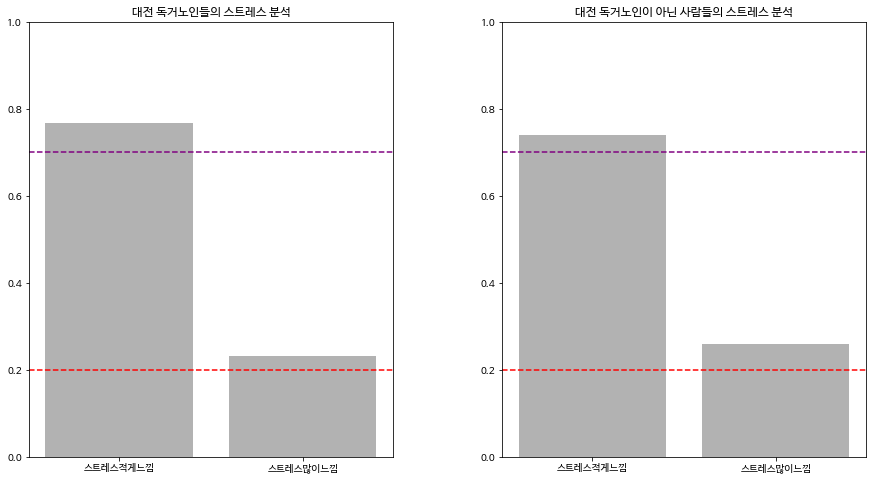

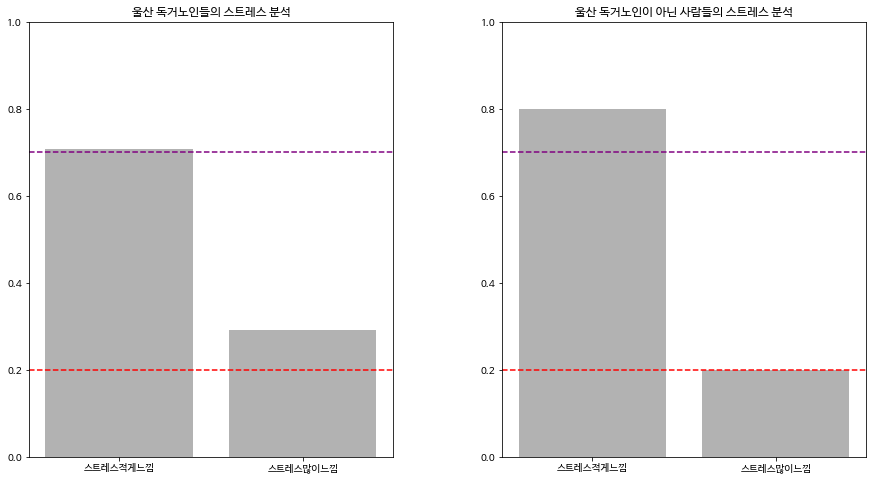

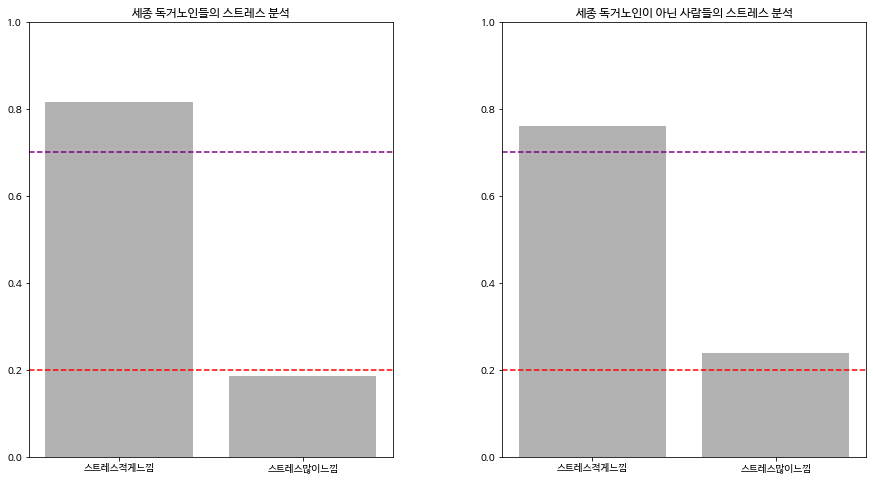

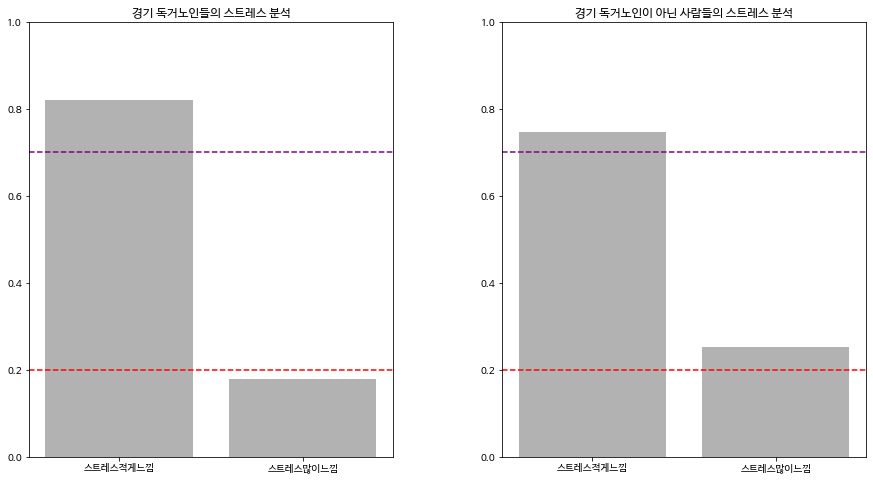

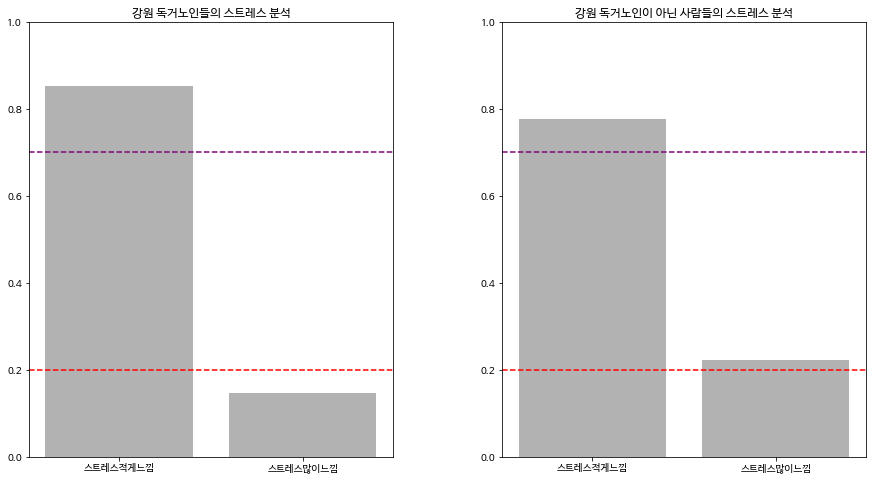

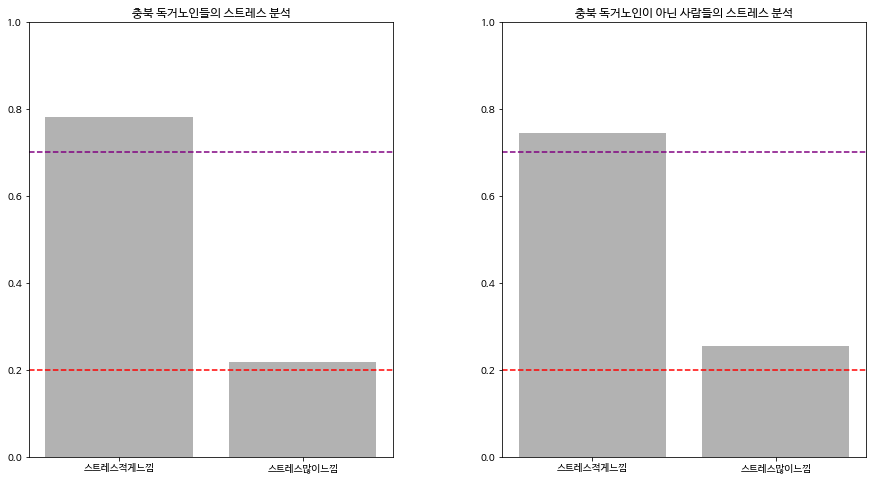

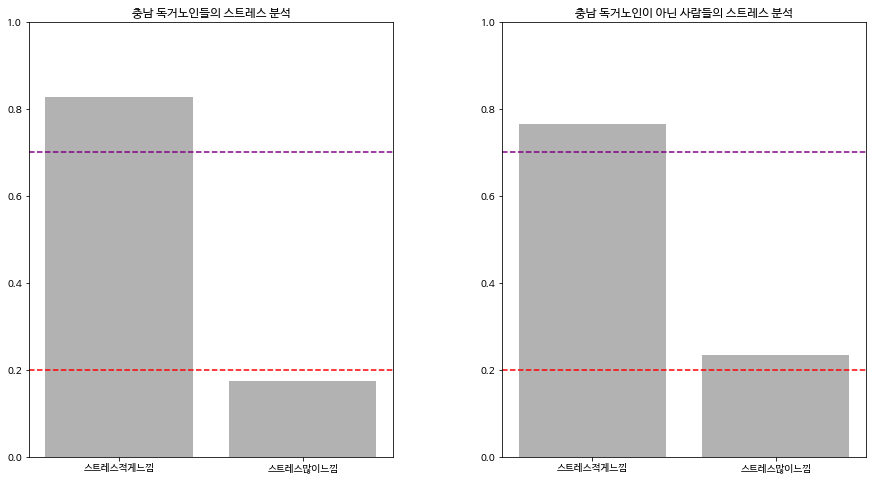

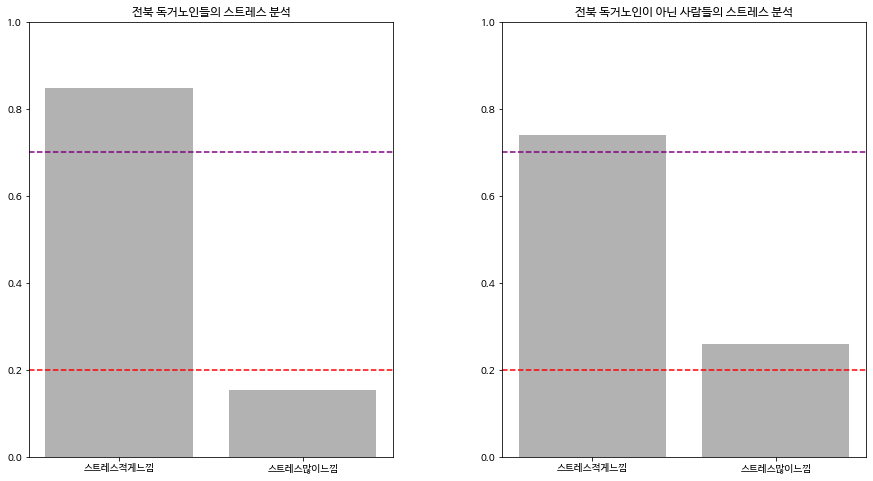

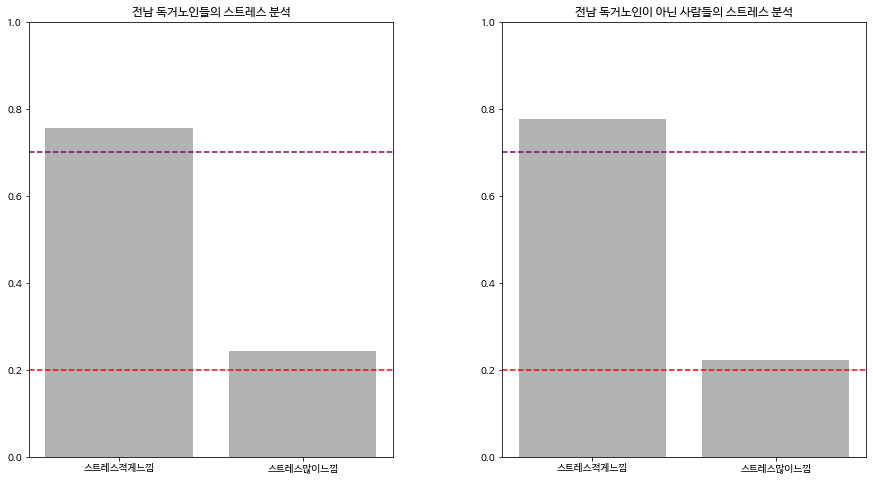

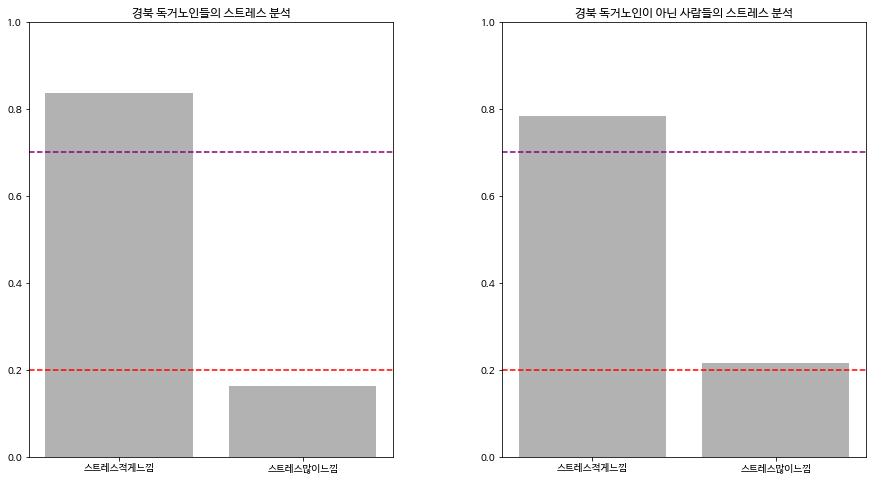

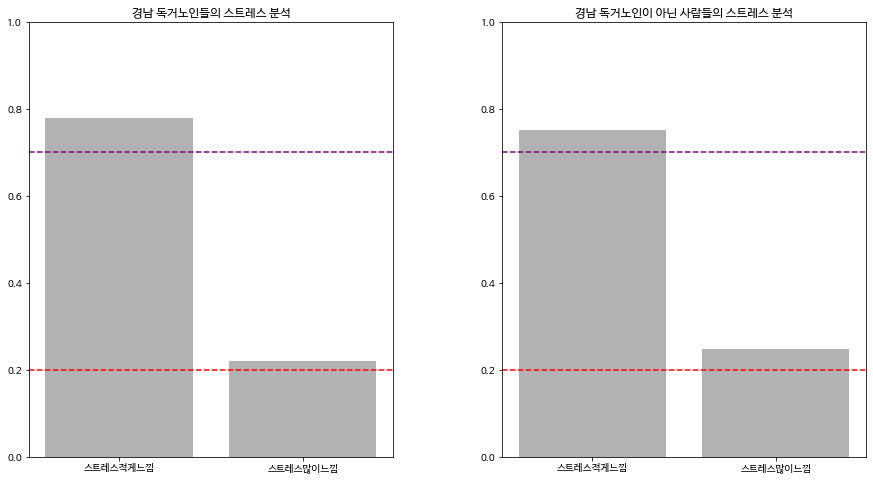

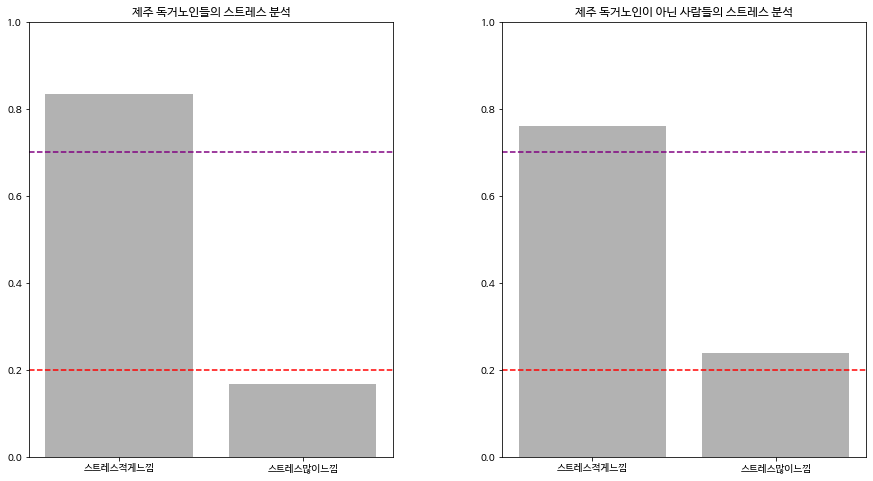

In [ ]:
for i in range(17):
  old_grand_relation_stress(i)

#독거노인들이 오히려 스트레스는없음 울산만 많음
# 울산독거 노인이 스트레스 많은이유가 궁금

In [ ]:
health_info[health_info['variable']== 'mh_stress']

Unnamed: 0   variable variable description  \
33          33  mh_stress             스트레스 인지율   

                                   option description  \
33  0 : 스트레스 적게 느낌(문항2-) | 1 : 스트레스 많이 느낌(문항2-②) |   

                                                  etc data type  \
33  ['평소 일상생활 중에 스트레스를 ‘대단히 많이’ 또는 ‘많이’ 느끼는 편이라고 응...  category   

    not applicable unknown variable bins  selected  
33             NaN     NaN           NaN         1

## 독거노인 음주량 측정

In [ ]:
# 술

In [ ]:
a = region_not_alone_old_grand[6]
b = a['BD1_11'].value_counts()/len(a['BD1_11'])
b.sort_index(ascending=True)


-1.0    0.129815
 1.0    0.142653
 2.0    0.216833
 3.0    0.131241
 4.0    0.195435
 5.0    0.126961
 6.0    0.057061
Name: BD1_11, dtype: float64

In [ ]:
def old_grand_relation_alchol(idx):
  
  grid = gridspec.GridSpec(1,2)#그래프를 그릴 도화지 개수
  plt.figure(figsize=(15,8))
  plt.subplots_adjust(wspace= 0.3, hspace=0.3) #그래프 간의 거리 조절

  ax0 = plt.subplot(grid[0])
  ax1 = plt.subplot(grid[1])
  
  region_old_g = region_alone_old_grand[idx]
  region_old_g_a=region_old_g['BD1_11'].value_counts()/len(region_old_g['BD1_11'])
  
  region_not_old_g = region_not_alone_old_grand[idx]
  region_not_old_g_a=region_not_old_g['BD1_11'].value_counts()/len(region_not_old_g['BD1_11'])
  
  region_old_g_a = region_old_g_a.sort_index(ascending = True)
  region_not_old_g_a = region_not_old_g_a.sort_index(ascending = True)

  xo = region_old_g_a.index
  xx = region_not_old_g_a.index

  # print("xo :", xo)
  # print("xx :", xx)

  xo_label = []
  xx_label = []

  for i in xo:
    if i==-1:
      xo_label.append('모름')
    if i==1:
      xo_label.append('전혀안마심')
    if i==2:
      xo_label.append('월 1회미만')
    if i==3:
      xo_label.append('월1회')
    if i==4:
      xo_label.append('월 2~4회')
    if i==5:
      xo_label.append('주2~3회')
    if i==6:
      xo_label.append('주4회이상')


    for i in xx:
      if i==-1:
        xx_label.append('모름')
      if i==1:
        xx_label.append('전혀안마심')
      if i==2:
        xx_label.append('월 1회미만')
      if i==3:
        xx_label.append('월1회')
      if i==4:
        xx_label.append('월 2~4회')
      if i==5:
        xx_label.append('주2~3회')
      if i==6:
        xx_label.append('주4회이상')
  
  # print("xo :", xo)
  # print("xo label:", xo_label)

  x1 = range(len(xo))
  x2 = range(len(xx))

  ax0.bar(x1,region_old_g_a,color='black',alpha=0.3)
  ax0.set_ylim([0, 0.7])
  ax0.set_title(f"{region_alone_old_grand_name[idx]} 독거노인들의 음주량 분석")
  _=ax0.set_xticks(x1)
  _=ax0.set_xticklabels(xo_label)
  ax0.axhline(0.15,0,len(xo), color='purple', linestyle = '--')

  ax1.bar(x2,region_not_old_g_a,color='black',alpha=0.3)
  ax1.set_ylim([0, 0.7]) 
  ax1.set_title(f"{region_alone_old_grand_name[idx]} 독거노인이 아닌 사람들의음주량 분석")
  _=ax1.set_xticks(x2)
  _=ax1.set_xticklabels(xx_label)
  ax1.axhline(0.15,0,len(xx), color='purple', linestyle = '--')
  

  

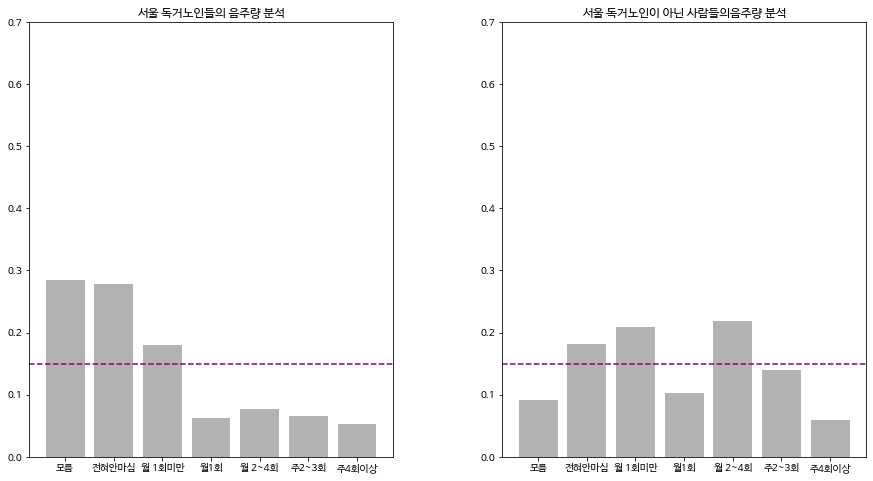

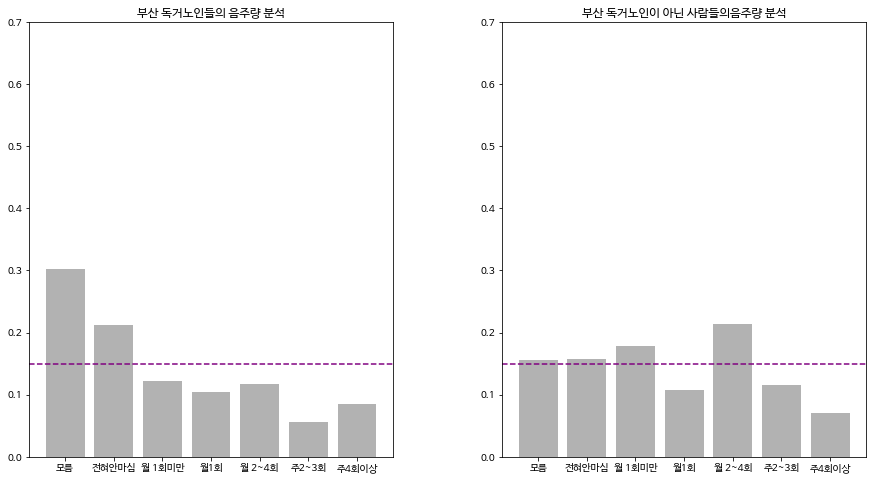

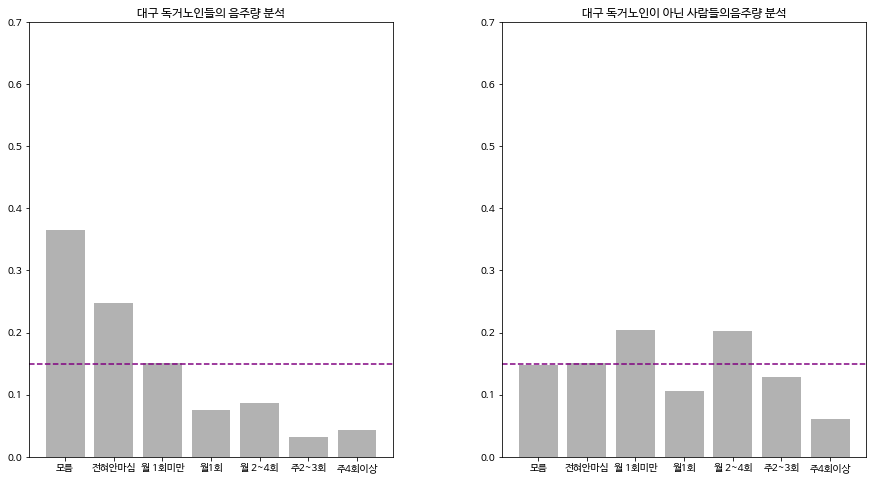

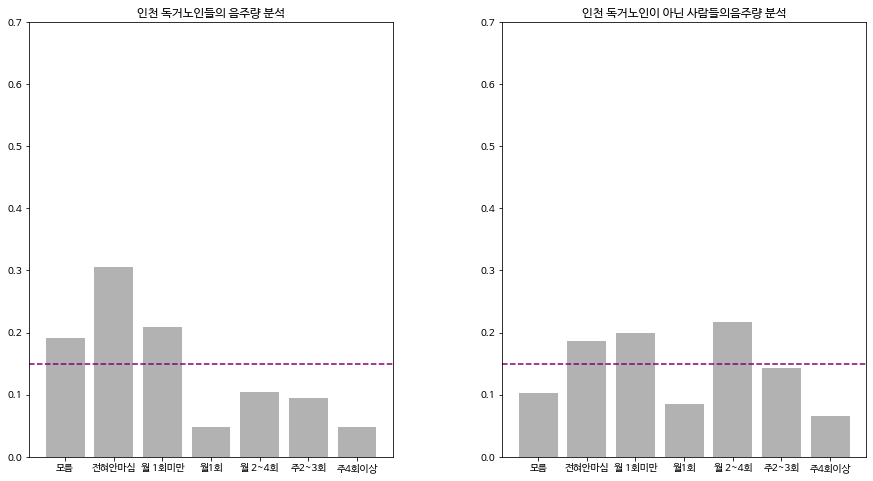

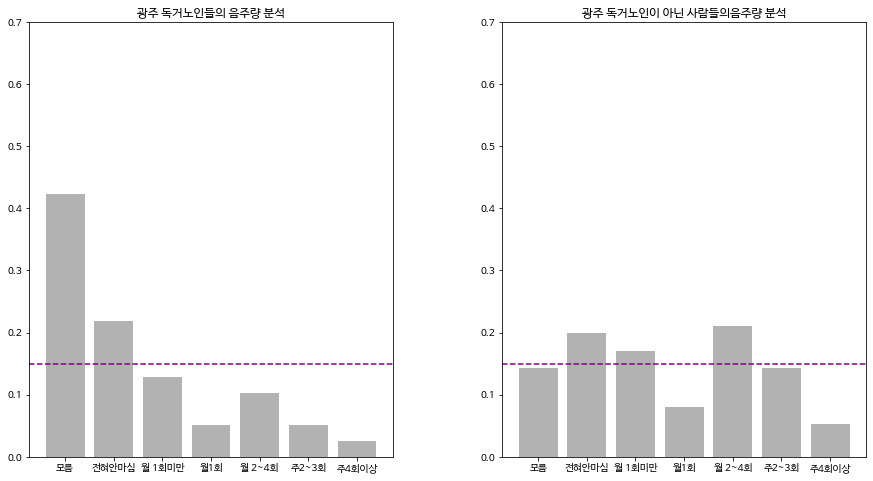

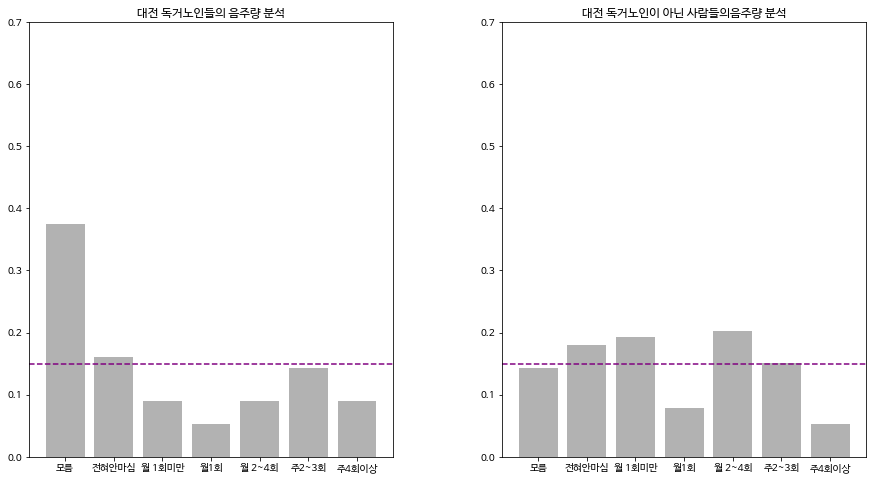

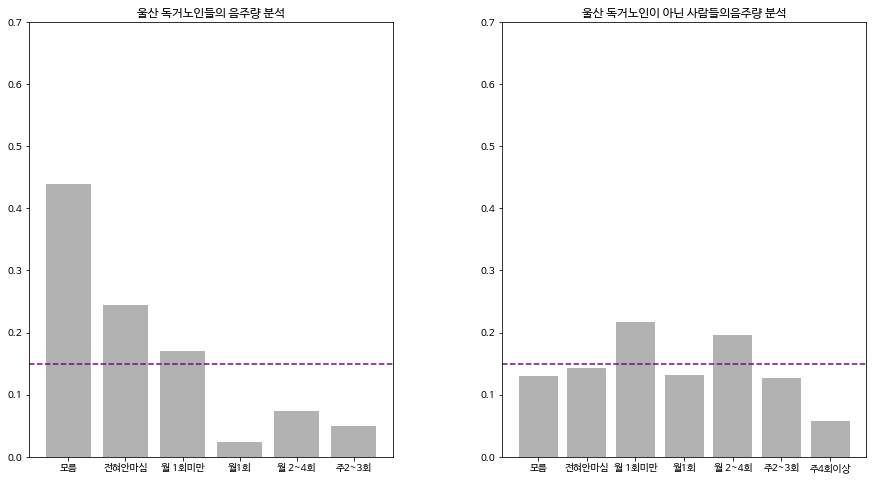

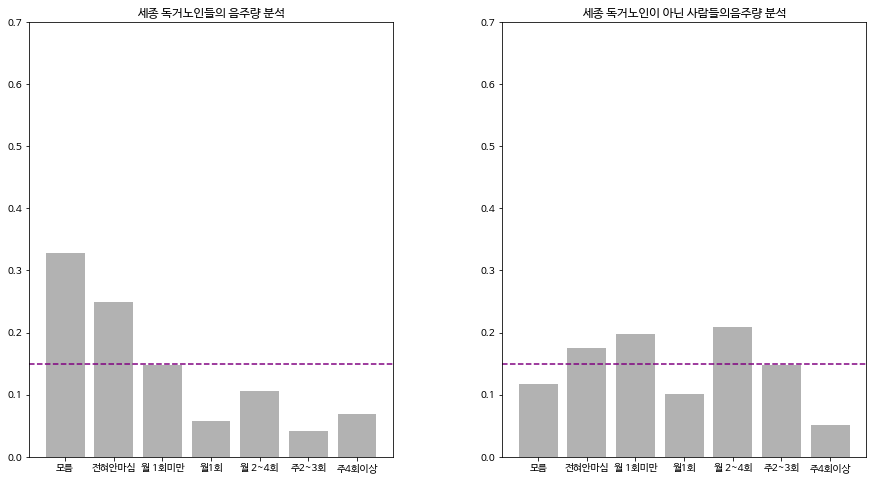

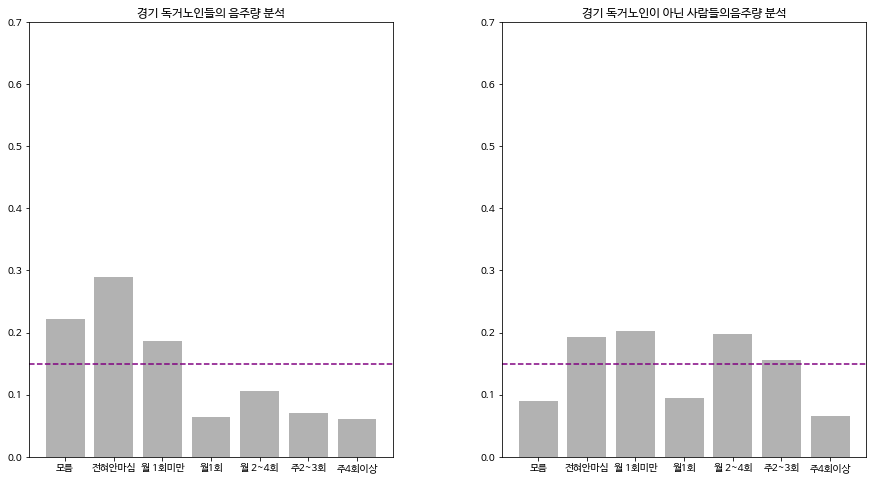

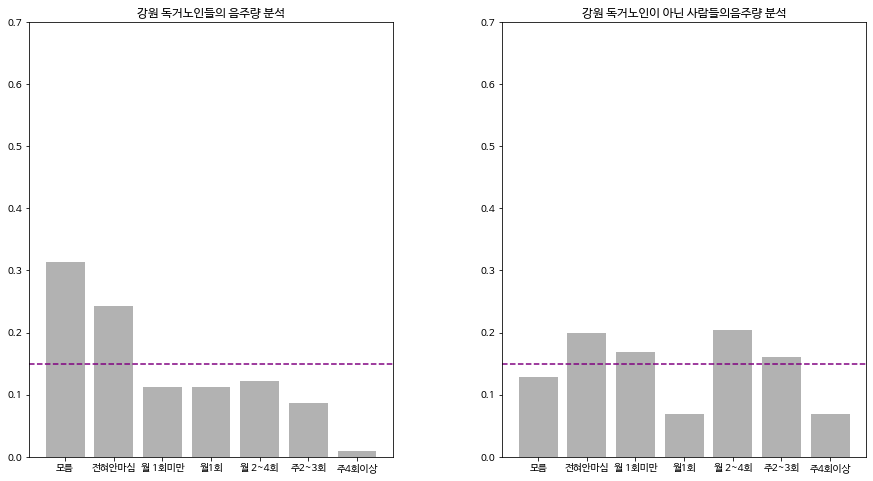

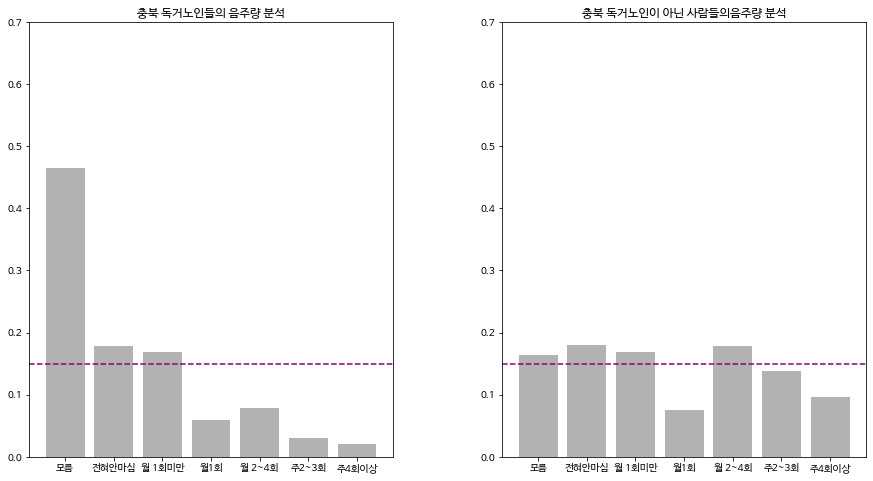

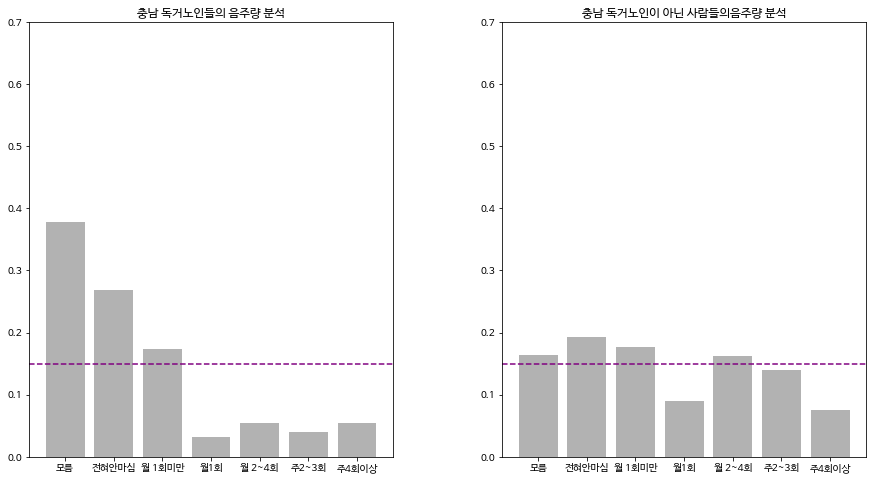

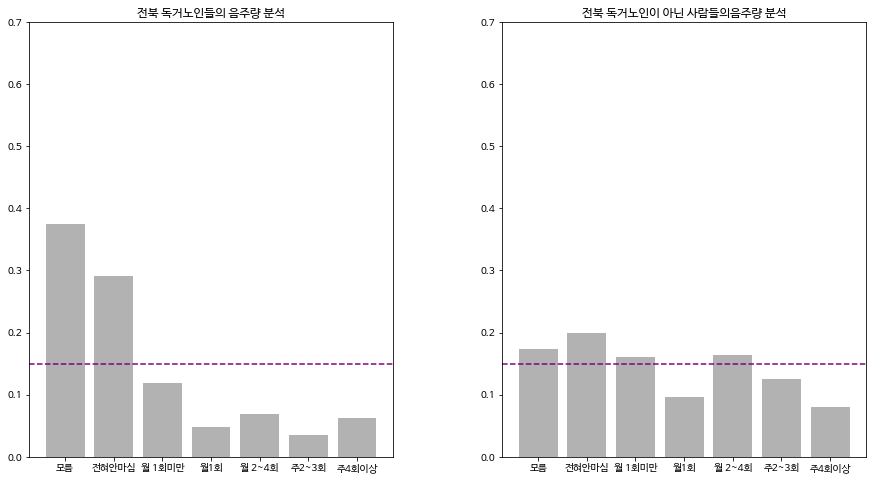

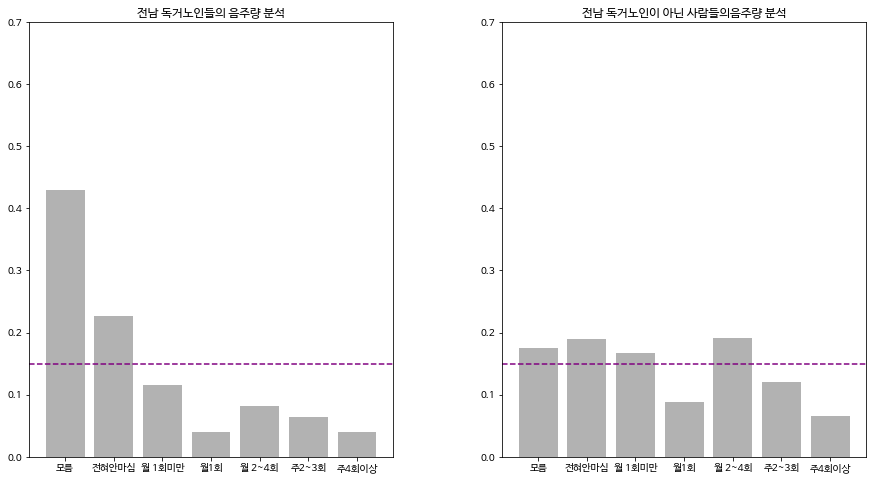

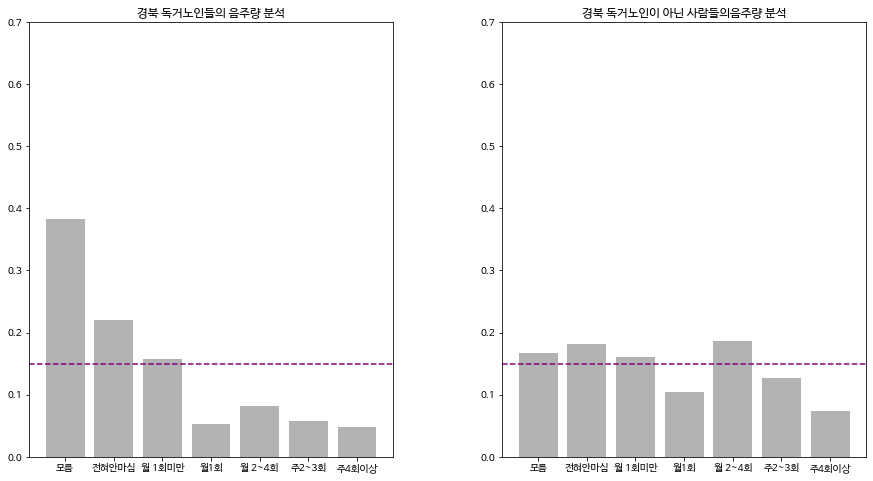

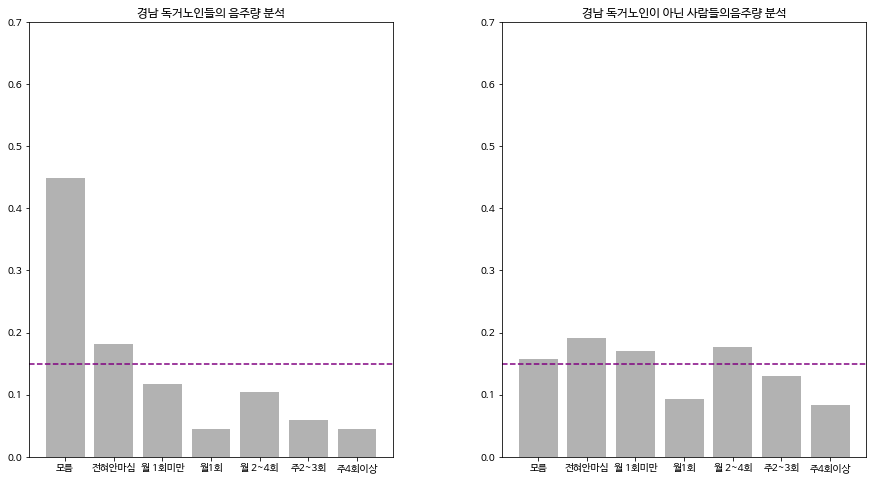

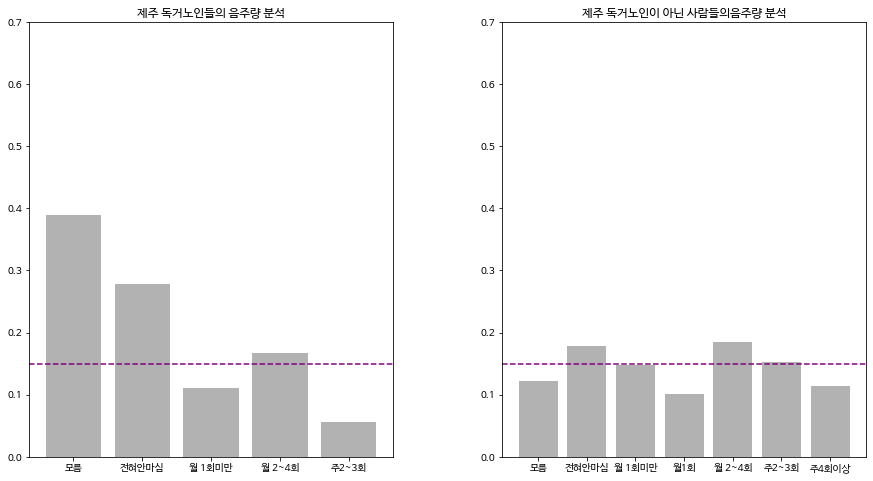

In [ ]:
for i in range(17):
  old_grand_relation_alchol(i)

  ##독거노인들이 일반인들보다 술을 얼만큼 마시는지 모르는경우가많다.

  # ?? 왜 모름이 압도적으로 높은거지?
  # 기억이 안날정도로 마신다..?


 

In [ ]:
health_info[health_info['variable'] == 'BD1_11']

Unnamed: 0 variable variable description  \
27          27   BD1_11    (만12세이상) 1년간 음주빈도   

                                   option description etc data type  \
27  1 : 최근 1년간 전혀 마시지 않았다 | 2 : 월1회미만 | 3 : 월1회정도 ...  []  category   

    not applicable unknown variable bins  selected  
27             8.0       9           NaN         1

## 주관적건강인지

In [ ]:
def old_grand_relation_knowh(idx):
  
  grid = gridspec.GridSpec(1,2)#그래프를 그릴 도화지 개수
  plt.figure(figsize=(15,8))
  plt.subplots_adjust(wspace= 0.3, hspace=0.3) #그래프 간의 거리 조절

  ax0 = plt.subplot(grid[0])
  ax1 = plt.subplot(grid[1])
  
  check = [-2.0 , 1.0 ,2.0 ,3.0 ,4.0, 5.0]

  region_old_g = region_alone_old_grand[idx]
  region_old_g_h=region_old_g['D_1_1'].value_counts()/len(region_old_g['D_1_1']) 
  for i in check:
    if i not in region_old_g_h.index:
      region_old_g_h[float(i)]=0
  region_old_g_h = region_old_g_h.sort_index(ascending = True)
  
  region_not_old_g = region_not_alone_old_grand[idx]
  region_not_old_g_h=region_not_old_g['D_1_1'].value_counts()/len(region_not_old_g['D_1_1'])
  for i in check:
    if i not in region_not_old_g_h.index:
      region_not_old_g_h[float(i)]=0
  region_not_old_g_h = region_not_old_g_h.sort_index(ascending = True)


  x=[1,2,3,4,5,6]

  ax0.bar(x,region_old_g_h,color='black',alpha=0.3)
  ax0.set_ylim([0, 1])
  ax0.set_title(f"{region_alone_old_grand_name[idx]} 독거노인들의 주관적건강인지 분석")
  _=ax0.set_xticks(x)
  _=ax0.set_xticklabels(['무응답','매우좋음','좋음','보통','나쁨','매우나쁨'])
  ax0.axhline(0.15,0,len(x), color='purple', linestyle = '--')

  ax1.bar(x,region_not_old_g_h,color='black',alpha=0.3)
  ax1.set_ylim([0, 1]) 
  ax1.set_title(f"{region_alone_old_grand_name[idx]} 독거노인이 아닌 사람들의 주관적건강인지 분석")
  _=ax1.set_xticks(x)
  _=ax1.set_xticklabels(['무응답','매우좋음','좋음','보통','나쁨','매우나쁨'])
  ax1.axhline(0.15,0,len(x), color='purple', linestyle = '--')
  

  

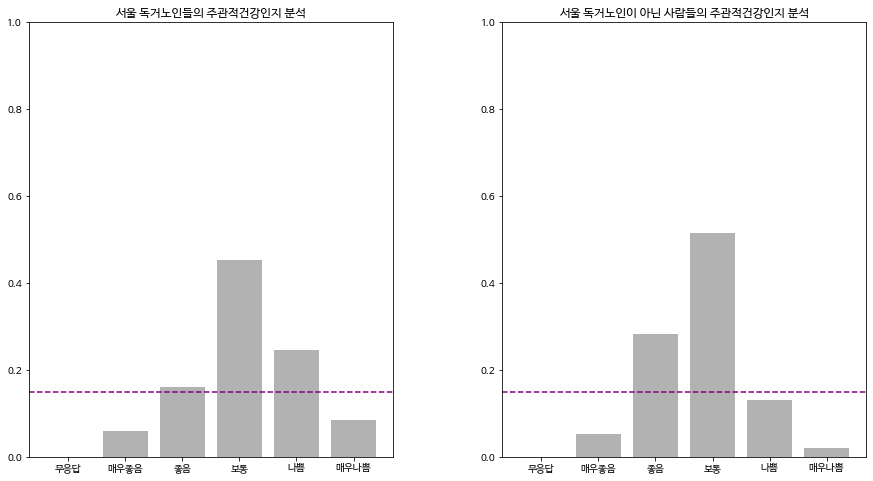

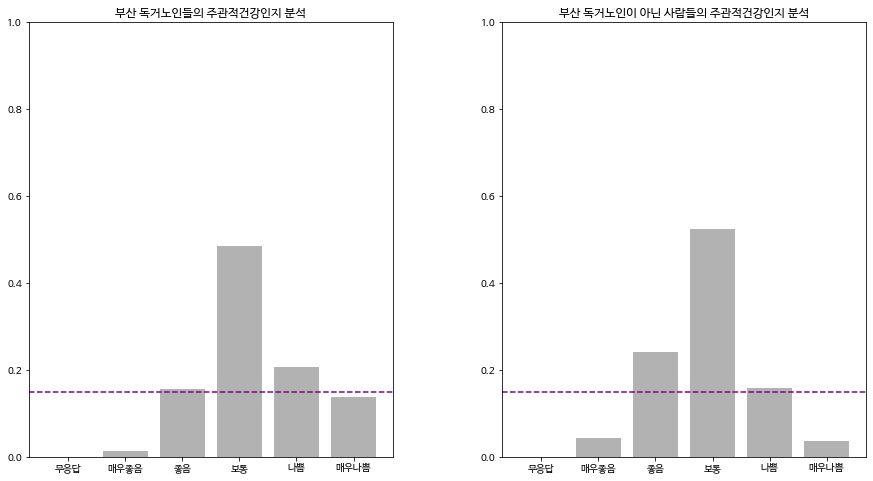

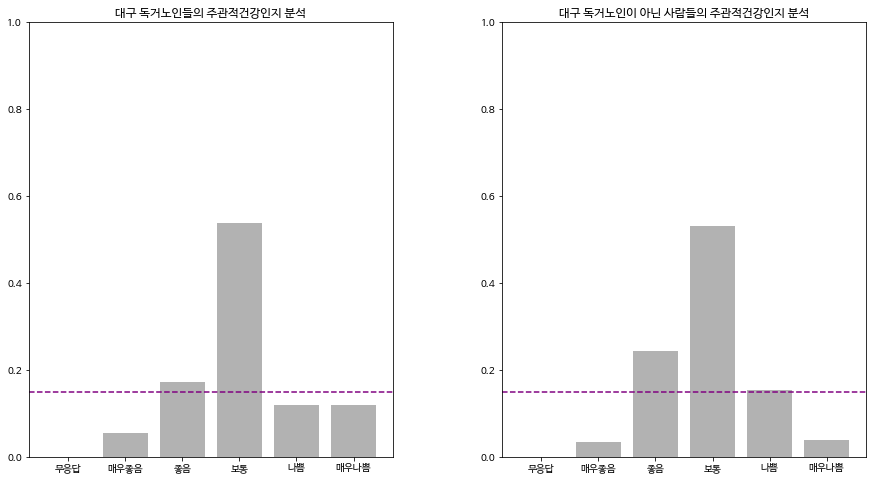

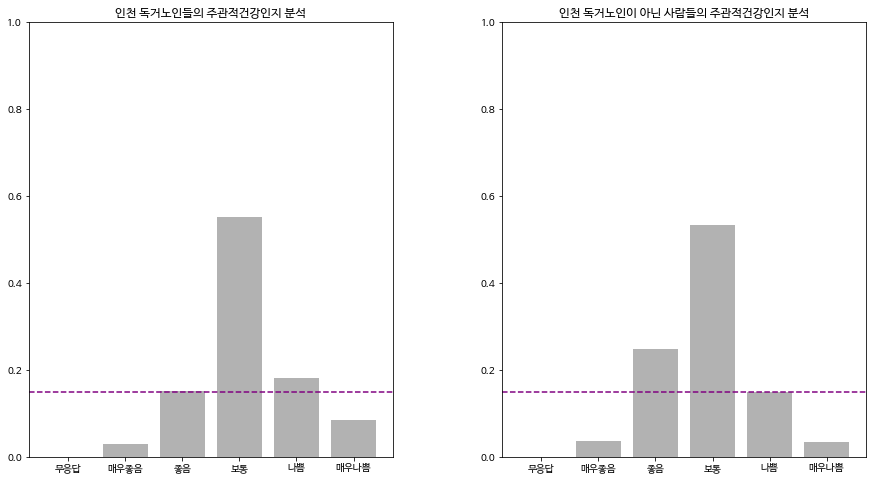

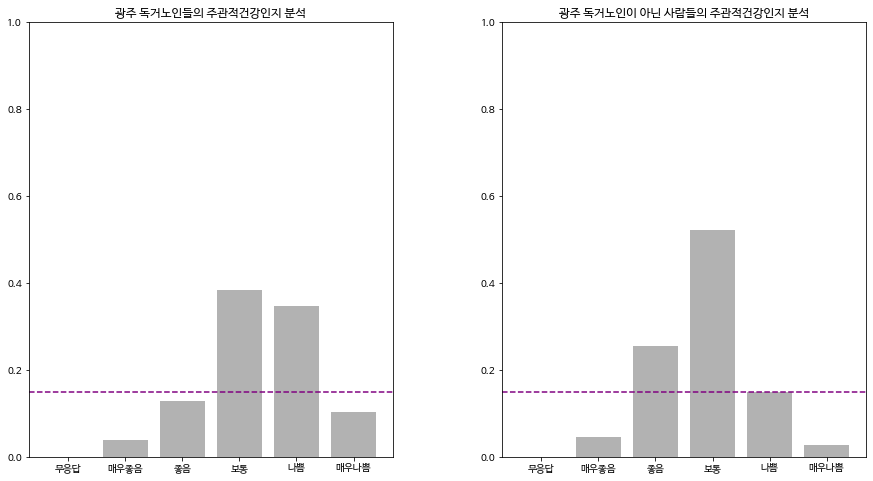

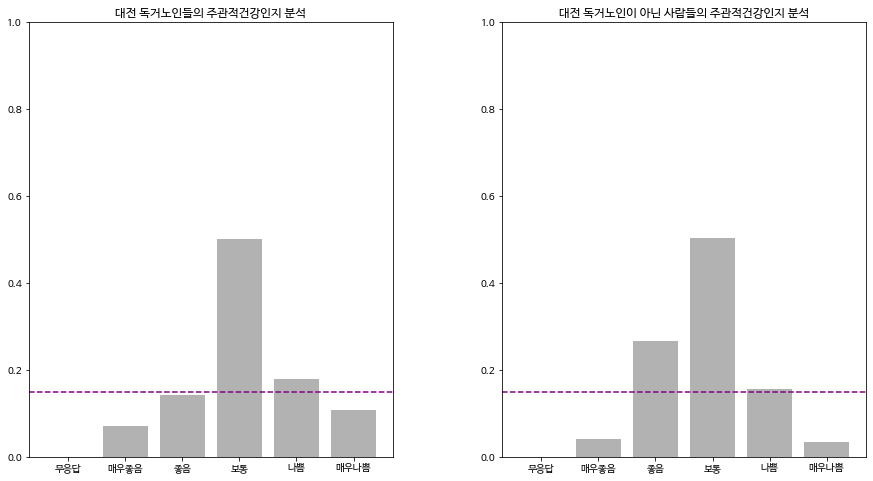

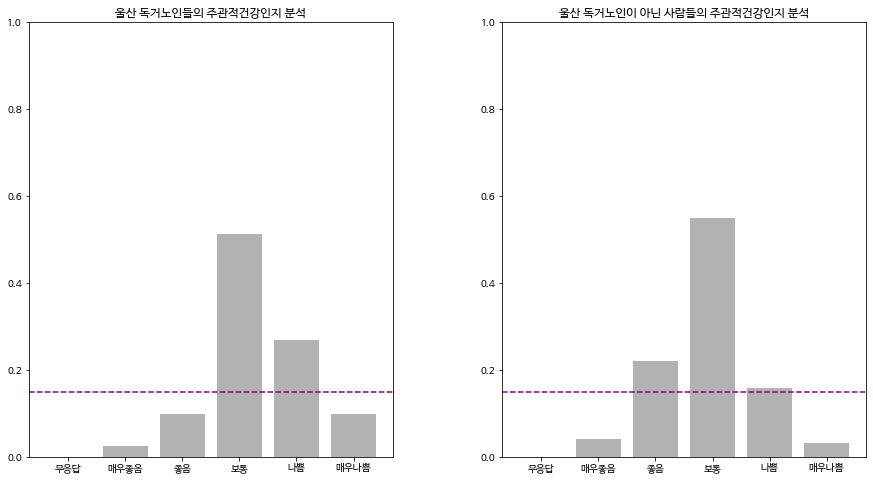

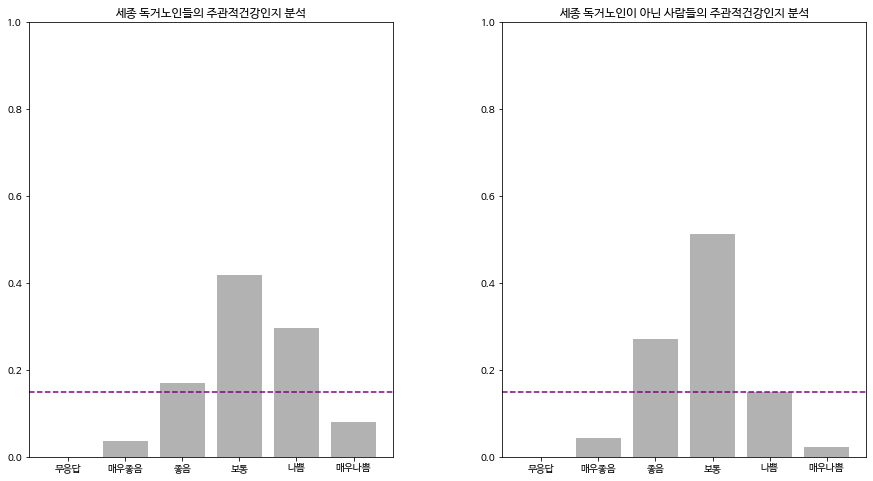

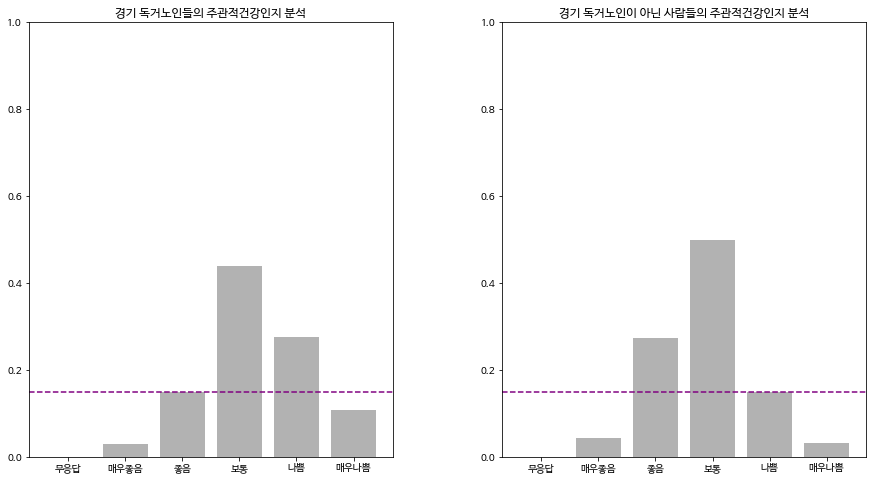

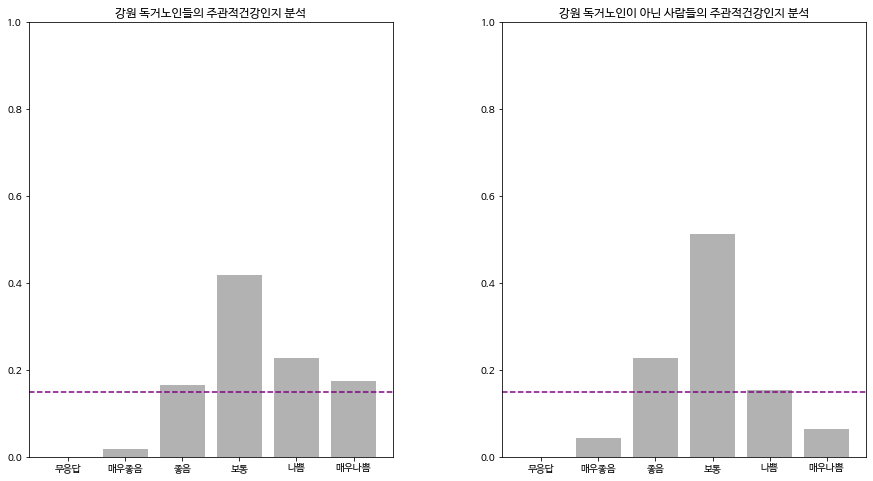

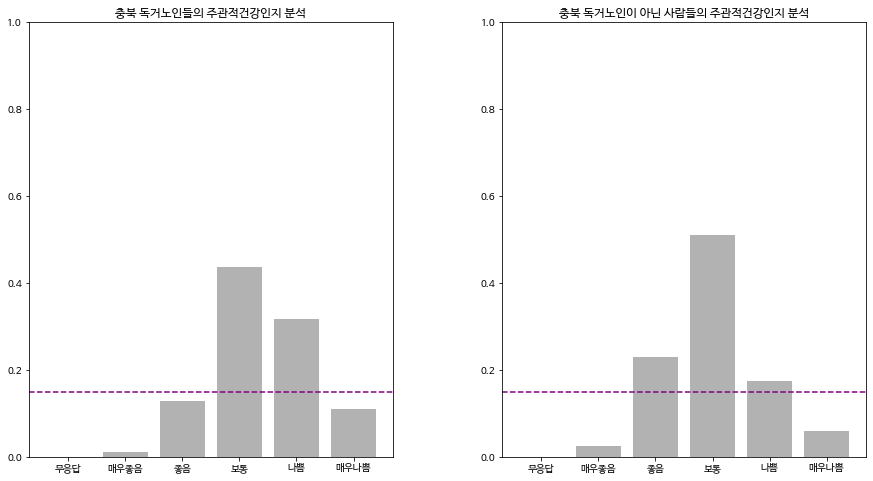

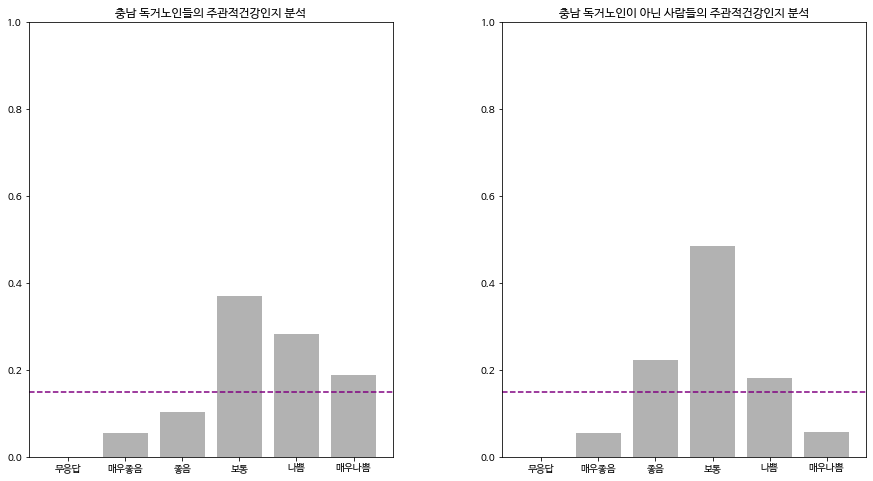

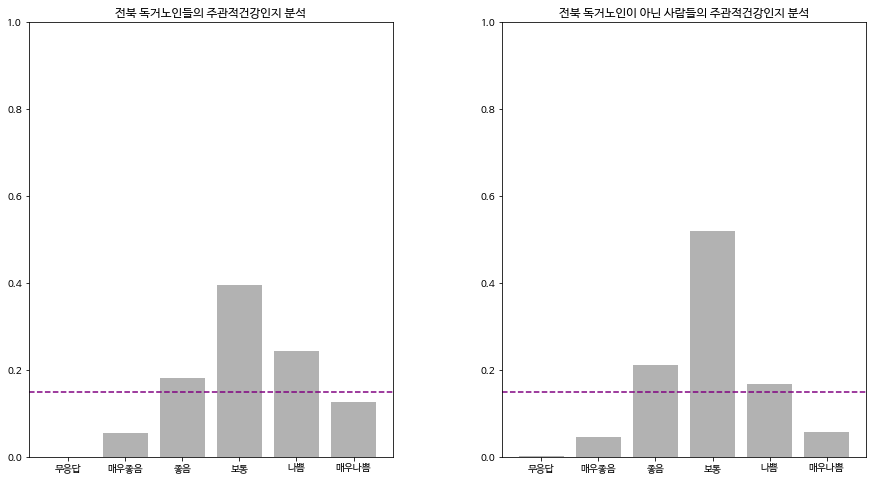

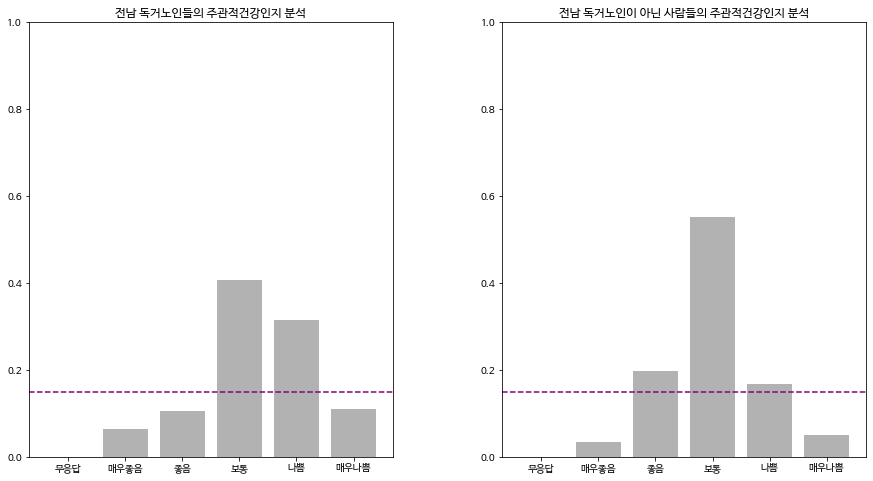

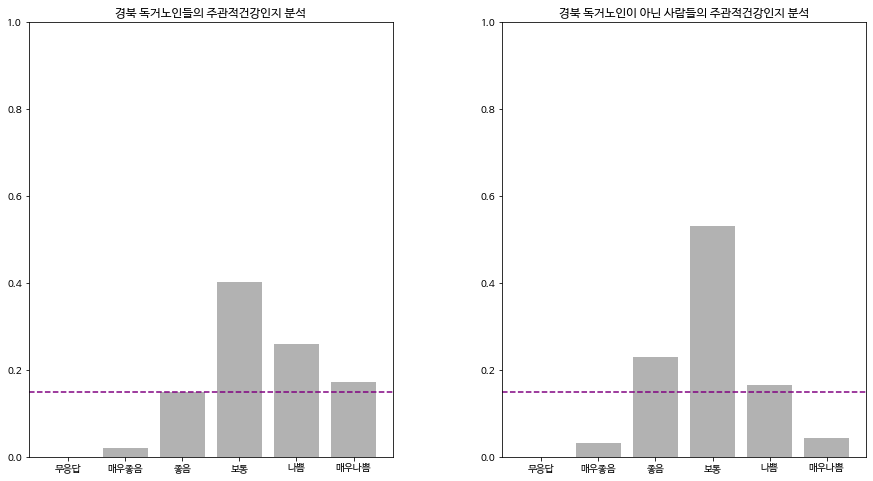

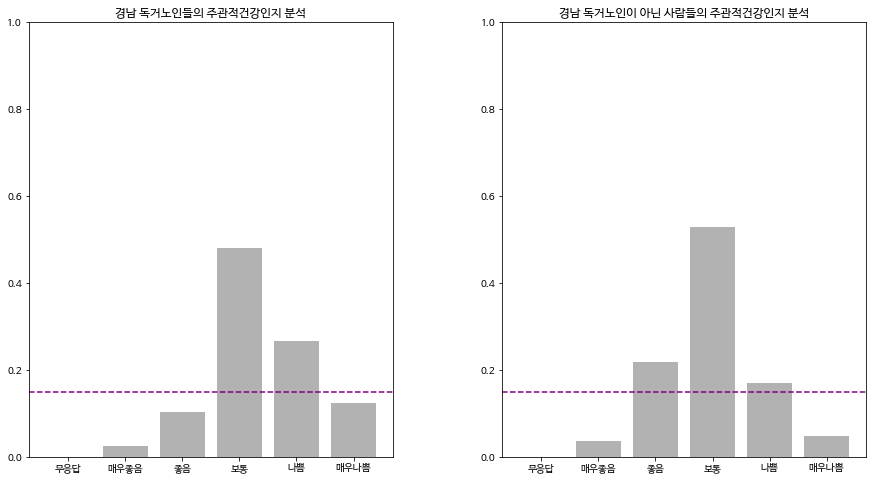

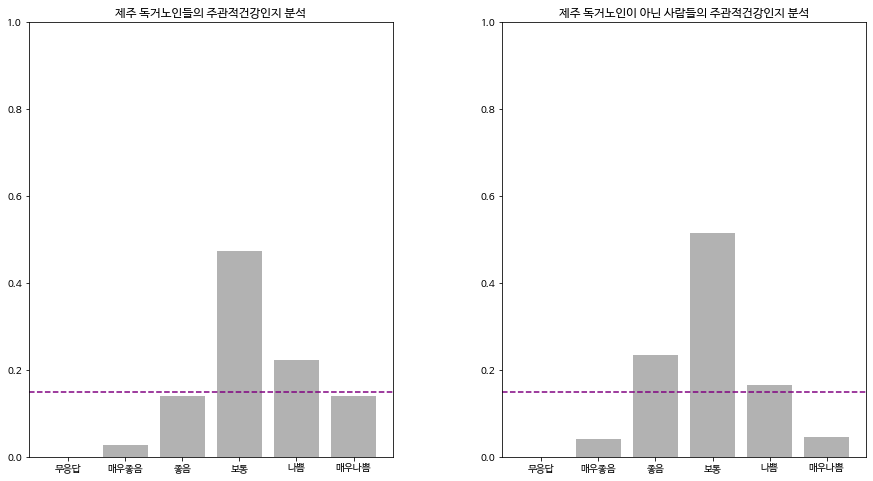

In [ ]:
for i in range(17):
  old_grand_relation_knowh(i)

  #자신의 건강이 좋다고 생각하는편은 아님

## 독거노인과 질병분석

In [ ]:
def old_grand_relation_d(idx):
  grid = gridspec.GridSpec(1,1)#그래프를 그릴 도화지 개수
  plt.figure(figsize=(15,8))
  plt.subplots_adjust(wspace= 0.3, hspace=0.3) #그래프 간의 거리 조절

  ax0 = plt.subplot(grid[0])
  
  region_old_g = region_alone_old_grand[idx]
  region_not_old_g = region_not_alone_old_grand[idx]

  region_old_g = region_old_g[disease]
  region_old_g = region_old_g[region_old_g == 1]
  region_old_g = region_old_g.fillna(0)
  region_old_g = region_old_g.mean()

  region_not_old_g = region_not_old_g[disease]
  region_not_old_g = region_not_old_g[region_not_old_g == 1]
  region_not_old_g = region_not_old_g.fillna(0)
  region_not_old_g = region_not_old_g.mean()

  alone_old_grand_d = alone_old_grand[disease]
  alone_old_grand_d = alone_old_grand_d[alone_old_grand_d == 1]
  alone_old_grand_d = alone_old_grand_d.fillna(0)
  alone_old_grand_d = alone_old_grand_d.mean()

  ax0.plot(region_old_g, label='지역별 독거노인')
  ax0.plot(region_not_old_g, label='독거노인이아닌 노인')
  ax0.plot(alone_old_grand_d, label='전체 독거노인')
  ax0.legend()
  ax0.set_title(f"{region_alone_old_grand_name[idx]} 독거노인들의 질병 분석")
  ax0.axhline(0.1,0,len(disease), color='red', linestyle = '--')
  ax0.axhline(0.2,0,len(disease), color='skyblue', linestyle = '--')
  ax0.axhline(0.3,0,len(disease), color='blue', linestyle = '--')
  ax0.axhline(0.4,0,len(disease), color='green', linestyle = '--')
  ax0.set_ylim([0,0.8])
  _=ax0.set_xticklabels(disease, rotation=90)


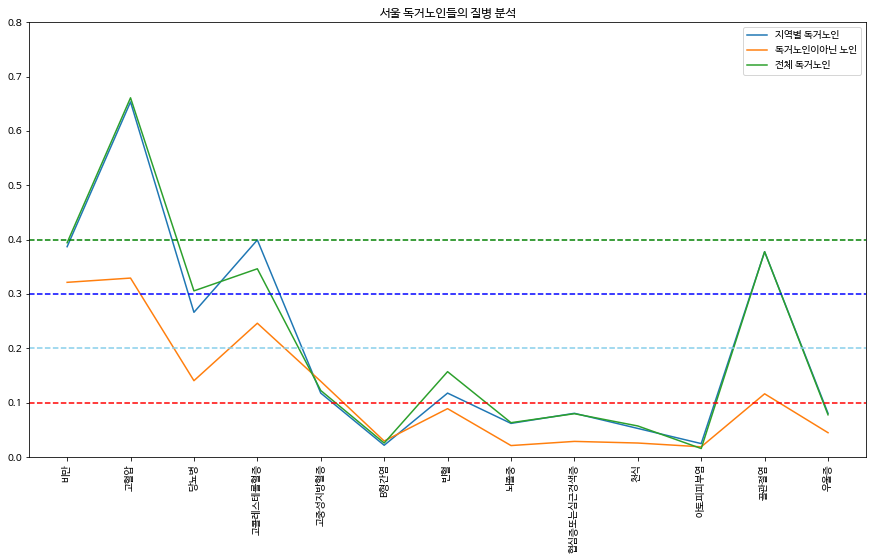

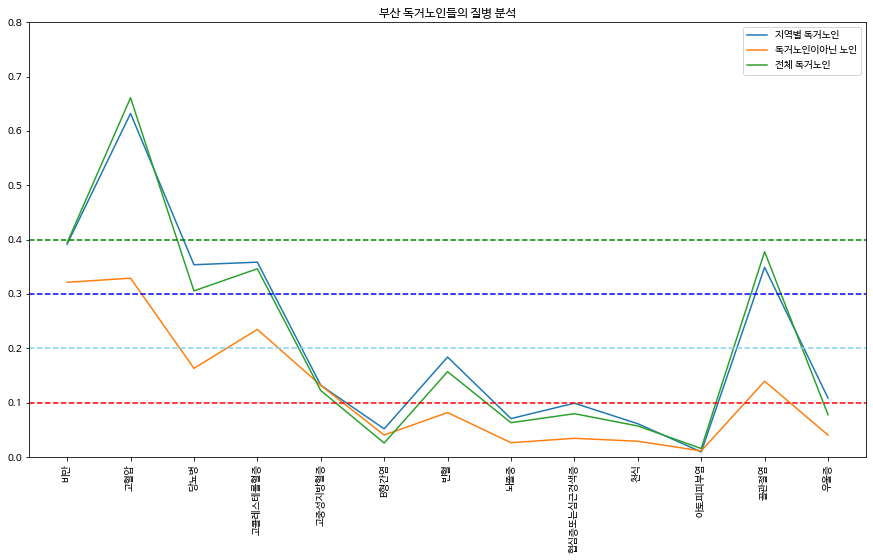

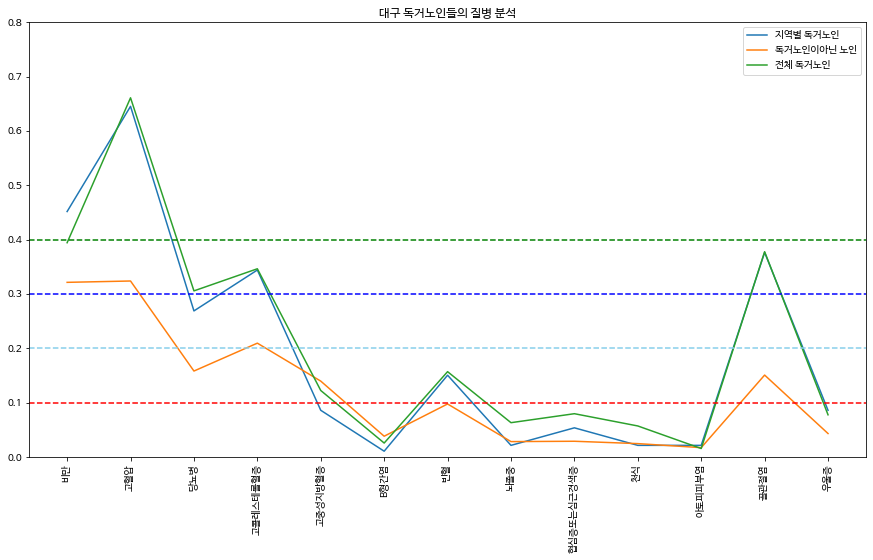

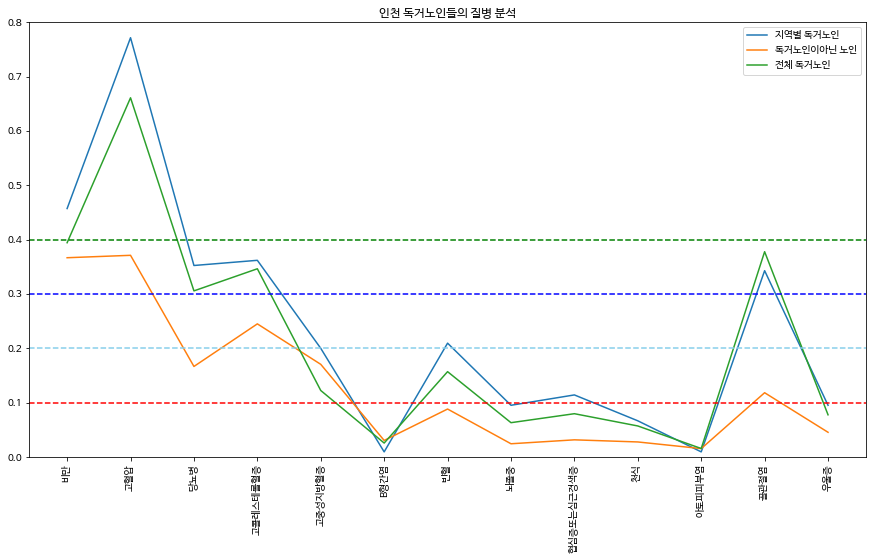

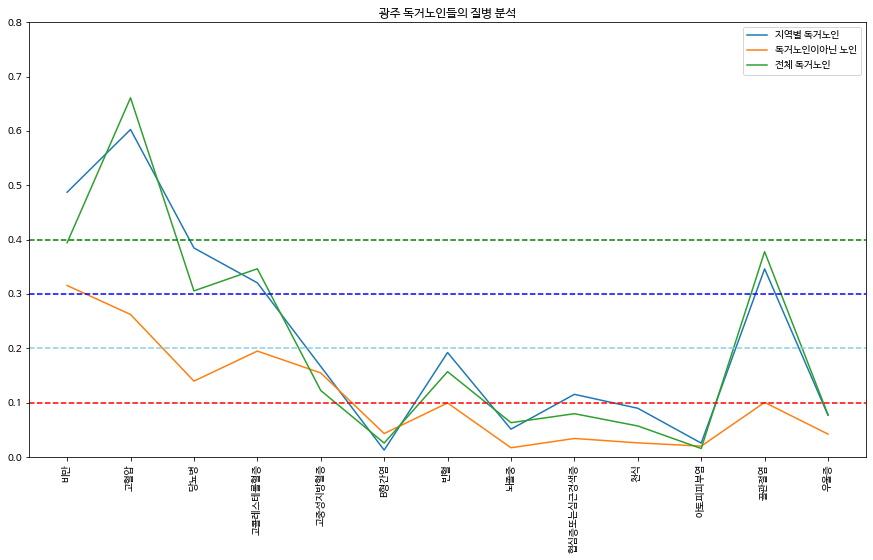

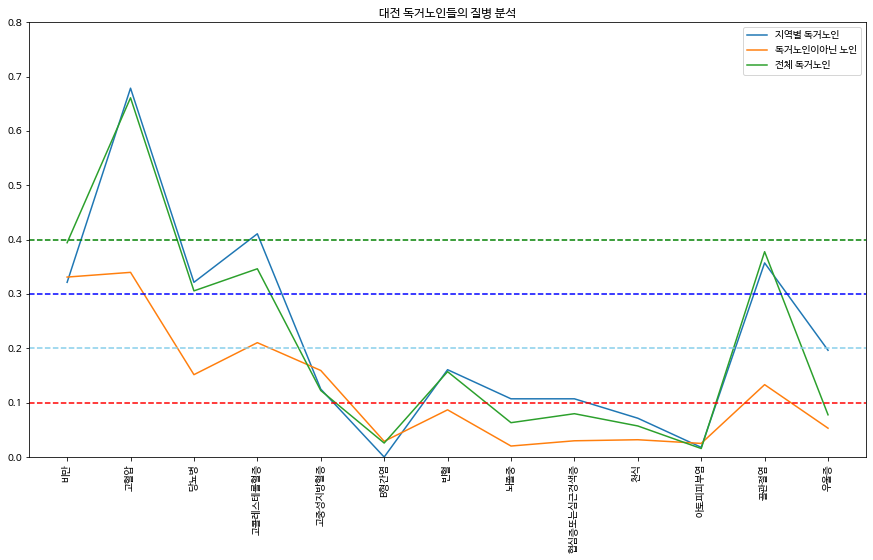

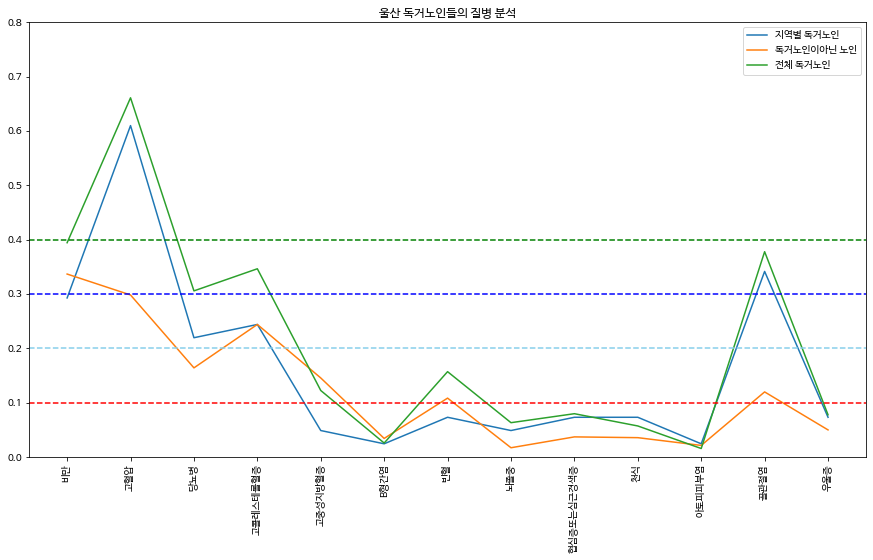

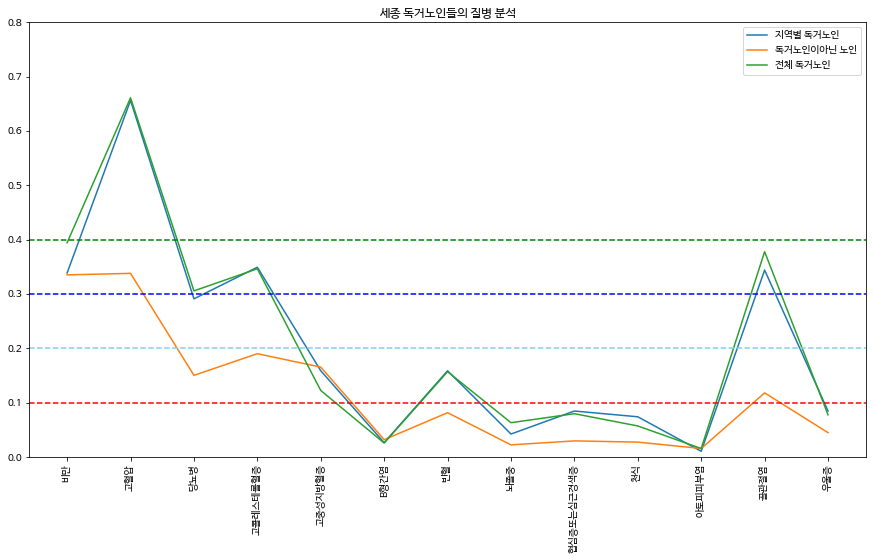

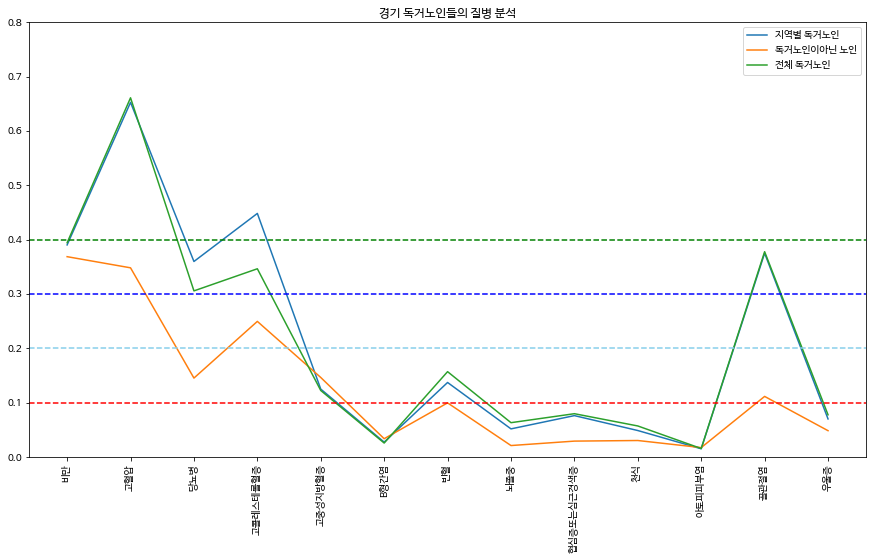

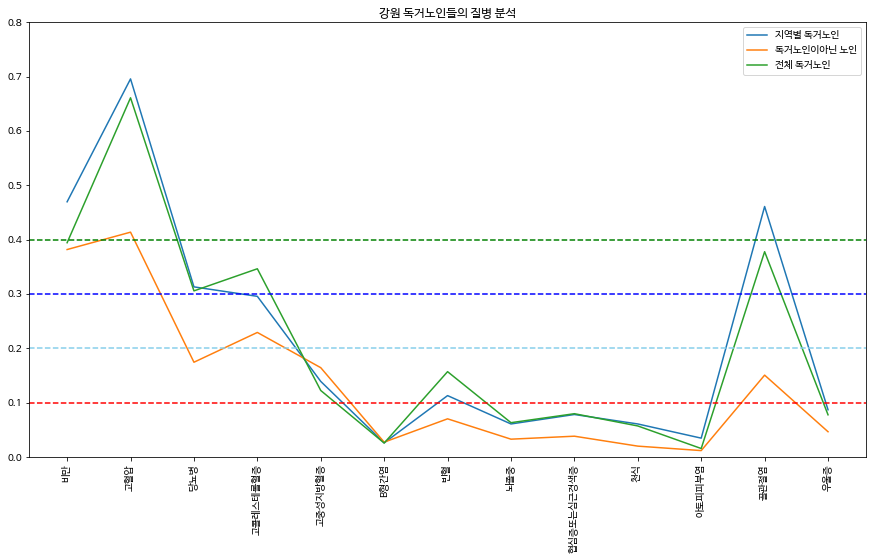

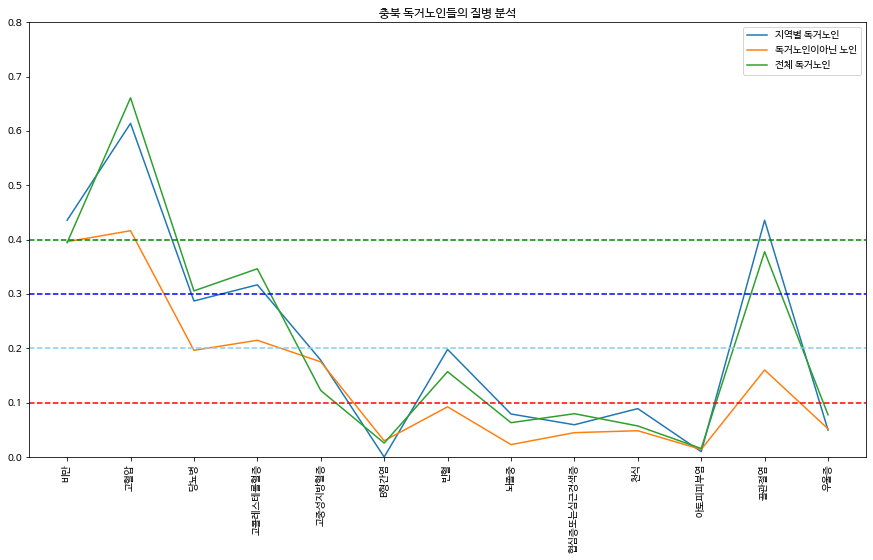

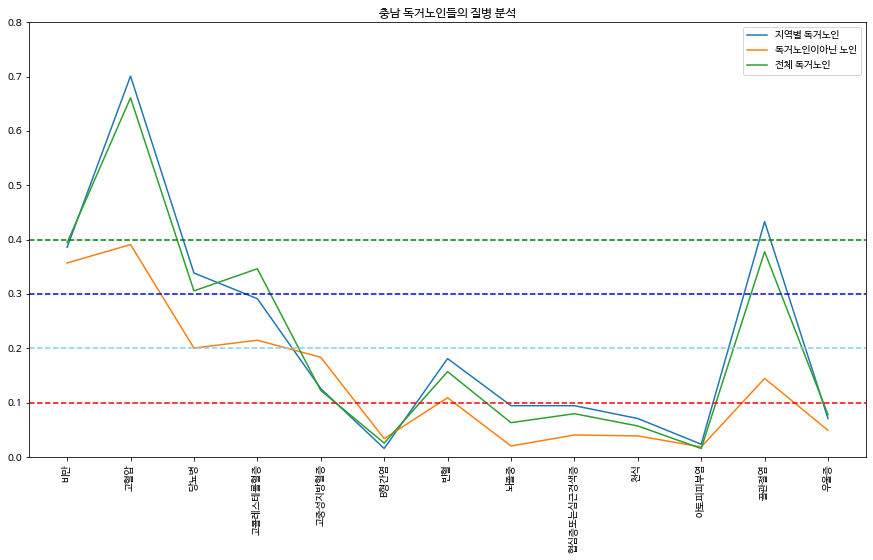

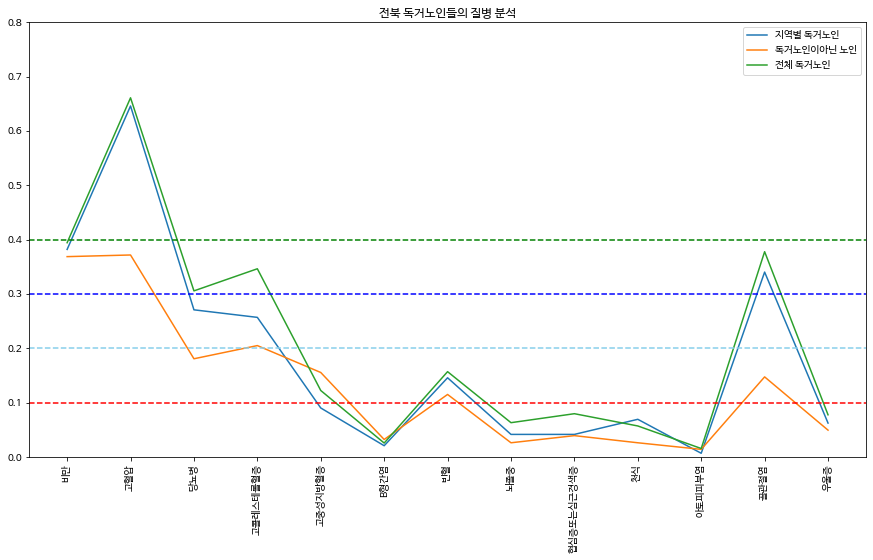

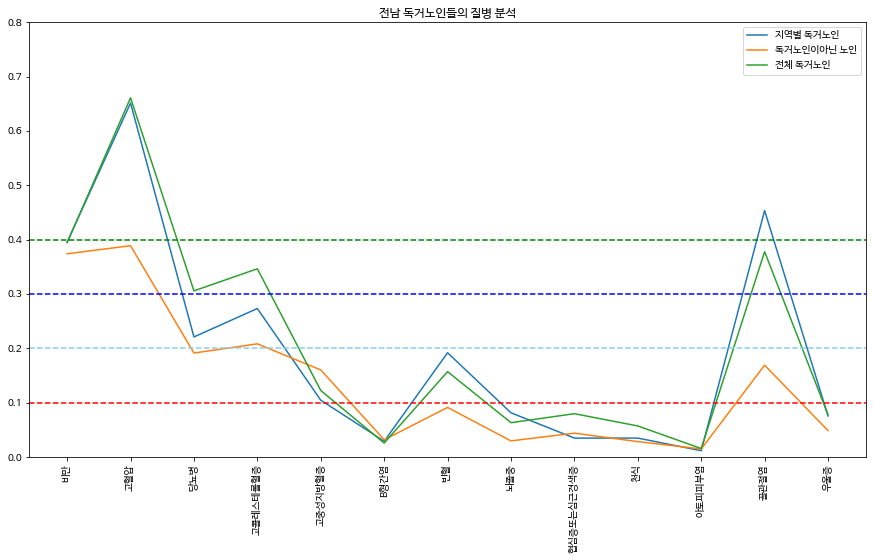

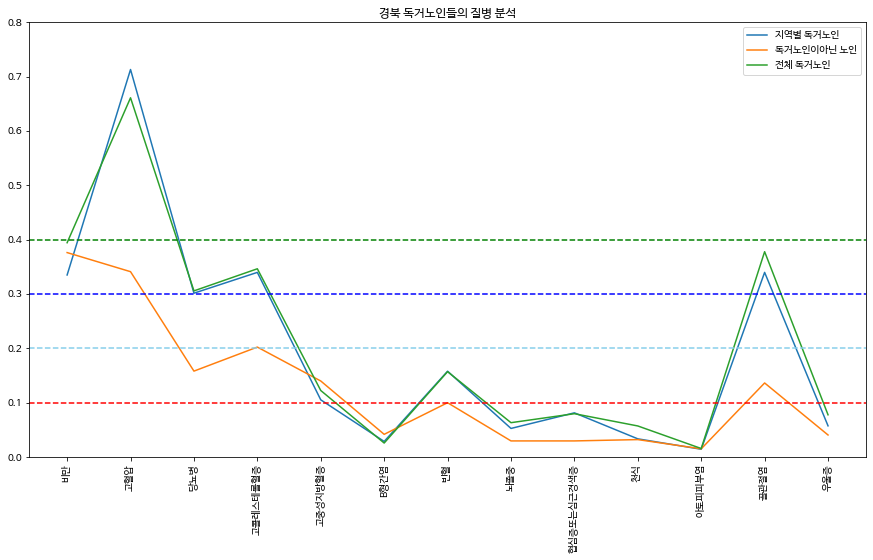

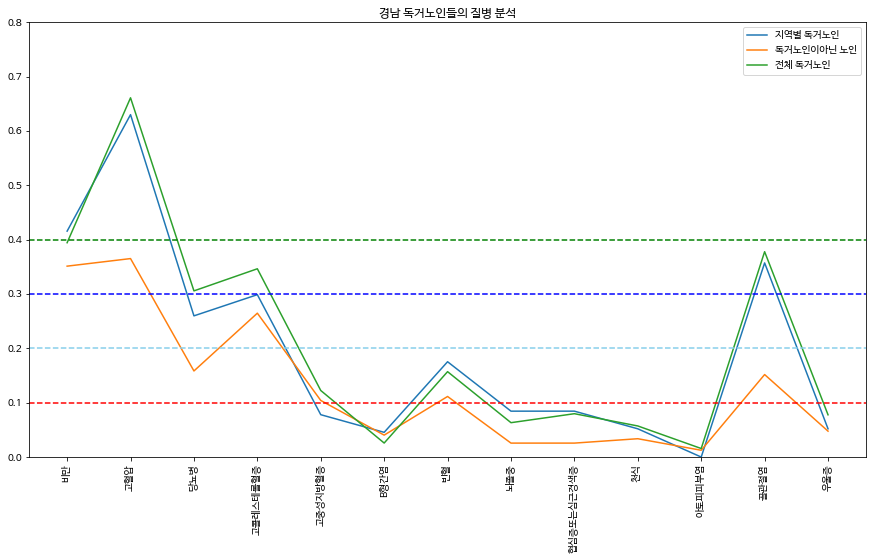

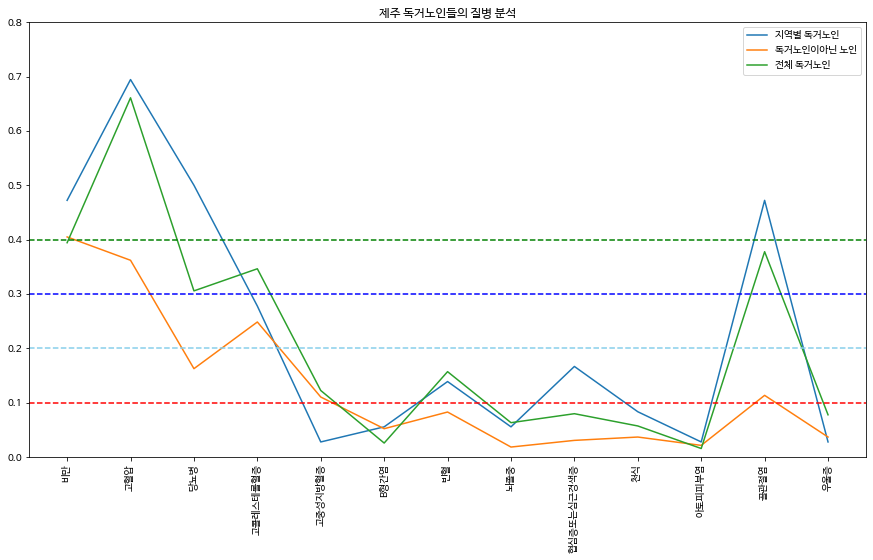

In [ ]:
for i in range(17):
  old_grand_relation_d(i)

#식단관리가 필요한거같음

# 예상과달리 우울증은없음
#고관절염이 높인이유 : 병원을못가서? 금전이없어서
# 혼자살다보니 건강을 신경써줄 사람이없음 + 돈도없음
# 건강관리사가 필요할거같음 + 식단관리
# 식단관리랑 병원비지원만 되면 괜찮지않을까?

#독거노인들도 사람들 만나는시스템이 우리나라에 사람들만나는 시스템이 잘되어있나보다 있나보다 교류의장같은 # 검색?

# 스트레스가없잖아 그만큼 먹고싶은것만먹는다? 식단관리가x  병원을잘 못가서 치료를 잘 못받나? 약을 못먹어서


## 수입과 질병 상관분석

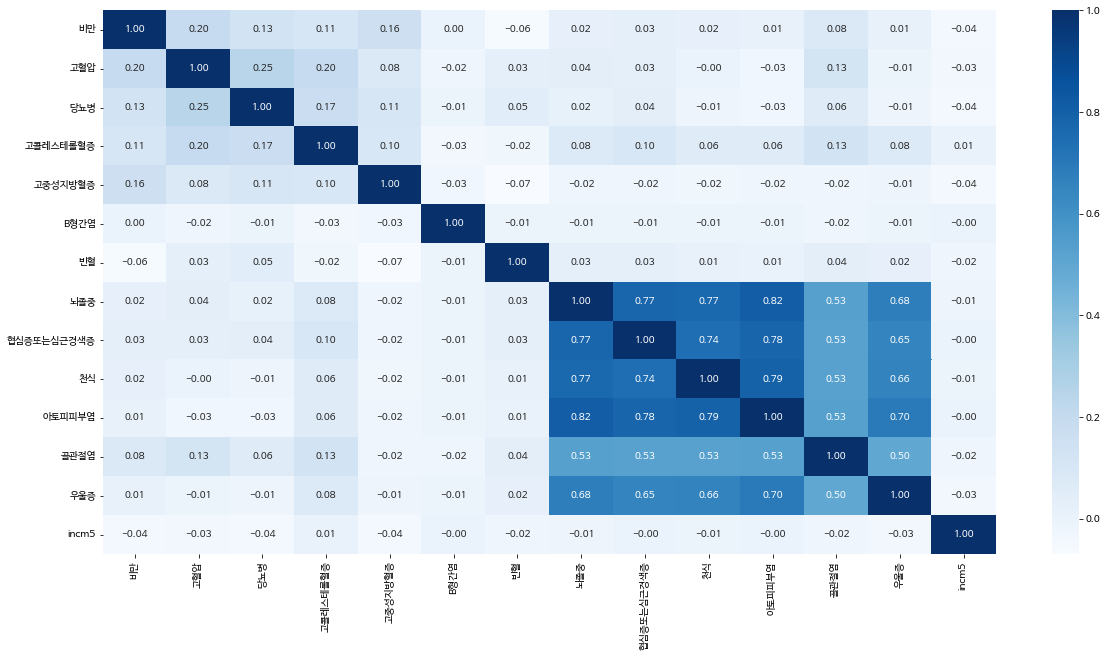

In [ ]:
df = pd.concat([health[disease],health['incm5']], axis=1)
df = df.corr(method='pearson')

plt.figure(figsize=(20,10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')

In [ ]:
health

ID       ID_fam    year  region  town_t  sex  age  incm  \
0      b'A308780901'  b'A3087809'  2010.0     1.0     1.0  1.0   74   3.0   
1      b'A309099802'  b'A3090998'  2010.0     1.0     1.0  2.0   71   2.0   
2      b'A309460901'  b'A3094609'  2010.0     1.0     1.0  2.0   61   3.0   
3      b'A309460902'  b'A3094609'  2010.0     1.0     1.0  1.0   32   2.0   
4      b'A310439801'  b'A3104398'  2010.0     1.0     1.0  2.0   63   4.0   
...              ...          ...     ...     ...     ...  ...  ...   ...   
35624  b'R904322404'  b'R9043224'  2021.0     8.0     2.0  1.0   53   3.0   
35625  b'R904332601'  b'R9043326'  2021.0     8.0     2.0  1.0   50   2.0   
35626  b'R904346201'  b'R9043462'  2021.0     8.0     2.0  2.0   54   4.0   
35627  b'R904353001'  b'R9043530'  2021.0     8.0     2.0  1.0   45   3.0   
35628  b'R904353002'  b'R9043530'  2021.0     8.0     2.0  2.0   43   3.0   

       ho_incm  incm5  ...  고중성지방혈증  B형간염   빈혈  뇌졸중  협심증또는심근경색증   천식  아토피피부염  \
0          2.0    4.0  ...      1.0   0.0  0.0 -1.0        -1.0  0.0    -1.0   
1          1.0    2.0  ...      0.0   0.0  0.0 -1.0        -1.0 -1.0    -1.0   
2          2.0    4.0  ...      0.0   0.0  0.0 -1.0        -1.0  1.0    -1.0   
3          2.0    2.0  ...      1.0   0.0  0.0 -1.0        -1.0 -1.0    -1.0   
4          4.0    5.0  ...      0.0   0.0  0.0 -1.0        -1.0 -1.0    -1.0   
...        ...    ...  ...      ...   ...  ...  ...         ...  ...     ...   
35624      3.0    3.0  ...      0.0   0.0  0.0  0.0         0.0  0.0     0.0   
35625      2.0    2.0  ...      1.0   0.0  0.0  0.0         0.0  0.0     0.0   
35626      4.0    4.0  ...      0.0   0.0  0.0  0.0         0.0  0.0     0.0   
35627      3.0    3.0  ...      1.0   0.0  0.0  0.0         0.0  0.0     0.0   
35628      3.0    3.0  ...      0.0   0.0  0.0  0.0         0.0  0.0     0.0   

       골관절염  우울증  총질병수  
0      -1.0 -1.0     3  
1      -1.0 -1.0     2  
2       1.0 -1.0     5  
3      -1.0  1.0     4  
4       1.0 -1.0     3  
...     ...  ...   ...  
35624   0.0  0.0     2  
35625   0.0  0.0     1  
35626   0.0  0.0     0  
35627   0.0  0.0     3  
35628   0.0  0.0     0  

[35629 rows x 123 columns]

In [ ]:
# df = pd.concat([health[disease],health['incm5']], axis=1)
# df = df.corr(method='pearson')

# plt.figure(figsize=(20,10))
# sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')

## 수입과 영양소 상관분석

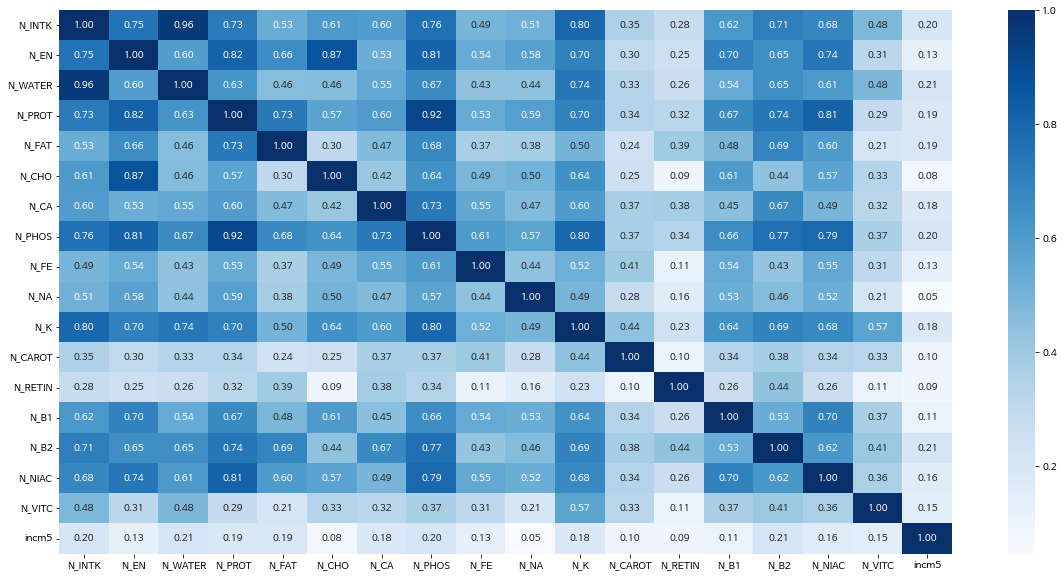

In [ ]:
df = pd.concat([alone_old_grand[nutritionF],alone_old_grand['incm5']], axis=1)
df = df.corr(method='pearson')

plt.figure(figsize=(20,10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')

In [ ]:
# df = pd.concat([health[nutritionF],health['incm5']], axis=1)
# df = df.corr(method='pearson')

# plt.figure(figsize=(20,10))
# sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')

## 영양소와 질병 상관분석

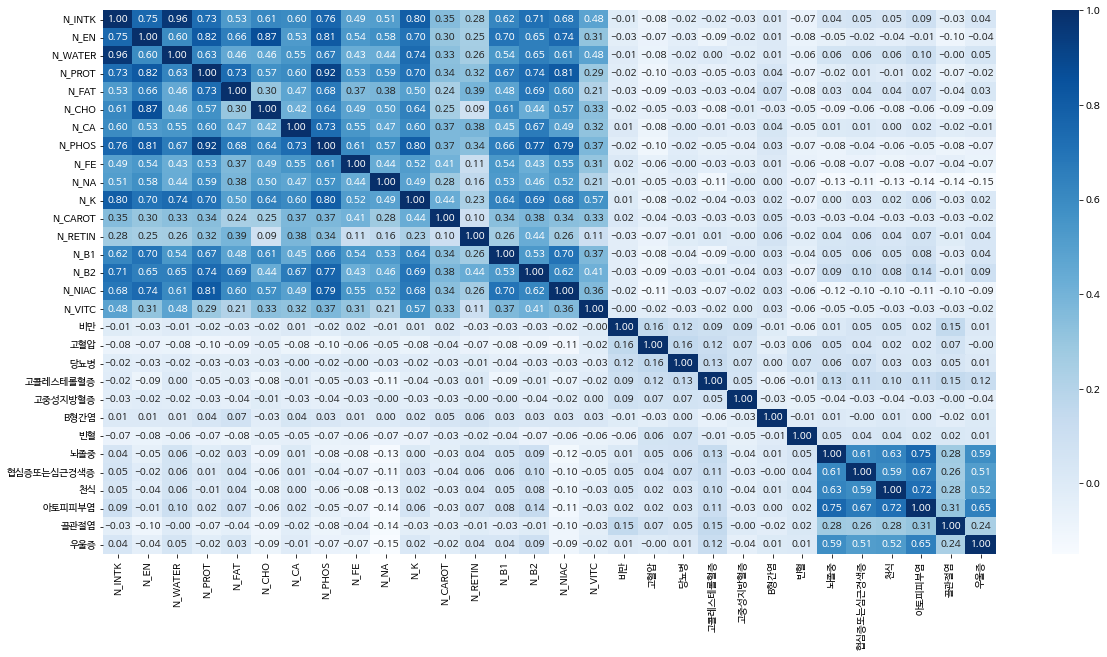

In [ ]:
df = pd.concat([alone_old_grand[nutritionF],alone_old_grand[disease]], axis=1)
df = df.corr(method='pearson')

plt.figure(figsize=(20,10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')

##질병과 흡연 음주 상관관계

In [ ]:
new_alone = alone_old_grand[alone_old_grand['총질병수']>0]

In [ ]:
new_alone

ID       ID_fam    year  region  town_t  sex  age  incm  \
33     b'A326339801'  b'A3263398'  2010.0     1.0     1.0  2.0   74   3.0   
56     b'A338719801'  b'A3387198'  2010.0     1.0     1.0  2.0   75   2.0   
75     b'B309840901'  b'B3098409'  2010.0     2.0     1.0  2.0   65   2.0   
76     b'B310600901'  b'B3106009'  2010.0     2.0     1.0  2.0   79   1.0   
80     b'B311840901'  b'B3118409'  2010.0     2.0     1.0  2.0   75   3.0   
...              ...          ...     ...     ...     ...  ...  ...   ...   
35560  b'R901174501'  b'R9011745'  2021.0     8.0     2.0  2.0   80   3.0   
35564  b'R901196601'  b'R9011966'  2021.0     8.0     2.0  2.0   80   1.0   
35571  b'R901558701'  b'R9015587'  2021.0     8.0     2.0  1.0   74   3.0   
35605  b'R903341101'  b'R9033411'  2021.0     8.0     2.0  1.0   71   1.0   
35609  b'R903354701'  b'R9033547'  2021.0     8.0     2.0  1.0   74   1.0   

       ho_incm  incm5  ...  고중성지방혈증  B형간염   빈혈  뇌졸중  협심증또는심근경색증   천식  아토피피부염  \
33         1.0    3.0  ...      0.0   0.0  0.0 -1.0         1.0 -1.0    -1.0   
56         1.0    3.0  ...      0.0   0.0  0.0 -1.0        -1.0 -1.0    -1.0   
75         1.0    2.0  ...      1.0   0.0  0.0 -1.0        -1.0 -1.0    -1.0   
76         1.0    1.0  ...      0.0   0.0  0.0 -1.0        -1.0  1.0    -1.0   
80         2.0    3.0  ...      0.0   0.0  0.0 -1.0        -1.0 -1.0    -1.0   
...        ...    ...  ...      ...   ...  ...  ...         ...  ...     ...   
35560      2.0    4.0  ...      0.0   0.0  1.0  0.0         0.0  0.0     0.0   
35564      1.0    1.0  ...      0.0   0.0  0.0  0.0         0.0  0.0     0.0   
35571      2.0    4.0  ...      0.0   1.0  0.0  0.0         0.0  0.0     0.0   
35605      1.0    1.0  ...      0.0   0.0  0.0  0.0         0.0  1.0     0.0   
35609      1.0    1.0  ...      1.0   0.0  0.0  0.0         0.0  0.0     0.0   

       골관절염  우울증  총질병수  
33      1.0 -1.0     5  
56     -1.0 -1.0     2  
75     -1.0 -1.0     2  
76     -1.0 -1.0     3  
80      1.0 -1.0     4  
...     ...  ...   ...  
35560   1.0  0.0     5  
35564   0.0  0.0     2  
35571   0.0  0.0     1  
35605   0.0  0.0     3  
35609   0.0  0.0     1  

[2304 rows x 123 columns]

In [ ]:
drinks = ['BD1_11', 'BD2_1', 'BD2_31', 'dr_month', ]
smoke = ['BS3_1']

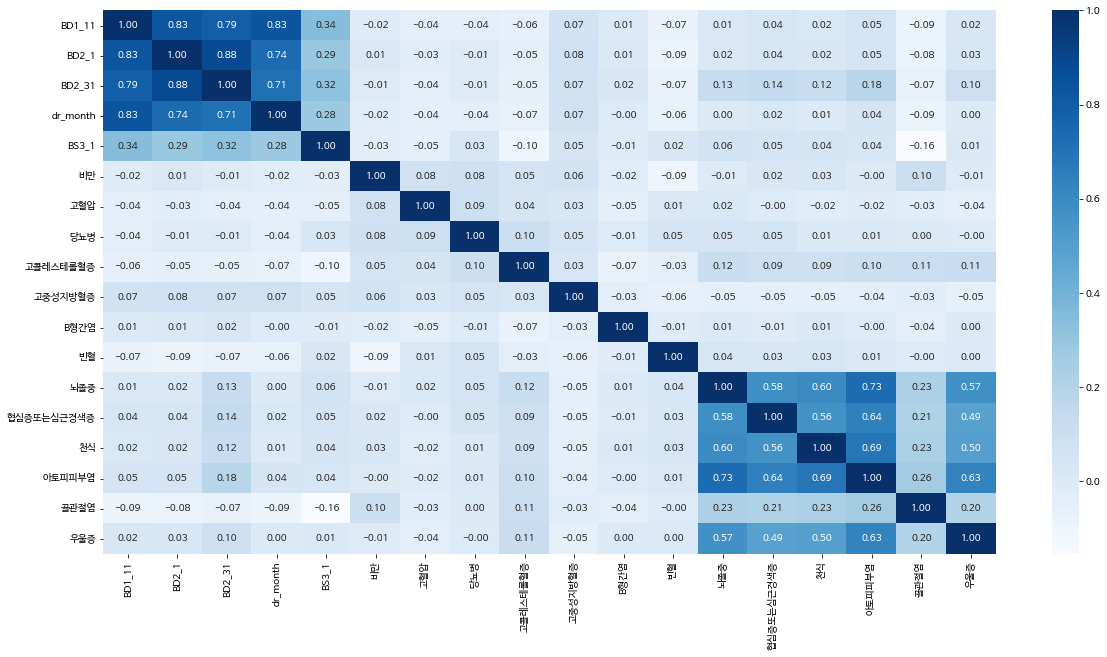

In [ ]:
df = pd.concat([new_alone[drinks],new_alone[smoke],new_alone[disease]], axis=1)
df

df = df.corr(method='pearson')

plt.figure(figsize=(20,10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')

#소득분위랑 총질병수

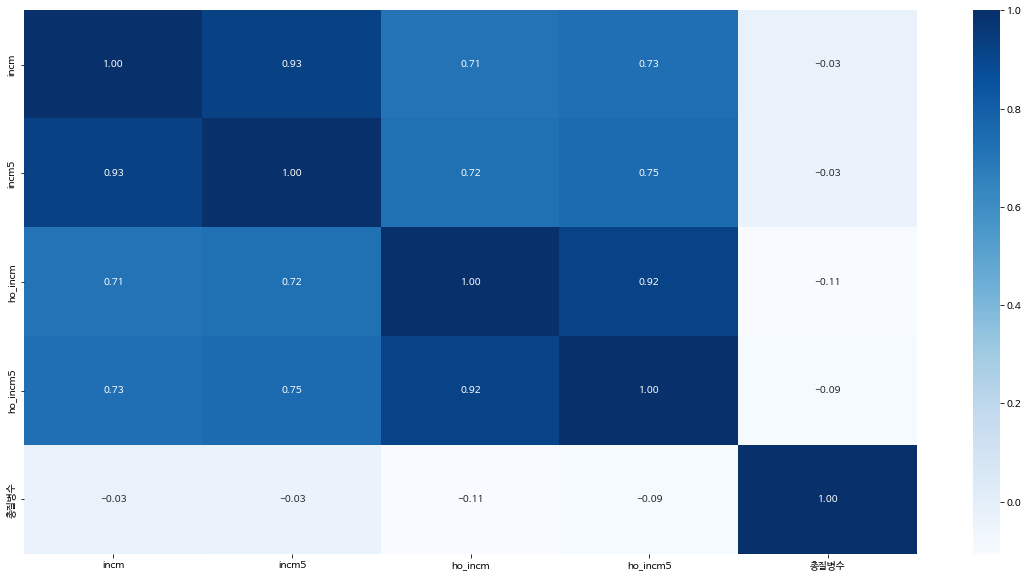

In [ ]:
df = pd.concat([alone_old_grand[['incm','incm5','ho_incm','ho_incm5']],alone_old_grand['총질병수']], axis=1)
df

df = df.corr(method='pearson')

plt.figure(figsize=(20,10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')

## 시스템만들기

In [ ]:
class Health_check:
  def __init__(self,input_df):
    self.input_df = input_df
    self.live_region = ''
  
  def check_system(self,live_region):
    self.live_region = live_region
    self.input_df_alone = self.input_df.query("cfam==1 and fam_rela==1 and age>=65") #65세이상 독거노인
    grandyear_all_disease_mean = self.input_df_alone[disease].mean() #전체 65세이상 독거노인 질병 평균
    region_dataframe = self.dataframe_region(self.input_df_alone, self.live_region)    
    region_grand_disease_mean = region_dataframe[disease].mean() #지역별 독거노인 질병 평균
    check_disease = region_grand_disease_mean - grandyear_all_disease_mean
    check_check_disease = check_disease[check_disease<0]
    check_check_disease_list = check_check_disease.index.tolist()
    
    print(f'{live_region}지역이 지역평균보다 많이걸린 질병은{check_check_disease_list} 입니다')

  
  def dataframe_region(self,input_df_alone,live_region):
    if(self.live_region == '서울'):
      return self.input_df_alone.query("region==1")
    if(self.live_region == '부산'):
      return self.input_df_alone.query("region==2")
    if(self.live_region == '대구'):
      return self.input_df_alone.query("region==3")
    if(self.live_region == '인천'):
      return self.input_df_alone.query("region==4")
    if(self.live_region == '광주'):
      return self.input_df_alone.query("region==5")
    if(self.live_region == '대전'):
      return self.input_df_alone.query("region==6")
    if(self.live_region == '울산'):
      return self.input_df_alone.query("region==7")
    if(self.live_region == '세종'):
      return self.input_df_alone.query("region==8")
    if(self.live_region == '경기'):
      return self.input_df_alone.query("region==9")
    if(self.live_region == '강원'):
      return self.input_df_alone.query("region==10")
    if(self.live_region == '서울'):
      return self.input_df_alone.query("region==11")
    if(self.live_region == '전북'):
      return self.input_df_alone.query("region==12")
    if(self.live_region == '전남'):
      return self.input_df_alone.query("region==13")
    if(self.live_region == '경북'):
      return self.input_df_alone.query("region==14")
    if(self.live_region == '경남'):
      return self.input_df_alone.query("region==15")
    if(self.live_region == '제주'):
      return self.input_df_alone.query("region==16")

In [ ]:
health_check = Health_check(health)

health_check.check_system('서울')
health_check.check_system('대구')
health_check.check_system('인천')

서울지역이 지역평균보다 많이걸린 질병은['비만', '고혈압', '당뇨병', '고중성지방혈증', 'B형간염', '빈혈'] 입니다
대구지역이 지역평균보다 많이걸린 질병은['고혈압', '당뇨병', '고콜레스테롤혈증', '고중성지방혈증', 'B형간염', '빈혈', '뇌졸중', '협심증또는심근경색증', '천식', '아토피피부염', '골관절염'] 입니다
인천지역이 지역평균보다 많이걸린 질병은['B형간염', '골관절염'] 입니다


##전체 상관분석

In [ ]:
health.columns.tolist()

['ID',
 'ID_fam',
 'year',
 'region',
 'town_t',
 'sex',
 'age',
 'incm',
 'ho_incm',
 'incm5',
 'ho_incm5',
 'edu',
 'occp',
 'cfam',
 'genertn',
 'allownc',
 'marri_1',
 'marri_2',
 'fam_rela',
 'tins',
 'D_1_1',
 'educ',
 'EC1_1',
 'EC_wht_23',
 'EC_wht_5',
 'EC_pedu_1',
 'EC_pedu_2',
 'BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'BP6_10',
 'BP7',
 'mh_stress',
 'BS3_1',
 'BE3_31',
 'BE5_1',
 'LW_mt',
 'LW_mt_a1',
 'LW_br',
 'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
 'HE_Unitr',
 'HE_Usg',
 'HE_Upro',
 'HE_Uglu',
 '

In [ ]:
health_info.iloc[10:30]

Unnamed: 0   variable    variable description  \
10          10   ho_incm5             소득 5분위수(가구)   
11          11        edu             교육수준 재분류 코드   
12          12       occp  직업재분류 및 실업/비경제활동 상태 코드   
13          13       cfam                    가구원수   
14          14    genertn               가구 세대구성코드   
15          15    allownc               기초생활수급 여부   
16          16    marri_1                    결혼여부   
17          17    marri_2                    결혼상태   
18          18   fam_rela                가구주와의 관계   
19          19       tins                  건강보험종류   
20          20      D_1_1                주관적 건강인지   
21          21       educ                교육수준: 학력   
22          22      EC1_1                 경제활동 상태   
23          23  EC_wht_23              주당 평균 근로시간   
24          24   EC_wht_5                  변형근로시간   
25          25  EC_pedu_1    (성인) 유년기환경: 아버지 교육수준   
26          26  EC_pedu_2    (성인) 유년기환경: 어머니 교육수준   
27          27     BD1_11       (만12세이상) 1년간 음주빈도   
28          28      BD2_1   (만12세이상) 한 번에 마시는 음주량   
29          29     BD2_31          (만12세이상) 폭음 빈도   

                                   option description        etc data type  \
10          1 : 하 | 2 : 중하 | 3 : 중 | 4 : 중상 | 5 : 상 |         []  category   
11            1 : 초졸이하 | 2 : 중졸 | 3 : 고졸 | 4 : 대졸이상 |         []  category   
12  1 : 관리자, 전문가 및 관련 종사자 | 2 : 사무종사자 | 3 : 서비스 및 ...         []  category   
13  1 : 1명 | 2 : 2명 | 3 : 3명 | 4 : 4명 | 5 : 5명 | 6...         []  category   
14  1 : 1세대 가구 - 1인가구 | 2 : 1세대 가구 - 부부 | 3 : 1세대 ...         []  category   
15  10 : 수급경험 있음(과거 또는 현재) | 20 : 수급경험 없음 | 99 : 모...         []  category   
16                    1 : 기혼 | 2 : 미혼 | 9 : 모름, 무응답 |         []  category   
17  1 : 유배우자, 동거 | 2 : 유배우자, 별거  | 3 : 사별  | 4 : 이...         []  category   
18  1 : 본인 | 2 : 배우자 | 3 : 자녀 | 4 : 자녀배우자 | 5 : 손자...         []  category   
19  10 : 국민건강보험(지역) | 20 : 국민건강보험(직장) | 30 : 의료급여 ...         []  category   
20  1 : 매우 좋음 | 2 : 좋음 | 3 : 보통 | 4 : 나쁨 | 5 : 매우 ...         []  category   
21  1 : 서당/한학 | 2 : 무학 | 3 : 초등학교 | 4 : 중학교  | 5 :...         []  category   
22  1 : 예(취업자) | 2 : 아니오(실업자, 비경제활동인구) | 8 : 비해당(만...         []  category   
23     888 : 비해당(최근 1년 동안 일을 하지 않음) | 999 : 모름, 무응답 |  ['□□□시간']   numeric   
24  1 : 주간 근무 | 2 : 저녁 근무(pm14:00~24:00) | 3 : 밤 근...         []  category   
25  1 : 무학 | 2 : 서당/한학 | 3 : 초등학교 졸업 이하 | 4 : 중학교 ...         []  category   
26  1 : 무학 | 2 : 서당/한학 | 3 : 초등학교 졸업 이하 | 4 : 중학교 ...         []  category   
27  1 : 최근 1년간 전혀 마시지 않았다 | 2 : 월1회미만 | 3 : 월1회정도 ...         []  category   
28  1 : 1-2잔 | 2 : 3-4잔 | 3 : 5-6잔  | 4 : 7-9잔 | 5...         []  category   
29  1 : 전혀 없음 | 2 : 월1회미만 | 3 : 월1회정도 | 4 : 주1회정도 ...         []  category   

    not applicable unknown   variable bins  selected  
10             NaN     NaN             NaN         1  
11             NaN     NaN             NaN         1  
12             NaN     NaN             NaN         1  
13             NaN       9             NaN         1  
14             NaN       9             NaN         1  
15             NaN      99             NaN         1  
16             NaN       9             NaN         1  
17            88.0  8,9,99             NaN         1  
18             NaN      99             NaN         1  
19             NaN      99             NaN         1  
20             NaN       9             NaN         1  
21            88.0      99             NaN         1  
22             8.0       9             NaN         1  
23           888.0     999  25.0:40.0:48.0         1  
24            88.0      99             NaN         1  
25            88.0      99             NaN         1  
26            88.0      99             NaN         1  
27             8.0       9             NaN         1  
28             8.0       9             NaN         1  
29             8.0       9             NaN         1

In [ ]:
all_mean_columns = ['town_t',
 'sex',
 'age',
 'incm',
 'ho_incm',
 'incm5',
 'ho_incm5',
 'edu',
 'occp',
 'cfam',
 'genertn',
 'allownc',
 'marri_1',
 'marri_2',
 'fam_rela',
 'tins',
 'D_1_1',
 'educ',
 'EC1_1',
 'EC_wht_23',
 'EC_wht_5',
 'EC_pedu_1',
 'EC_pedu_2',
 'BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'BP6_10',
 'BP7',
 'mh_stress',
 'BS3_1',
 'BE3_31',
 'BE5_1',
 'LW_mt',
 'LW_mt_a1',
 'LW_br',
 'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
 'HE_Unitr',
 'HE_Usg',
 'HE_Upro',
 'HE_Uglu',
 'HE_Uket',
 'HE_Ubil',
 'HE_Ubld',
 'HE_Uro',
 'HE_Ucrea',
 'N_INTK',
 'N_EN',
 'N_WATER',
 'N_PROT',
 'N_FAT',
 'N_CHO',
 'N_CA',
 'N_PHOS',
 'N_FE',
 'N_NA',
 'N_K',
 'N_CAROT',
 'N_RETIN',
 'N_B1',
 'N_B2',
 'N_NIAC',
 'N_VITC',
 '비만',
 '고혈압',
 '당뇨병',
 '고콜레스테롤혈증',
 '고중성지방혈증',
 'B형간염',
 '빈혈',
 '뇌졸중',
 '협심증또는심근경색증',
 '천식',
 '아토피피부염',
 '골관절염',
 '우울증',
 '총질병수']

# 클러스터링

## 영양소와 질병

In [ ]:
df = pd.concat([alone_old_grand[nutritionF],alone_old_grand[disease]], axis=1)
df = df.corr(method='pearson')

# # kmeans, dbscan 등은 거리기반 알고리즘이기 때문에 단위의 영향력을 제거하기 위해 표준화 진행
# # 여기서는 (x-mean)/std로 변환하여 평균0, 표준편차1로 scaling을 맞춰주는 standardScaler를 사용하였다.
# from sklearn.preprocessing import StandardScaler

# standard_scaler = StandardScaler()
# df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns) # scaled된 데이터

In [ ]:
import seaborn as sns

In [ ]:
# df = df.drop(nutritionF,axis=1)
# df = df.drop(disease,axis=0)

In [ ]:
df

N_INTK      N_EN   N_WATER    N_PROT     N_FAT     N_CHO  \
N_INTK      1.000000  0.750911  0.964971  0.726232  0.526747  0.611588   
N_EN        0.750911  1.000000  0.596770  0.815779  0.657006  0.868168   
N_WATER     0.964971  0.596770  1.000000  0.631648  0.456313  0.463120   
N_PROT      0.726232  0.815779  0.631648  1.000000  0.733489  0.573058   
N_FAT       0.526747  0.657006  0.456313  0.733489  1.000000  0.302831   
N_CHO       0.611588  0.868168  0.463120  0.573058  0.302831  1.000000   
N_CA        0.598985  0.525425  0.547469  0.599190  0.470498  0.417234   
N_PHOS      0.761169  0.812766  0.667482  0.919115  0.677665  0.639639   
N_FE        0.494394  0.535807  0.434095  0.534981  0.367603  0.486557   
N_NA        0.509051  0.575929  0.438452  0.587965  0.383089  0.503929   
N_K         0.796791  0.702205  0.739379  0.703769  0.497774  0.643216   
N_CAROT     0.351589  0.300835  0.332729  0.342374  0.242571  0.252849   
N_RETIN     0.276757  0.251642  0.258016  0.322230  0.393135  0.086796   
N_B1        0.618787  0.700999  0.539153  0.670626  0.483636  0.606562   
N_B2        0.714186  0.653036  0.652826  0.742349  0.691141  0.437916   
N_NIAC      0.683961  0.741319  0.609010  0.814986  0.602893  0.574316   
N_VITC      0.479484  0.314638  0.483586  0.288188  0.211007  0.333552   
비만         -0.011014 -0.030400 -0.006833 -0.019652 -0.026376 -0.021306   
고혈압        -0.080041 -0.071533 -0.075519 -0.096717 -0.089522 -0.045656   
당뇨병        -0.019915 -0.033504 -0.016405 -0.031831 -0.031895 -0.031132   
고콜레스테롤혈증   -0.017744 -0.086306  0.000313 -0.051484 -0.028537 -0.084939   
고중성지방혈증    -0.025276 -0.019108 -0.022923 -0.034557 -0.042356 -0.014126   
B형간염        0.009607  0.012184  0.009885  0.036291  0.072693 -0.027570   
빈혈         -0.069215 -0.076193 -0.057180 -0.070647 -0.082858 -0.048726   
뇌졸중         0.043957 -0.046286  0.059437 -0.019797  0.030133 -0.089297   
협심증또는심근경색증  0.054595 -0.017282  0.061141  0.008498  0.042472 -0.063213   
천식          0.045187 -0.035130  0.058720 -0.008980  0.036132 -0.076595   
아토피피부염      0.090212 -0.007504  0.102754  0.019243  0.072172 -0.063635   
골관절염       -0.028863 -0.098134 -0.003172 -0.067161 -0.040038 -0.091461   
우울증         0.036601 -0.042085  0.052037 -0.019193  0.032308 -0.085927   

                N_CA    N_PHOS      N_FE      N_NA  ...  고콜레스테롤혈증   고중성지방혈증  \
N_INTK      0.598985  0.761169  0.494394  0.509051  ... -0.017744 -0.025276   
N_EN        0.525425  0.812766  0.535807  0.575929  ... -0.086306 -0.019108   
N_WATER     0.547469  0.667482  0.434095  0.438452  ...  0.000313 -0.022923   
N_PROT      0.599190  0.919115  0.534981  0.587965  ... -0.051484 -0.034557   
N_FAT       0.470498  0.677665  0.367603  0.383089  ... -0.028537 -0.042356   
N_CHO       0.417234  0.639639  0.486557  0.503929  ... -0.084939 -0.014126   
N_CA        1.000000  0.734175  0.550477  0.471879  ... -0.007663 -0.034607   
N_PHOS      0.734175  1.000000  0.605109  0.567093  ... -0.048323 -0.043195   
N_FE        0.550477  0.605109  1.000000  0.439557  ... -0.034750 -0.028248   
N_NA        0.471879  0.567093  0.439557  1.000000  ... -0.111917 -0.002408   
N_K         0.603768  0.796826  0.517247  0.491009  ... -0.040010 -0.033934   
N_CAROT     0.373094  0.373555  0.405082  0.277812  ... -0.027485 -0.030156   
N_RETIN     0.381602  0.338544  0.114629  0.155974  ...  0.013306 -0.004137   
N_B1        0.449506  0.658566  0.538415  0.525963  ... -0.092843 -0.000016   
N_B2        0.669587  0.767301  0.428852  0.463100  ... -0.012150 -0.035053   
N_NIAC      0.492796  0.794266  0.547841  0.523733  ... -0.073863 -0.016882   
N_VITC      0.321294  0.371666  0.306137  0.209600  ... -0.016537  0.004172   
비만          0.010259 -0.019490  0.015840 -0.012661  ...  0.093387  0.085830   
고혈압        -0.082623 -0.101113 -0.059114 -0.047289  ...  0.119134  0.067709   
당뇨병        -0.004364 -0.017461 -0.004302 -0.026100  ...  0.134336  0.069538   
고콜레스테롤혈증   -0.007663 -0.048323 -0.034750 -0.111917  ...  1.0

In [ ]:
# x축은 나이, y축은 소득으로 scatter plot을 그려보았다.
# 별다르게 cluster로 보이는 부분은 없다
# 전반적으로 age가 증가함에 따라 annual income도 증가하고, 40대를 넘어서면서부터 annual income이 감소하는 형태는 보인다.
# plt.figure(figsize=(12, 5))

# sns.scatterplot(x=df[nutritionF], y=df[disease], data = df)

In [ ]:
disease

['비만',
 '고혈압',
 '당뇨병',
 '고콜레스테롤혈증',
 '고중성지방혈증',
 'B형간염',
 '빈혈',
 '뇌졸중',
 '협심증또는심근경색증',
 '천식',
 '아토피피부염',
 '골관절염',
 '우울증']

In [ ]:
# def dsiease_count(x):
#   cnt=0
#   for i in disease:
#     if x[i] == 1:
#       cnt+=1

#   return cnt

# health['총질병수'] = health.apply(dsiease_count, axis=1)

In [ ]:
health

ID       ID_fam    year  region  town_t  sex  age  incm  \
0      b'A308780901'  b'A3087809'  2010.0     1.0     1.0  1.0   74   3.0   
1      b'A309099802'  b'A3090998'  2010.0     1.0     1.0  2.0   71   2.0   
2      b'A309460901'  b'A3094609'  2010.0     1.0     1.0  2.0   61   3.0   
3      b'A309460902'  b'A3094609'  2010.0     1.0     1.0  1.0   32   2.0   
4      b'A310439801'  b'A3104398'  2010.0     1.0     1.0  2.0   63   4.0   
...              ...          ...     ...     ...     ...  ...  ...   ...   
35624  b'R904322404'  b'R9043224'  2021.0     8.0     2.0  1.0   53   3.0   
35625  b'R904332601'  b'R9043326'  2021.0     8.0     2.0  1.0   50   2.0   
35626  b'R904346201'  b'R9043462'  2021.0     8.0     2.0  2.0   54   4.0   
35627  b'R904353001'  b'R9043530'  2021.0     8.0     2.0  1.0   45   3.0   
35628  b'R904353002'  b'R9043530'  2021.0     8.0     2.0  2.0   43   3.0   

       ho_incm  incm5  ...  고중성지방혈증  B형간염   빈혈  뇌졸중  협심증또는심근경색증   천식  아토피피부염  \
0          2.0    4.0  ...      1.0   0.0  0.0 -1.0        -1.0  0.0    -1.0   
1          1.0    2.0  ...      0.0   0.0  0.0 -1.0        -1.0 -1.0    -1.0   
2          2.0    4.0  ...      0.0   0.0  0.0 -1.0        -1.0  1.0    -1.0   
3          2.0    2.0  ...      1.0   0.0  0.0 -1.0        -1.0 -1.0    -1.0   
4          4.0    5.0  ...      0.0   0.0  0.0 -1.0        -1.0 -1.0    -1.0   
...        ...    ...  ...      ...   ...  ...  ...         ...  ...     ...   
35624      3.0    3.0  ...      0.0   0.0  0.0  0.0         0.0  0.0     0.0   
35625      2.0    2.0  ...      1.0   0.0  0.0  0.0         0.0  0.0     0.0   
35626      4.0    4.0  ...      0.0   0.0  0.0  0.0         0.0  0.0     0.0   
35627      3.0    3.0  ...      1.0   0.0  0.0  0.0         0.0  0.0     0.0   
35628      3.0    3.0  ...      0.0   0.0  0.0  0.0         0.0  0.0     0.0   

       골관절염  우울증  총질병수  
0      -1.0 -1.0     3  
1      -1.0 -1.0     2  
2       1.0 -1.0     5  
3      -1.0  1.0     4  
4       1.0 -1.0     3  
...     ...  ...   ...  
35624   0.0  0.0     2  
35625   0.0  0.0     1  
35626   0.0  0.0     0  
35627   0.0  0.0     3  
35628   0.0  0.0     0  

[35629 rows x 123 columns]

In [ ]:
h_a_a = health[['age','총질병수']]

In [ ]:
h_a_a

age  총질병수
0       74     3
1       71     2
2       61     5
3       32     4
4       63     3
...    ...   ...
35624   53     2
35625   50     1
35626   54     0
35627   45     3
35628   43     0

[35629 rows x 2 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_h_a_a = pd.DataFrame(standard_scaler.fit_transform(h_a_a), columns=h_a_a.columns) # scaled된 데이터

In [ ]:
scaled_h_a_a

age      총질병수
0      1.285386  0.873880
1      1.072122  0.196669
2      0.361243  2.228304
3     -1.700305  1.551092
4      0.503419  0.873880
...         ...       ...
35624 -0.207460  0.196669
35625 -0.420723 -0.480543
35626 -0.136372 -1.157755
35627 -0.776162  0.873880
35628 -0.918338 -1.157755

[35629 rows x 2 columns]

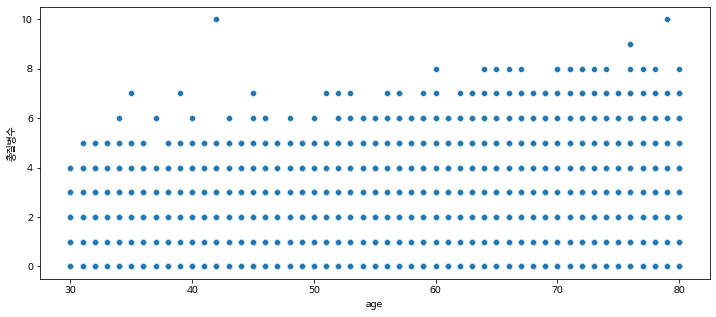

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='age', y='총질병수', data=h_a_a)

## 독거노인 나이에따른 질병

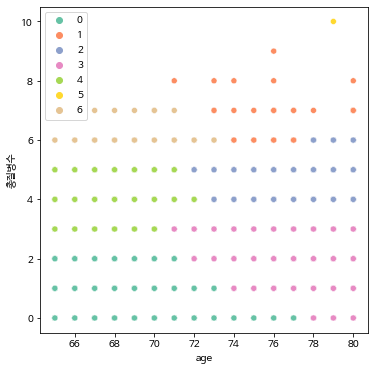

In [ ]:
# alone_old_grand

alone_grand_all_disease = alone_old_grand[['age','총질병수']]

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
alone_grand_all_disease_scaler = pd.DataFrame(standard_scaler.fit_transform(alone_grand_all_disease), columns=alone_grand_all_disease.columns) # scaled된 데이터


from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=7, linkage='average')
labels = agg_clustering.fit_predict(alone_grand_all_disease_scaler)

#  scaling하기 전의 데이터로 hierarchical clustering(method='average', n_cluster=5) 결과
# 어느 정도 군집화가 잘 되어보있다. (내부평가는 뒤의 3. evaluation에서 진행해보겠다.)

plt.figure(figsize=(20, 6))
plt.subplot(131)
sns.scatterplot(x='age', y='총질병수', data=alone_grand_all_disease, hue=labels, palette='Set2')

독거노인 vs 독거노인이 아닌노인 총질병수 분석

<BarContainer object of 1 artists>

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


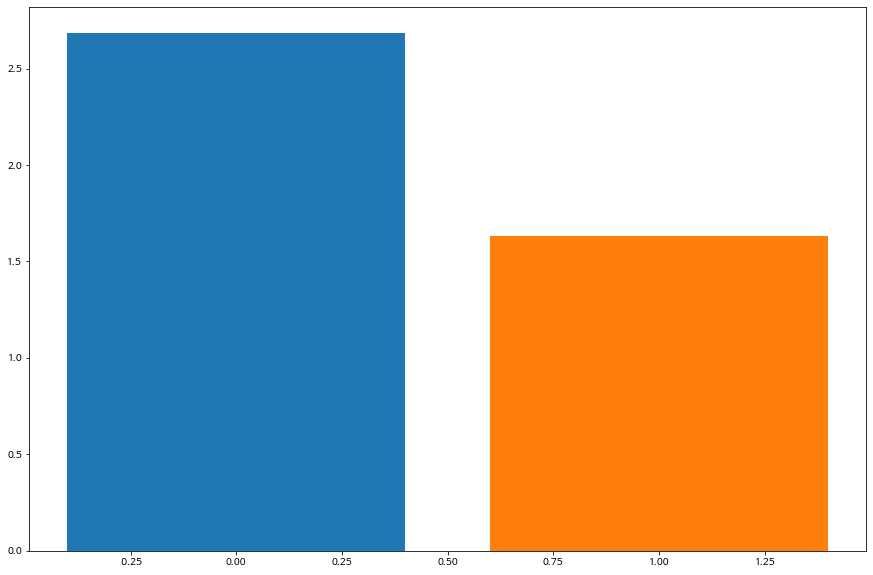

In [ ]:
y1 = alone_old_grand['총질병수'].mean()
y2 = not_alone_old_grand['총질병수'].mean()

plt.subplots(figsize=(15,10))
plt.bar(0,y1)
plt.bar(1,y2)

## 혈압과 고혈압의 관계

## 회귀분석

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
t = health[['HE_sbp','HE_dbp','고혈압']]

In [ ]:
X = health[['HE_sbp','HE_dbp']]
y = health[['고혈압']]

In [ ]:
print(X.shape)
y.shape

(35629, 2)


(35629, 1)

In [ ]:
model = LinearRegression(fit_intercept=True)
model = model.fit(X, y)

# coef_ : 추정된 가중치 벡터
# intercept_ : 추정된 상수항

print(model.intercept_)
print(model.coef_)

[-1.54756342]
[[ 0.01768192 -0.00285805]]


In [ ]:
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(X)).fit()
results.summary()

# 회귀식 y = HE_sbp*0.0177 + HE_dbp*-0.0029 -1.55

# F-statistic의 p-value 값은 Prob(F-statistic)으로 표현되는데
# , 이는 3.47e-42로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있습니다.

# B. 중간쯤에 보면 coef와 변수 x1의 p-value 값이 나와있습니다.
#  여기서 x1은 HE_sbp이고 이 변수의 p-value가 0.000으로 표기 되어 있기에 0.05보다 작으므로 target을 설명하는데 유의하다고 판단할 수 있습니다.
# C. 제일 위 부분에 R-squared와 Adj. R-squared가 표기되어 있는데,
#  값이 0.355정도로 이는 35%만큼의 설명력을 가진다고 판단할 수 있습니다. 참고로, 0에 가까울 수록 예측값을 믿을 수 없고 1에 가까울 수록 믿을 수 있다고 보면 됩니다.

 
 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    고혈압   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     9809.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:09:49   Log-Likelihood:                -16758.
No. Observations:               35629   AIC:                         3.352e+04
Df Residuals:                   35626   BIC:                         3.355e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5476      0.017    -91.252      0.000      -1.581      -1.514
HE_sbp         0.0177      0.000    120.874      0.000       0.017       0.018
HE_dbp        -0.0029      0.000    -11.492      0.000      -0.003      -0.002
==============================================================================
Omnibus:                     2442.489   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2040.762
Skew:                           0.508   Prob(JB):                         0.00
Kurtosis:                       2.414   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 회귀분석 예제 끝

# 0과 1일땐 로지스틱 회귀분석

In [ ]:
# 회귀분석 전처리

In [ ]:
for i in range(len(disease)):
  health = health.replace({disease[i] : -1}, 0)
  # health[disease[i]] == health[disease[i]].apply(find)

## 고혈압

In [ ]:
hb_mean_columns = [
    'age','비만','당뇨병','고콜레스테롤혈증','HE_sbp','HE_dbp','HE_wc','HE_BMI','총질병수','HE_HPdr'
    ,'HE_glu','HE_HbA1c','HE_BUN'
]

features = health[hb_mean_columns]
get_d = health['고혈압']

 

In [ ]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, get_d)

In [ ]:
print(train_features)
print(train_labels)

       age   비만  당뇨병  고콜레스테롤혈증  HE_sbp  HE_dbp  HE_wc     HE_BMI  총질병수  \
11771   75  1.0  0.0       1.0   120.0    54.0   84.0  26.196762     3   
14078   65  1.0  0.0       0.0   124.0    86.0   86.2  25.975203     4   
9540    70  0.0  0.0       0.0   115.0    63.0   84.2  19.036735     1   
22442   72  0.0  0.0       1.0   134.0    82.0   79.6  22.430336     2   
8009    52  0.0  0.0       0.0   100.0    71.0   76.3  21.794646     0   
...    ...  ...  ...       ...     ...     ...    ...        ...   ...   
6837    34  0.0  0.0       0.0    92.0    57.0   76.2  22.922646     0   
15229   64  1.0  1.0       0.0   123.0    86.0   96.4  26.768322     4   
19232   50  0.0  0.0       0.0   136.0    82.0   65.4  18.728738     0   
1394    80  0.0  1.0       0.0   109.0    71.0   95.0  24.063316     2   
33369   55  0.0  1.0       1.0   120.5    81.0   93.7  23.914334     3   

       HE_HPdr  HE_glu  HE_HbA1c  HE_BUN  
11771      0.0   115.0       6.3    21.0  
14078      0.0    90.0   

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

In [ ]:
print(model.score(train_features, train_labels))

0.8861195314546612


In [ ]:
print(model.coef_)
# 'age','당뇨병','HE_sbp','HE_dbp','HE_wc','HE_BMI','총질병수'

[[ 0.58275121 -0.92316154 -0.49617562 -0.64782803  1.36408219  0.53088626
   0.21184123  0.11276667  2.79367541  0.70693228  0.14822875 -0.19574894
   0.17636749]]


In [ ]:
alone_old_grand[hb_mean_columns].mean()

age          73.821184
비만            0.394281
당뇨병           0.305679
고콜레스테롤혈증      0.346355
HE_sbp      130.242851
HE_dbp       72.701571
HE_wc        85.262827
HE_BMI       24.275683
총질병수          2.683850
HE_HPdr      -0.072896
HE_glu      106.474426
HE_HbA1c      6.117479
HE_BUN       17.096657
dtype: float64

In [ ]:
me  = np.array([alone_old_grand[hb_mean_columns].mean()]) #독거노인평균

In [ ]:
me

array([[ 7.38211841e+01,  3.94281112e-01,  3.05678615e-01,
         3.46355215e-01,  1.30242851e+02,  7.27015707e+01,
         8.52628272e+01,  2.42756825e+01,  2.68385018e+00,
        -7.28956907e-02,  1.06474426e+02,  6.11747886e+00,
         1.70966573e+01]])

In [ ]:
me = scaler.transform(me)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(model.predict(me))

[1.]


In [ ]:
print(model.predict_proba(me))

#독거노인이 고혈압걸릴확률 84퍼센트

[[0.16106595 0.83893405]]


## 당뇨병

In [229]:
diabetes_mean_columns = [
    'age','고혈압','HE_wc','HE_glu','HE_HbA1c','HE_Uglu','총질병수'
]

features = alone_old_grand[diabetes_mean_columns]
get_d = alone_old_grand['당뇨병']

 

In [230]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, get_d)

In [231]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [232]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

In [233]:
print(model.score(train_features, train_labels))

0.9296455424274973


In [234]:
print(model.coef_)
#  'age','고혈압','HE_wc','HE_glu','HE_HbA1c','HE_Uglu','총질병수'

[[ 0.06377658 -0.25201589 -0.2094669   1.85493243  3.6142001   0.33768392
   1.19556703]]


In [235]:
me  = np.array([alone_old_grand[diabetes_mean_columns].mean()]) #독거노인평균

In [236]:
me

array([[ 73.82118405,   0.66089408,  85.26282723, 106.4744261 ,
          6.11747886,   0.12525171,   2.68385018]])

In [237]:
me = scaler.transform(me)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [238]:
print(model.predict(me))

[0.]


In [239]:
print(model.predict_proba(me))

[[0.75347209 0.24652791]]


In [ ]:
#독거노인이 당뇨걸릴확률 26퍼센트

##고콜레스테롤혈증

In [255]:
hyperlipidemia_mean_columns = [
    'age','HE_chol','총질병수','고혈압'
]

features = health[hyperlipidemia_mean_columns]
get_d = health['고콜레스테롤혈증']

 

In [256]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, get_d)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features, train_labels)

print(model.score(train_features, train_labels))

print(model.coef_)
#  'HE_chol','총질병수'



0.8303207215298829
[[ 0.20969135  0.72273218  1.68135734 -0.41407618]]


In [257]:
me  = np.array([alone_old_grand[hyperlipidemia_mean_columns].mean()]) #독거노인평균

In [258]:
me = scaler.transform(me)
print(model.predict(me))
print(model.predict_proba(me))

# 독거노인 고콜레스테롤 걸릴확률 : 34퍼센트

[0.]
[[0.66667749 0.33332251]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 골관절염

In [ ]:
osteoarthritis_mean_columns = [
    'age','뇌졸중','천식','아토피피부염','협심증또는심근경색증','우울증','총질병수'
]

# print(stroke_mean_columns)


features = health[osteoarthritis_mean_columns]
get_d = health['골관절염']

 



In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, get_d)

print(train_features)
print(train_labels)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features, train_labels)

print(model.score(train_features, train_labels))

print(model.coef_)
#   'HE_chol','HE_wt','HE_wc','HE_TG','HE_HB'



       age  뇌졸중   천식  아토피피부염  협심증또는심근경색증  우울증  총질병수
16407   67  0.0  0.0     0.0         0.0  1.0     3
17818   42  0.0  0.0     0.0         0.0  0.0     1
25037   54  0.0  0.0     0.0         0.0  0.0     0
29592   52  0.0  0.0     0.0         0.0  0.0     2
18265   65  0.0  0.0     0.0         0.0  0.0     4
...    ...  ...  ...     ...         ...  ...   ...
5148    60  0.0  0.0     0.0         0.0  0.0     2
26042   51  0.0  0.0     0.0         0.0  0.0     3
30344   60  0.0  0.0     0.0         0.0  0.0     3
8900    54  0.0  0.0     0.0         0.0  0.0     2
27942   41  0.0  0.0     0.0         0.0  0.0     1

[26721 rows x 7 columns]
16407    0.0
17818    0.0
25037    0.0
29592    0.0
18265    0.0
        ... 
5148     1.0
26042    0.0
30344    0.0
8900     0.0
27942    0.0
Name: 골관절염, Length: 26721, dtype: float64
0.8729837955166349
[[ 9.31387667e-01 -2.09354117e-01 -6.22634012e-02 -5.91021624e-02
  -1.97696692e-01  3.82924648e-04  1.15553797e+00]]


In [ ]:
me  = np.array([alone_old_grand[osteoarthritis_mean_columns].mean()]) #독거노인평균
print(me)

[[ 7.38211841e+01 -1.08739428e-01 -1.04309303e-01 -1.57873540e-01
  -8.41723721e-02 -6.32299638e-02  2.68385018e+00]]


In [ ]:
me = scaler.transform(me)
print(model.predict(me))
print(model.predict_proba(me))

# 독거노인 협심증또는 심근경색증 걸릴확률 : 44퍼센트

[0.]
[[0.5543375 0.4456625]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
